<a href="https://colab.research.google.com/github/Yousef-Adel/A-B-Testing-for-between-old-and-new-website-page-/blob/master/Copy_2_0_of_W_A_C_We_Are_The_Champions_Predictive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='#20B2AA'>**Predictive Model: W.A.C. - We Are the Champions**

**Group members:** Bruno Esteves 2022, Deliane 2022, Emna 20221303, Filipa Afonso 20221681, Youssef 2022

## <font color='#81D8D0'> 1. Import Libraries

In [ ]:
# Import the need libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from scipy.stats import kendalltau
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFE
from collections import OrderedDict
from sklearn import tree
from sklearn.feature_selection import SelectFromModel
from tabulate import tabulate
from termcolor import colored

## <font color='#81D8D0'> 2. Import Data

In [ ]:
# Connect Google Colab to drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Colab Notebooks/PMDM/Project/Data/'
Train = pd.read_csv(path + 'train.csv')
Test = pd.read_csv(path + 'test.csv')

Mounted at /content/drive


##<font color='#81D8D0'>3. Split the data

In [ ]:
# Split of independents variables and target/depedent variable
data = Train.drop(['Outcome'], axis=1)
target = Train['Outcome']
X_train, X_train_val, y_train, y_train_val = train_test_split(data, target, test_size = 0.2, stratify=target, random_state=5, shuffle = True)

##<font color='#81D8D0'>4. Explore Data

#### **X_train + y_train**

In [ ]:
winners_train = pd.concat([X_train,y_train],axis = 1, join = 'inner')
winners_train

RecordID               Competition  Edition  Athlete Id Sex  \
13311     83064               Local Match   2020.0    269677.0   M   
16597     75028       Regional Tournament   2021.0    268301.0   M   
17898     54952  Continental Championship   2022.0   2259662.0   M   
1663      79501              National Cup   2021.0    505235.0   M   
7503      56598       Regional Tournament   2022.0    652572.0   F   
...         ...                       ...      ...         ...  ..   
16340     13924         Federation League   2019.0    569978.0   M   
13967     62037       Regional Tournament   2022.0    641992.0   F   
4502      54829         Federation League   2019.0    494728.0   M   
16104     51238        World Championship   2022.0    656756.0   F   
11486     15276       Regional Tournament   2020.0     39655.0   F   

                Region          Education Age group      Income Disability  \
13311  Northern Africa        High school     35-55        High      False   
16597    North America  University Degree     35-55        High      False   
17898       South Asia      Middle school      0-35      Middle      False   
1663      Central Asia  University Degree      0-35        High      False   
7503   Southern Europe        High school     35-55      Middle      False   
...                ...                ...       ...         ...        ...   
16340  Northern Africa        High school      0-35         Low      False   
13967     Central Asia        High school     35-55  Middle-Low       True   
4502        South Asia      Middle school      0-35  Middle-Low       True   
16104  Northern Africa      Middle school     35-55  Middle-Low      False   
11486    North America      Middle school      0-35      Middle      False   

       ...  Cardiovascular training Outdoor Workout Squad training  \
13311  ...                     75.0           False            0.0   
16597  ...                     83.0           False            1.0   
17898  ...                     65.0           False            1.0   
1663   ...                     51.0           False            1.0   
7503   ...                    140.0           False           29.0   
...    ...                      ...             ...            ...   
16340  ...                     40.0           False           61.0   
13967  ...                     95.0           False            1.0   
4502   ...                      2.0           False            0.0   
16104  ...                    271.0           False            0.0   
11486  ...                     92.0           False            0.0   

       Physiotherapy Plyometric training  No coach  Sport-specific training  \
13311            1.0                 0.0     False                      5.0   
16597            0.0                 0.0     False                     24.0   
17898          164.0                 0.0     False                     27.0   
1663             0.0                 0.0     False                      6.0   
7503             0.0                 0.0     False                      0.0   
...              ...                 ...       ...                      ...   
16340          153.0                 0.0     False                      NaN   
13967            0.0                 0.0     False                      5.0   
4502            14.0                 0.0     False                      8.0   
16104            0.0                 0.0     False                      0.0   
11486            0.0                 0.0     False                     14.0   

       Other training  Past injuries  Outcome  
13311             7.0          False        0  
16597             0.0          False        1  
17898             0.0          False        1  
1663              0.0          False        0  
7503              0.0           True        1  
...               ...            ...      ...  
16340             0.0           True        1  
13967             0.0           True        0  
4502   

In [ ]:
# Initial number of rows and columns
winners_train.shape

(14444, 30)

In [ ]:
# Get an overview of the firts 10 rows 
winners_train.head(10)

RecordID               Competition  Edition  Athlete Id Sex  \
13311     83064               Local Match   2020.0    269677.0   M   
16597     75028       Regional Tournament   2021.0    268301.0   M   
17898     54952  Continental Championship   2022.0   2259662.0   M   
1663      79501              National Cup   2021.0    505235.0   M   
7503      56598       Regional Tournament   2022.0    652572.0   F   
3431      22733         Federation League   2022.0    576306.0   F   
15908     67695              National Cup   2021.0    490587.0   M   
17341     83616       Regional Tournament   2019.0    310933.0   F   
13467     79755         Federation League   2022.0    646344.0   F   
17612     35111               Local Match   2022.0    529693.0   M   

                Region          Education Age group       Income Disability  \
13311  Northern Africa        High school     35-55         High      False   
16597    North America  University Degree     35-55         High      False   
17898       South Asia      Middle school      0-35       Middle      False   
1663      Central Asia  University Degree      0-35         High      False   
7503   Southern Europe        High school     35-55       Middle      False   
3431    Western Europe      Middle school      0-35         High      False   
15908  Central America      Middle school      0-35   Middle-Low       True   
17341  Central America      Middle school      0-35       Middle      False   
13467   Western Europe        High school         0  Middle-High      False   
17612    North America      Middle school     35-55   Middle-Low      False   

       ...  Cardiovascular training Outdoor Workout Squad training  \
13311  ...                     75.0           False            0.0   
16597  ...                     83.0           False            1.0   
17898  ...                     65.0           False            1.0   
1663   ...                     51.0           False            1.0   
7503   ...                    140.0           False           29.0   
3431   ...                      8.0           False           69.0   
15908  ...                    177.0           False            0.0   
17341  ...                     54.0           False            5.0   
13467  ...                      4.0           False           23.0   
17612  ...                   1084.0            True           11.0   

       Physiotherapy Plyometric training  No coach  Sport-specific training  \
13311            1.0                 0.0     False                      5.0   
16597            0.0                 0.0     False                     24.0   
17898          164.0                 0.0     False                     27.0   
1663             0.0                 0.0     False                      6.0   
7503             0.0                 0.0     False                      0.0   
3431             0.0                 0.0     False                     52.0   
15908            0.0                 0.0     False                      1.0   
17341            0.0                 0.0     False                      6.0   
13467            0.0                 0.0     False                     17.0   
17612            8.0                 5.0       NaN                     44.0   

       Other training  Past injuries  Outcome  
13311             7.0          False        0  
16597             0.0          False        1  
17898             0.0          False        1  
1663              0.0          False        0  
7503              0.0           True        1  
3431              0.0           True        1  
15908             0.0          False        0  
17341             0.0           True        1  
13467             0.0           True        1  
17612            18.0           True        1  

[10 rows x 30 columns]

In [ ]:
# Check variables data types
winners_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14444 entries, 13311 to 11486
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RecordID                 14444 non-null  int64  
 1   Competition              14375 non-null  object 
 2   Edition                  14367 non-null  float64
 3   Athlete Id               14369 non-null  float64
 4   Sex                      14364 non-null  object 
 5   Region                   14360 non-null  object 
 6   Education                14369 non-null  object 
 7   Age group                14367 non-null  object 
 8   Income                   14377 non-null  object 
 9   Disability               14372 non-null  object 
 10  Previous attempts        14378 non-null  float64
 11  Late enrollment          14380 non-null  object 
 12  Cancelled enrollment     14373 non-null  object 
 13  Athlete score            14377 non-null  float64
 14  Mental preparation

**Findings:**


*   16 numerical variables and 13 categorical variables



In [ ]:
# Get descriptive statistics for numerical variables
winners_train.describe().T

count           mean            std      min  \
RecordID                 14444.0   55015.226807   25929.924116  10004.0   
Edition                  14367.0    2020.649335       1.209945   2019.0   
Athlete Id               14369.0  704399.054631  552718.556674   8462.0   
Previous attempts        14378.0       0.155794       0.464727      0.0   
Athlete score            14377.0      16.780970      36.356880    -30.0   
Train bf competition     14374.0     266.195283     320.323370      0.0   
Strength training        14380.0     480.818498     709.147396      0.0   
Sand training            14380.0       3.219263      30.311299      0.0   
Recovery                 14370.0     305.248921     616.073965      0.0   
Supplements              14369.0     134.932981     174.920987      0.0   
Cardiovascular training  14363.0     272.628559     493.306551      0.0   
Squad training           14373.0       4.263132      11.435126      0.0   
Physiotherapy            14371.0      34.159697      92.104614    -50.0   
Plyometric training      14388.0       2.599319       7.654350      0.0   
Sport-specific training  14364.0      21.520816      34.169329      0.0   
Other training           14367.0       4.250644      13.833159      0.0   
Outcome                  14444.0       0.596303       0.490655      0.0   

                              25%       50%        75%        max  
RecordID                  32526.5   54767.5   77394.25    99989.0  
Edition                    2019.0    2021.0    2022.00     2022.0  
Athlete Id               501617.0  587772.0  641696.00  2698588.0  
Previous attempts             0.0       0.0       0.00        6.0  
Athlete score                 0.0       0.0      30.00      140.0  
Train bf competition         80.0     172.0     337.00     4664.0  
Strength training            61.0     201.0     584.25     9438.0  
Sand training                 0.0       0.0       0.00     1316.0  
Recovery                     32.0     121.0     330.00    10483.0  
Supplements                  25.0      67.0     183.00     4345.0  
Cardiovascular training      14.0      89.0     307.00    13032.0  
Squad training                0.0       0.0       3.00      227.0  
Physiotherapy                 0.0       0.0      24.00     2117.0  
Plyometric training           0.0       0.0       0.00       65.0  
Sport-specific training       3.0      10.0      28.00      820.0  
Other training                0.0       0.0       0.00      264.0  
Outcome                       0.0       1.0       1.00        1.0

**Findings:** 


*   The dataset has 2 ID's variables (Record ID and Athlete ID)
*   Athlete score: has negative values
*   Physiotherapy: has negative values




In [ ]:
# Get descriptive statistics for categorical variables
winners_train.describe(include = ['O']).T

count unique            top   freq
Competition           14375      7    Local Match   3569
Sex                   14364      2              M   7923
Region                14360     13  North America   1613
Education             14369      5    High school   6463
Age group             14367      4           0-35  10000
Income                14377      5           High   4322
Disability            14372      2          False  13033
Late enrollment       14380      2          False  14271
Cancelled enrollment  14373      2          False  11744
Mental preparation    14378      3          FALSE  13184
Outdoor Workout       14379      2          False  13410
No coach              14373      2          False  14371
Past injuries         14355      2           True   7920

**Findings:**


*   Mental preparation: has 3 values in Unique



#### **X_train_val + y_train_val**

In [ ]:
winners_train_val = pd.concat([X_train_val,y_train_val],axis = 1, join = 'inner')
winners_train_val

RecordID          Competition  Edition  Athlete Id Sex  \
3369      10190          Local Match   2020.0    390400.0   M   
16295     37899          Local Match   2020.0    548938.0   M   
3403      71845    Federation League   2022.0    653550.0   M   
6285      28769    Federation League   2021.0    607130.0   M   
15581     97515          Local Match   2021.0    344409.0   M   
...         ...                  ...      ...         ...  ..   
13520     74789  Regional Tournament   2020.0    242149.0   F   
3767      60328        Olympic Games   2022.0    593987.0   F   
14771     15958  Regional Tournament   2019.0    272617.0   F   
7102      92476         National Cup   2021.0    614345.0   F   
7000      68905          Local Match   2019.0    596125.0   M   

                Region          Education Age group       Income Disability  \
3369     North America      Middle school      0-35         High      False   
16295   Eastern Europe        High school     35-55   Middle-Low      False   
3403         East Asia  University Degree      55<=  Middle-High      False   
6285      Central Asia      Middle school      0-35         High      False   
15581   Western Europe        High school     35-55         High      False   
...                ...                ...       ...          ...        ...   
13520  Northern Africa      Middle school      0-35          Low      False   
3767    Western Europe                NaN     35-55  Middle-High      False   
14771     Central Asia      Middle school      0-35   Middle-Low       True   
7102   Northern Africa      Middle school      0-35          Low      False   
7000       Middle East      Middle school      0-35       Middle      False   

       ...  Cardiovascular training Outdoor Workout Squad training  \
3369   ...                    988.0           False            0.0   
16295  ...                     22.0           False            0.0   
3403   ...                     11.0           False           57.0   
6285   ...                     27.0           False           20.0   
15581  ...                    340.0           False           12.0   
...    ...                      ...             ...            ...   
13520  ...                     35.0           False            0.0   
3767   ...                      0.0           False            0.0   
14771  ...                     14.0           False            0.0   
7102   ...                    188.0           False            0.0   
7000   ...                    177.0           False            0.0   

       Physiotherapy Plyometric training  No coach  Sport-specific training  \
3369            23.0                16.0     False                     38.0   
16295            1.0                 0.0     False                      4.0   
3403             0.0                 0.0     False                     66.0   
6285            69.0                 0.0     False                    131.0   
15581            7.0                 0.0     False                     15.0   
...              ...                 ...       ...                      ...   
13520            0.0                 0.0     False                      5.0   
3767             0.0                 0.0     False                      3.0   
14771            0.0                 0.0     False                      0.0   
7102             0.0                 0.0     False                      1.0   
7000             8.0                 7.0     False                      3.0   

       Other training  Past injuries  Outcome  
3369             14.0           True        0  
16295            21.0           True        0  
3403              0.0           True        1  
6285              0.0           True        1  
15581             0.0           True        1  
...               ...            ...      ...  
13520             0.0          False        0  
3767              9.0           True        0  
14771             0.0           True        0  
7102   

In [ ]:
# Initial number of rows and columns
winners_train_val.shape

(3611, 30)

In [ ]:
# Get an overview of the firts 10 rows 
winners_train_val.head(10)

RecordID          Competition  Edition  Athlete Id Sex          Region  \
3369      10190          Local Match   2020.0    390400.0   M   North America   
16295     37899          Local Match   2020.0    548938.0   M  Eastern Europe   
3403      71845    Federation League   2022.0    653550.0   M       East Asia   
6285      28769    Federation League   2021.0    607130.0   M    Central Asia   
15581     97515          Local Match   2021.0    344409.0   M  Western Europe   
16110     30932  Regional Tournament   2019.0    335136.0   F   North America   
11806     44617          Local Match   2019.0    572071.0   M    Central Asia   
14730     11407         National Cup   2022.0   1828753.0   M    Central Asia   
15388     26697         National Cup   2021.0    242858.0   M    Central Asia   
5552      15573          Local Match   2020.0    357219.0   F   South America   

               Education Age group       Income Disability  ...  \
3369       Middle school      0-35         High      False  ...   
16295        High school     35-55   Middle-Low      False  ...   
3403   University Degree      55<=  Middle-High      False  ...   
6285       Middle school      0-35         High      False  ...   
15581        High school     35-55         High      False  ...   
16110  University Degree     35-55   Middle-Low      False  ...   
11806      Middle school      0-35  Middle-High      False  ...   
14730        High school     35-55   Middle-Low        NaN  ...   
15388        High school      0-35   Middle-Low      False  ...   
5552         High school      0-35       Middle      False  ...   

       Cardiovascular training Outdoor Workout Squad training  Physiotherapy  \
3369                     988.0           False            0.0           23.0   
16295                     22.0           False            0.0            1.0   
3403                      11.0           False           57.0            0.0   
6285                      27.0           False           20.0           69.0   
15581                    340.0           False           12.0            7.0   
16110                     42.0           False            4.0            0.0   
11806                     83.0           False            4.0            0.0   
14730                    199.0           False            0.0            0.0   
15388                   1225.0           False            1.0            0.0   
5552                    1148.0           False            0.0           70.0   

      Plyometric training  No coach  Sport-specific training  Other training  \
3369                 16.0     False                     38.0            14.0   
16295                 0.0     False                      4.0            21.0   
3403                  0.0     False                     66.0             0.0   
6285                  0.0     False                    131.0             0.0   
15581                 0.0     False                     15.0             0.0   
16110                 0.0     False                     44.0             0.0   
11806                 0.0     False                      0.0             0.0   
14730                 0.0     False                      2.0             0.0   
15388                 0.0     False                      8.0             0.0   
5552                 26.0     False                     51.0            80.0   

       Past injuries  Outcome  
3369            True        0  
16295           True        0  
3403            True        1  
6285            True        1  
15581           True        1  
16110           True        0  
11806           True        0  
14730          False        1  
15388          False        1  
5552            True        1  

[10 rows x 30 columns]

In [ ]:
# Check variables data types
winners_train_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3611 entries, 3369 to 7000
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RecordID                 3611 non-null   int64  
 1   Competition              3593 non-null   object 
 2   Edition                  3592 non-null   float64
 3   Athlete Id               3596 non-null   float64
 4   Sex                      3598 non-null   object 
 5   Region                   3593 non-null   object 
 6   Education                3591 non-null   object 
 7   Age group                3585 non-null   object 
 8   Income                   3588 non-null   object 
 9   Disability               3594 non-null   object 
 10  Previous attempts        3590 non-null   float64
 11  Late enrollment          3589 non-null   object 
 12  Cancelled enrollment     3594 non-null   object 
 13  Athlete score            3591 non-null   float64
 14  Mental preparation   

**Findings:**


*   16 numerical variables and 13 categorical variables



In [ ]:
# Get descriptive statistics for numerical variables
winners_train_val.describe().T

count           mean            std      min  \
RecordID                 3611.0   54989.527001   26371.691251  10001.0   
Edition                  3592.0    2020.659243       1.207619   2019.0   
Athlete Id               3596.0  701132.443270  540316.931863   8462.0   
Previous attempts        3590.0       0.150975       0.470403      0.0   
Athlete score            3591.0      15.594542      35.632196    -30.0   
Train bf competition     3585.0     265.431241     336.683337      0.0   
Strength training        3597.0     459.623019     658.119709      0.0   
Sand training            3596.0       4.148220      53.326804      0.0   
Recovery                 3590.0     306.732591     645.757537      0.0   
Supplements              3596.0     129.614850     171.632421      0.0   
Cardiovascular training  3598.0     275.421345     492.190475      0.0   
Squad training           3593.0       3.995269      12.763622      0.0   
Physiotherapy            3594.0      35.685587      98.590457    -20.0   
Plyometric training      3601.0       2.198001       6.891215      0.0   
Sport-specific training  3595.0      21.938526      41.034268      0.0   
Other training           3587.0       3.802621      12.560798      0.0   
Outcome                  3611.0       0.596234       0.490720      0.0   

                              25%       50%        75%        max  
RecordID                  31610.5   55212.0   77857.00    99990.0  
Edition                    2019.0    2021.0    2022.00     2022.0  
Athlete Id               509154.0  590117.0  644361.25  2698577.0  
Previous attempts             0.0       0.0       0.00        6.0  
Athlete score                 0.0       0.0      30.00      140.0  
Train bf competition         80.0     170.0     330.00     5012.0  
Strength training            64.0     205.0     583.00     9277.0  
Sand training                 0.0       0.0       0.00     2480.0  
Recovery                     30.0     116.0     316.00     9666.0  
Supplements                  24.0      63.0     174.00     2688.0  
Cardiovascular training      15.0      91.0     284.75     6569.0  
Squad training                0.0       0.0       3.00      316.0  
Physiotherapy                 0.0       0.0      22.00     1191.0  
Plyometric training           0.0       0.0       0.00       53.0  
Sport-specific training       2.5      10.0      28.00      966.0  
Other training                0.0       0.0       0.00      179.0  
Outcome                       0.0       1.0       1.00        1.0

**Findings:**


*   The dataset has 2 ID's variables (Record ID and Athlete ID)
*   Athlete score: has negative values
*   Physiotherapy: has negative values





In [ ]:
# Get descriptive statistics for categorical variables
winners_train_val.describe(include = ['O']).T

count unique                  top  freq
Competition           3593      7  Regional Tournament   850
Sex                   3598      2                    M  1955
Region                3593     13       Western Europe   406
Education             3591      5          High school  1596
Age group             3585      4                 0-35  2470
Income                3588      5                 High  1073
Disability            3594      2                False  3265
Late enrollment       3589      2                False  3559
Cancelled enrollment  3594      2                False  2942
Mental preparation    3600      3                FALSE  3335
Outdoor Workout       3592      2                False  3367
No coach              3598      1                False  3598
Past injuries         3595      2                 True  1952

**FIndings:**


*   Mental preparation: has 3 values in Unique



***4.1. Visualizations***

#### **X_train**

array([[<Axes: title={'center': 'RecordID'}>,
        <Axes: title={'center': 'Edition'}>,
        <Axes: title={'center': 'Athlete Id'}>,
        <Axes: title={'center': 'Previous attempts'}>],
       [<Axes: title={'center': 'Athlete score'}>,
        <Axes: title={'center': 'Train bf competition'}>,
        <Axes: title={'center': 'Strength training'}>,
        <Axes: title={'center': 'Sand training'}>],
       [<Axes: title={'center': 'Recovery'}>,
        <Axes: title={'center': 'Supplements'}>,
        <Axes: title={'center': 'Cardiovascular training'}>,
        <Axes: title={'center': 'Squad training'}>],
       [<Axes: title={'center': 'Physiotherapy'}>,
        <Axes: title={'center': 'Plyometric training'}>,
        <Axes: title={'center': 'Sport-specific training'}>,
        <Axes: title={'center': 'Other training'}>]], dtype=object)

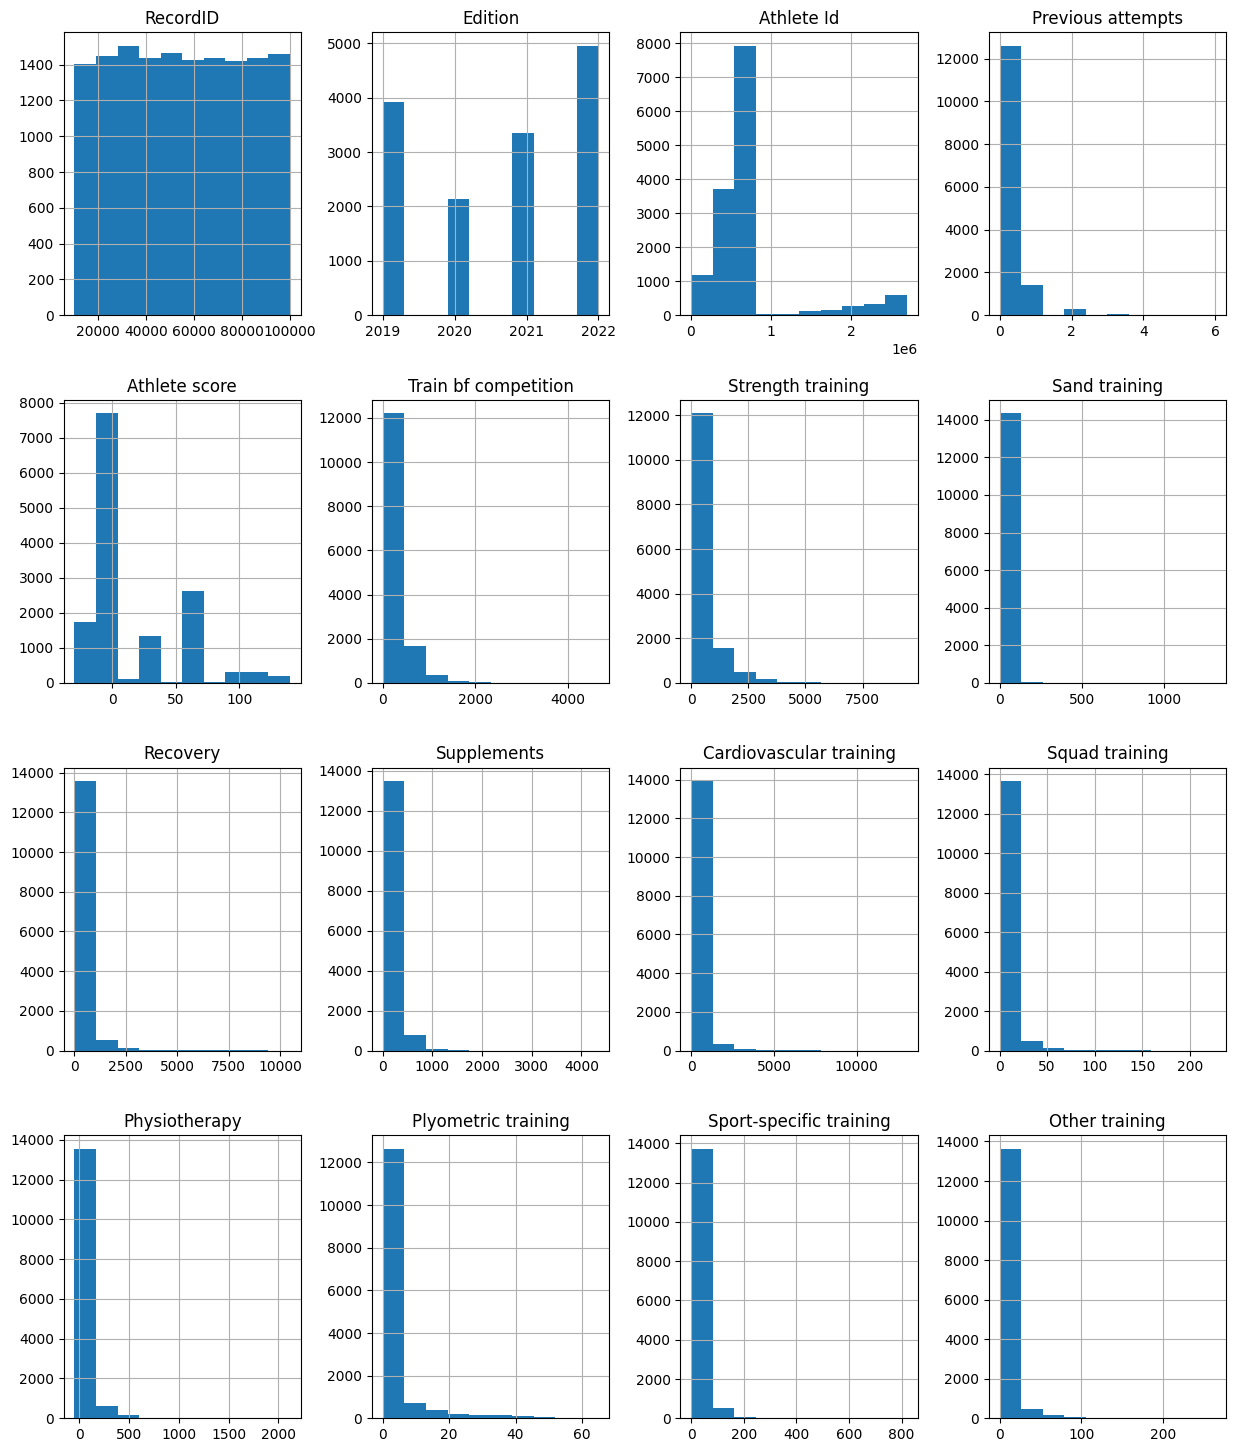

In [ ]:
X_train.hist(figsize=(15, 18))

#### **X_train_val**

array([[<Axes: title={'center': 'RecordID'}>,
        <Axes: title={'center': 'Edition'}>,
        <Axes: title={'center': 'Athlete Id'}>,
        <Axes: title={'center': 'Previous attempts'}>],
       [<Axes: title={'center': 'Athlete score'}>,
        <Axes: title={'center': 'Train bf competition'}>,
        <Axes: title={'center': 'Strength training'}>,
        <Axes: title={'center': 'Sand training'}>],
       [<Axes: title={'center': 'Recovery'}>,
        <Axes: title={'center': 'Supplements'}>,
        <Axes: title={'center': 'Cardiovascular training'}>,
        <Axes: title={'center': 'Squad training'}>],
       [<Axes: title={'center': 'Physiotherapy'}>,
        <Axes: title={'center': 'Plyometric training'}>,
        <Axes: title={'center': 'Sport-specific training'}>,
        <Axes: title={'center': 'Other training'}>]], dtype=object)

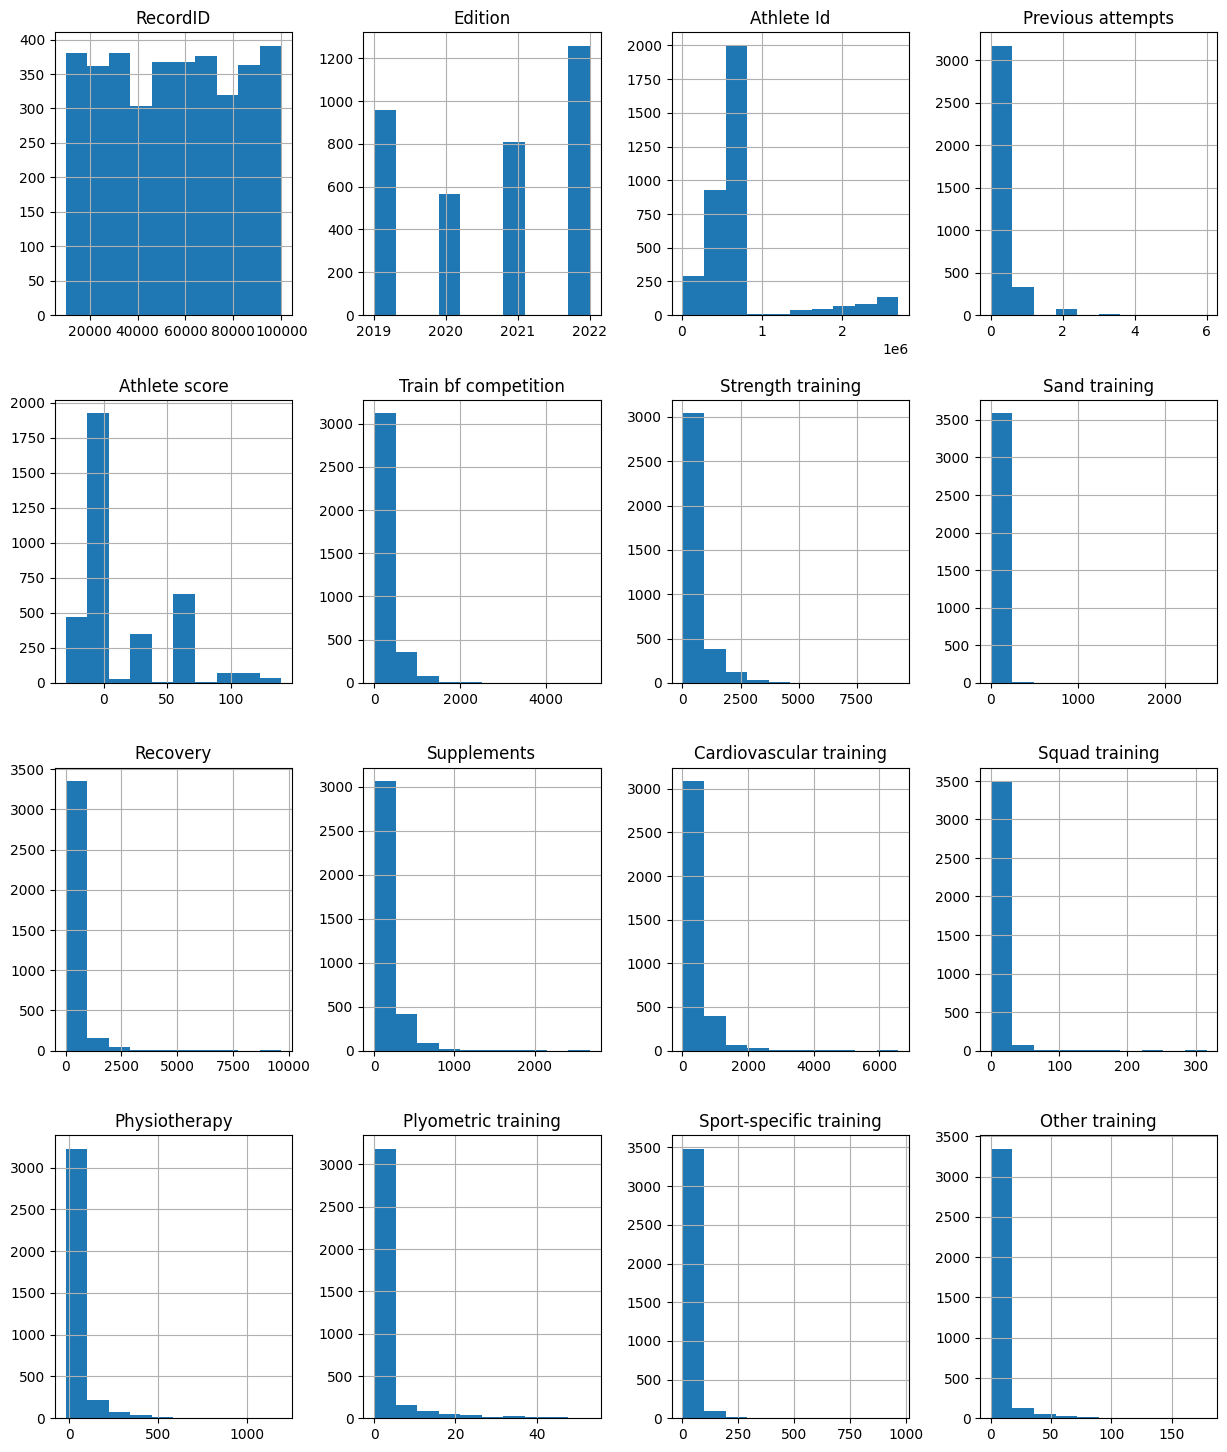

In [ ]:
X_train_val.hist(figsize=(15, 18))

## <font color='#81D8D0'>5. Data Pre-Processing

###**5.1. Data Preparation**

#### **5.1.1 Duplicated Data**

##### **X_train data**

In [ ]:
# Check duplicated data
X_train.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 13311    False
16597    False
17898    False
1663     False
7503     False
         ...  
16340    False
13967    False
4502     False
16104    False
11486    False
Length: 14444, dtype: bool>

In [ ]:
sorted_duplicates = X_train.sort_values('RecordID')
duplicates = sorted_duplicates[sorted_duplicates.duplicated(subset=['RecordID'], keep=False)]
table = duplicates.head(4)

color_peach = '\033[38;5;208m'
color_reset = '\033[0m' 

table_format = 'plain'

table['RecordID'] = color_peach + table['RecordID'].astype(str) + color_reset

print(tabulate(table, headers='keys', tablefmt=table_format))

RecordID    Competition    Edition    Athlete Id    Sex    Region    Education    Age group    Income    Disability    Previous attempts    Late enrollment    Cancelled enrollment    Athlete score    Mental preparation    Train bf competition    Strength training    Sand training    Recovery    Supplements    Cardiovascular training    Outdoor Workout    Squad training    Physiotherapy    Plyometric training    No coach    Sport-specific training    Other training    Past injuries


In [ ]:
sorted_duplicates = X_train.sort_values('Athlete Id')
duplicates = sorted_duplicates[sorted_duplicates.duplicated(subset=['Athlete Id'], keep=False)]
table = duplicates.head(4)

color_peach = '\033[38;5;208m'
color_reset = '\033[0m'  

table_format = 'plain'

table['Athlete Id'] = color_peach + table['Athlete Id'].astype(str) + color_reset

print(tabulate(table, headers='keys', tablefmt=table_format))

         RecordID  Competition          Edition    Athlete Id  Sex    Region        Education      Age group    Income      Disability      Previous attempts  Late enrollment    Cancelled enrollment      Athlete score  Mental preparation      Train bf competition    Strength training    Sand training    Recovery    Supplements    Cardiovascular training  Outdoor Workout      Squad training    Physiotherapy    Plyometric training  No coach      Sport-specific training    Other training  Past injuries
14715       45936  Federation League       2022         33681  M      Oceania       High school    35-55        Middle      True                            3  False              False                                 0  FALSE                                      6                    8                0           0             16                          0  False                             0                0                      0  False                               0                 0  True

<ipython-input-11443-2a97d15375fb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Athlete Id'] = color_peach + table['Athlete Id'].astype(str) + color_reset


**Findings:** We've duplicated ID's in Athlete ID - which means that the same athlete participated in more than one competition. 




##### **X_train_val**

In [ ]:
# Check duplicated data
X_train_val.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 3369     False
16295    False
3403     False
6285     False
15581    False
         ...  
13520    False
3767     False
14771    False
7102     False
7000     False
Length: 3611, dtype: bool>

In [ ]:
sorted_duplicates = X_train_val.sort_values('RecordID')
duplicates = sorted_duplicates[sorted_duplicates.duplicated(subset=['RecordID'], keep=False)]
table = duplicates.head(4)

color_peach = '\033[38;5;208m'
color_reset = '\033[0m'  

table_format = 'plain'

table['RecordID'] = color_peach + table['RecordID'].astype(str) + color_reset

print(tabulate(table, headers='keys', tablefmt=table_format))

RecordID    Competition    Edition    Athlete Id    Sex    Region    Education    Age group    Income    Disability    Previous attempts    Late enrollment    Cancelled enrollment    Athlete score    Mental preparation    Train bf competition    Strength training    Sand training    Recovery    Supplements    Cardiovascular training    Outdoor Workout    Squad training    Physiotherapy    Plyometric training    No coach    Sport-specific training    Other training    Past injuries


In [ ]:
sorted_duplicates = X_train_val.sort_values('Athlete Id')
duplicates = sorted_duplicates[sorted_duplicates.duplicated(subset=['Athlete Id'], keep=False)]
table = duplicates.head(4)

color_peach = '\033[38;5;208m'
color_reset = '\033[0m'  

table_format = 'plain'

table['Athlete Id'] = color_peach + table['Athlete Id'].astype(str) + color_reset

print(tabulate(table, headers='keys', tablefmt=table_format))

         RecordID  Competition                 Edition    Athlete Id  Sex    Region           Education          Age group    Income      Disability      Previous attempts  Late enrollment    Cancelled enrollment      Athlete score  Mental preparation      Train bf competition    Strength training    Sand training    Recovery    Supplements    Cardiovascular training  Outdoor Workout      Squad training    Physiotherapy    Plyometric training  No coach      Sport-specific training    Other training  Past injuries
17498       44174  Local Match                    2019        134847  M      North America    University Degree  0-35         Middle-Low  False                           0  False              True                                 60  FALSE                                     52                  190                0          47             72                          0  False                             0               14                      0  False                            

<ipython-input-11446-6f1971393c9b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Athlete Id'] = color_peach + table['Athlete Id'].astype(str) + color_reset


**Findings:** We've duplicated ID's in Athlete ID - which means that the same athlete participated in more than one competition. 




#### **5.1.2 Set to index**

##### **X_train**

In [ ]:
# Redefine the index of the dataset
X_train.set_index('RecordID',drop=True ,inplace=True)
X_train.head(1)

Competition  Edition  Athlete Id Sex           Region    Education  \
RecordID                                                                       
83064     Local Match   2020.0    269677.0   M  Northern Africa  High school   

         Age group Income Disability  Previous attempts  ... Supplements  \
RecordID                                                 ...               
83064        35-55   High      False                1.0  ...        47.0   

         Cardiovascular training  Outdoor Workout Squad training  \
RecordID                                                           
83064                       75.0            False            0.0   

          Physiotherapy  Plyometric training  No coach  \
RecordID                                                 
83064               1.0                  0.0     False   

          Sport-specific training  Other training  Past injuries  
RecordID                                                          
83064                         5.0             7.0          False  

[1 rows x 28 columns]

In [ ]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

##### **X_train_val**

**Note:** Since we have two IDs we decided to drop one of them (Athlete ID), and work with Record ID. 




In [ ]:
# Redefine the index of the dataset
X_train_val.set_index('RecordID',drop=True ,inplace=True)
X_train_val.head(1)

Competition  Edition  Athlete Id Sex         Region      Education  \
RecordID                                                                       
10190     Local Match   2020.0    390400.0   M  North America  Middle school   

         Age group Income Disability  Previous attempts  ... Supplements  \
RecordID                                                 ...               
10190         0-35   High      False                2.0  ...       391.0   

         Cardiovascular training  Outdoor Workout Squad training  \
RecordID                                                           
10190                      988.0            False            0.0   

          Physiotherapy  Plyometric training  No coach  \
RecordID                                                 
10190              23.0                 16.0     False   

          Sport-specific training  Other training  Past injuries  
RecordID                                                          
10190                        38.0            14.0           True  

[1 rows x 28 columns]

In [ ]:
X_train_val = X_train_val.reset_index(drop=True)
y_train_val = y_train_val.reset_index(drop=True)

### **5.2 Incoherences**

#### **X_train**

In [ ]:
X_train['Competition'].value_counts()

Local Match                 3569
Regional Tournament         3375
Federation League           2756
National Cup                1878
Continental Championship    1249
World Championship          1156
Olympic Games                392
Name: Competition, dtype: int64

In [ ]:
X_train['Competition'].replace(to_replace='Local Match',value='Local',inplace=True)
X_train['Competition'].replace(to_replace='Regional Tournament',value='Regional',inplace=True)
X_train['Competition'].replace(to_replace='Federation League',value='National',inplace=True)
X_train['Competition'].replace(to_replace='National Cup',value='National',inplace=True)
X_train['Competition'].replace(to_replace='Continental Championship',value='International',inplace=True)
X_train['Competition'].replace(to_replace='World Championship',value='International',inplace=True)
X_train['Competition'].replace(to_replace='Olympic Games',value='International',inplace=True)
X_train['Competition'].value_counts()

National         4634
Local            3569
Regional         3375
International    2797
Name: Competition, dtype: int64

In [ ]:
X_train['Edition'].value_counts()

2022.0    4955
2019.0    3925
2021.0    3344
2020.0    2143
Name: Edition, dtype: int64

In [ ]:
X_train['Sex'].value_counts()

M    7923
F    6441
Name: Sex, dtype: int64

In [ ]:
X_train['Region'].value_counts()

North America      1613
Western Europe     1449
East Asia          1432
South America      1367
Northern Africa    1207
Eastern Europe     1142
Middle East        1089
Central Asia       1009
Central America     954
Oceania             905
Southern Europe     824
South Asia          803
Southern Africa     566
Name: Region, dtype: int64

In [ ]:
X_train['Region'].replace(to_replace='North America',value='America',inplace=True)
X_train['Region'].replace(to_replace='Western Europe',value='Europe',inplace=True)
X_train['Region'].replace(to_replace='East Asia',value='Asia',inplace=True)
X_train['Region'].replace(to_replace='South America',value='America',inplace=True)
X_train['Region'].replace(to_replace='Northern Africa',value='Africa',inplace=True)
X_train['Region'].replace(to_replace='Eastern Europe',value='Europe',inplace=True)
X_train['Region'].replace(to_replace='Middle East',value='Asia',inplace=True)
X_train['Region'].replace(to_replace='Central Asia',value='Asia',inplace=True)
X_train['Region'].replace(to_replace='Central America',value='America',inplace=True)
X_train['Region'].replace(to_replace='Oceania',value='Oceania',inplace=True)
X_train['Region'].replace(to_replace='Southern Europe',value='Europe',inplace=True)
X_train['Region'].replace(to_replace='South Asia',value='Asia',inplace=True)
X_train['Region'].replace(to_replace='Southern Africa',value='Africa',inplace=True)
X_train['Region'].value_counts()

Asia       4333
America    3934
Europe     3415
Africa     1773
Oceania     905
Name: Region, dtype: int64

In [ ]:
X_train['Education'].value_counts()

High school          6463
Middle school        5383
University Degree    2269
Post Graduate         138
Elementary school     116
Name: Education, dtype: int64

In [ ]:
X_train['Age group'].value_counts()

0-35     10000
35-55     4244
55<=       105
0           18
Name: Age group, dtype: int64

In [ ]:
X_train['Age group'].replace(to_replace='0',value='0-35',inplace=True)
X_train['Age group'].value_counts()

0-35     10018
35-55     4244
55<=       105
Name: Age group, dtype: int64

In [ ]:
X_train['Income'].value_counts()

High           4322
Middle-Low     3080
Low            2837
Middle         2827
Middle-High    1311
Name: Income, dtype: int64

In [ ]:
X_train['Disability'].value_counts()

False    13033
True      1339
Name: Disability, dtype: int64

In [ ]:
X_train['Previous attempts'].value_counts()

0.0    12603
1.0     1415
2.0      282
3.0       60
4.0       10
5.0        7
6.0        1
Name: Previous attempts, dtype: int64

In [ ]:
X_train['Late enrollment'].value_counts()

False    14271
True       109
Name: Late enrollment, dtype: int64

In [ ]:
X_train['Cancelled enrollment'].value_counts()

False    11744
True      2629
Name: Cancelled enrollment, dtype: int64

In [ ]:
X_train['Athlete score'].value_counts()

 0.0      7686
 60.0     2608
-30.0     1725
 30.0     1342
 90.0      305
 120.0     297
 140.0     189
 10.0       50
 15.0       43
 70.0       17
 20.0       16
-15.0       16
 40.0       15
 75.0       13
-20.0        8
 50.0        7
 105.0       6
 45.0        6
 100.0       5
-10.0        4
 80.0        4
 85.0        3
 25.0        3
 55.0        3
 110.0       3
 35.0        1
-5.0         1
 5.0         1
Name: Athlete score, dtype: int64

In [ ]:
X_train['Athlete score'] = X_train['Athlete score'].abs()
X_train['Athlete score'].value_counts()

0.0      7686
30.0     3067
60.0     2608
90.0      305
120.0     297
140.0     189
15.0       59
10.0       54
20.0       24
70.0       17
40.0       15
75.0       13
50.0        7
45.0        6
105.0       6
100.0       5
80.0        4
55.0        3
110.0       3
85.0        3
25.0        3
5.0         2
35.0        1
Name: Athlete score, dtype: int64

In [ ]:
X_train['Mental preparation'].value_counts()

FALSE    13184
TRUE      1120
FASE        74
Name: Mental preparation, dtype: int64

In [ ]:
X_train['Mental preparation'].replace(to_replace='FASE',value='FALSE',inplace=True)
X_train['Mental preparation'].value_counts()

FALSE    13258
TRUE      1120
Name: Mental preparation, dtype: int64

In [ ]:
X_train['Train bf competition'].value_counts()

59.0      63
47.0      60
78.0      60
53.0      59
30.0      58
          ..
1530.0     1
1287.0     1
1679.0     1
1061.0     1
1643.0     1
Name: Train bf competition, Length: 1289, dtype: int64

In [ ]:
X_train['Cardiovascular training'].value_counts()

0.0        1249
1.0         452
2.0         308
3.0         257
4.0         241
           ... 
2253.0        1
1091.0        1
13032.0       1
852.0         1
1153.0        1
Name: Cardiovascular training, Length: 1588, dtype: int64

In [ ]:
X_train['Strength training'].value_counts()

0.0       111
13.0       83
1.0        80
5.0        78
8.0        75
         ... 
2333.0      1
877.0       1
4711.0      1
2259.0      1
2085.0      1
Name: Strength training, Length: 2285, dtype: int64

In [ ]:
X_train['Sand training'].value_counts()

0.0      11101
1.0        911
2.0        511
3.0        278
4.0        235
         ...  
874.0        1
78.0         1
93.0         1
182.0        1
112.0        1
Name: Sand training, Length: 142, dtype: int64

In [ ]:
X_train['Outdoor Workout'].value_counts()

False    13410
True       969
Name: Outdoor Workout, dtype: int64

In [ ]:
X_train['Squad training'].value_counts()

0.0      8531
1.0      1170
2.0       748
3.0       510
4.0       406
         ... 
89.0        1
62.0        1
94.0        1
95.0        1
138.0       1
Name: Squad training, Length: 120, dtype: int64

In [ ]:
X_train['Plyometric training'].value_counts()

0.0     11827
3.0       333
9.0       200
6.0       147
10.0      127
        ...  
56.0        1
55.0        1
60.0        1
58.0        1
59.0        1
Name: Plyometric training, Length: 63, dtype: int64

In [ ]:
X_train['Sport-specific training'].value_counts()

0.0      1972
1.0       839
2.0       756
3.0       685
4.0       566
         ... 
225.0       1
217.0       1
280.0       1
274.0       1
592.0       1
Name: Sport-specific training, Length: 243, dtype: int64

In [ ]:
X_train['Other training'].value_counts()

0.0      10828
1.0        505
2.0        327
3.0        255
4.0        219
         ...  
114.0        1
182.0        1
225.0        1
131.0        1
240.0        1
Name: Other training, Length: 133, dtype: int64

In [ ]:
X_train['Recovery'].value_counts()

0.0       898
3.0       147
2.0       145
1.0       141
4.0       133
         ... 
2988.0      1
1443.0      1
913.0       1
2180.0      1
3627.0      1
Name: Recovery, Length: 1640, dtype: int64

In [ ]:
X_train['Supplements'].value_counts()

8.0       170
11.0      169
12.0      161
19.0      155
15.0      154
         ... 
990.0       1
640.0       1
745.0       1
951.0       1
1149.0      1
Name: Supplements, Length: 848, dtype: int64

In [ ]:
X_train['Physiotherapy'].value_counts()

0.0      8558
1.0       257
2.0       187
3.0       160
4.0       123
         ... 
302.0       1
482.0       1
427.0       1
313.0       1
285.0       1
Name: Physiotherapy, Length: 523, dtype: int64

In [ ]:
X_train['Physiotherapy'] = X_train['Physiotherapy'].abs()
X_train['Physiotherapy'].value_counts()

0.0      8558
1.0       258
2.0       187
3.0       160
4.0       123
         ... 
376.0       1
302.0       1
638.0       1
427.0       1
285.0       1
Name: Physiotherapy, Length: 519, dtype: int64

In [ ]:
X_train['No coach'].value_counts()

False    14371
True         2
Name: No coach, dtype: int64

In [ ]:
X_train.drop(labels = ['No coach'], axis = 'columns', inplace = True)

In [ ]:
X_train['Past injuries'].value_counts()

True     7920
False    6435
Name: Past injuries, dtype: int64

#### **X_train_val**

In [ ]:
X_train_val['Competition'].value_counts()

Regional Tournament         850
Local Match                 835
Federation League           661
National Cup                495
Continental Championship    348
World Championship          298
Olympic Games               106
Name: Competition, dtype: int64

In [ ]:
X_train_val['Competition'].replace(to_replace='Local Match',value='Local',inplace=True)
X_train_val['Competition'].replace(to_replace='Regional Tournament',value='Regional',inplace=True)
X_train_val['Competition'].replace(to_replace='Federation League',value='National',inplace=True)
X_train_val['Competition'].replace(to_replace='National Cup',value='National',inplace=True)
X_train_val['Competition'].replace(to_replace='Continental Championship',value='International',inplace=True)
X_train_val['Competition'].replace(to_replace='World Championship',value='International',inplace=True)
X_train_val['Competition'].replace(to_replace='Olympic Games',value='International',inplace=True)
X_train_val['Competition'].value_counts()

National         1156
Regional          850
Local             835
International     752
Name: Competition, dtype: int64

In [ ]:
X_train_val['Edition'].value_counts()

2022.0    1258
2019.0     957
2021.0     809
2020.0     568
Name: Edition, dtype: int64

In [ ]:
X_train_val['Sex'].value_counts()

M    1955
F    1643
Name: Sex, dtype: int64

In [ ]:
X_train_val['Region'].value_counts()

Western Europe     406
North America      388
East Asia          335
South America      322
Northern Africa    288
Middle East        285
Central Asia       266
Oceania            264
Eastern Europe     243
Central America    238
Southern Europe    229
South Asia         190
Southern Africa    139
Name: Region, dtype: int64

In [ ]:
X_train_val['Region'].replace(to_replace='North America',value='America',inplace=True)
X_train_val['Region'].replace(to_replace='Western Europe',value='Europe',inplace=True)
X_train_val['Region'].replace(to_replace='East Asia',value='Asia',inplace=True)
X_train_val['Region'].replace(to_replace='South America',value='America',inplace=True)
X_train_val['Region'].replace(to_replace='Northern Africa',value='Africa',inplace=True)
X_train_val['Region'].replace(to_replace='Eastern Europe',value='Europe',inplace=True)
X_train_val['Region'].replace(to_replace='Middle East',value='Asia',inplace=True)
X_train_val['Region'].replace(to_replace='Central Asia',value='Asia',inplace=True)
X_train_val['Region'].replace(to_replace='Central America',value='America',inplace=True)
X_train_val['Region'].replace(to_replace='Oceania',value='Oceania',inplace=True)
X_train_val['Region'].replace(to_replace='Southern Europe',value='Europe',inplace=True)
X_train_val['Region'].replace(to_replace='South Asia',value='Asia',inplace=True)
X_train_val['Region'].replace(to_replace='Southern Africa',value='Africa',inplace=True)
X_train_val['Region'].value_counts()

Asia       1076
America     948
Europe      878
Africa      427
Oceania     264
Name: Region, dtype: int64

In [ ]:
X_train_val['Education'].value_counts()

High school          1596
Middle school        1372
University Degree     538
Post Graduate          47
Elementary school      38
Name: Education, dtype: int64

In [ ]:
X_train_val['Age group'].value_counts()

0-35     2470
35-55    1081
55<=       29
0           5
Name: Age group, dtype: int64

In [ ]:
X_train_val['Age group'].replace(to_replace='0',value='0-35',inplace=True)
X_train_val['Age group'].value_counts()

0-35     2475
35-55    1081
55<=       29
Name: Age group, dtype: int64

In [ ]:
X_train_val['Income'].value_counts()

High           1073
Middle-Low      764
Middle          721
Low             704
Middle-High     326
Name: Income, dtype: int64

In [ ]:
X_train_val['Disability'].value_counts()

False    3265
True      329
Name: Disability, dtype: int64

In [ ]:
X_train_val['Previous attempts'].value_counts()

0.0    3170
1.0     327
2.0      74
3.0      13
4.0       4
6.0       2
Name: Previous attempts, dtype: int64

In [ ]:
X_train_val['Late enrollment'].value_counts()

False    3559
True       30
Name: Late enrollment, dtype: int64

In [ ]:
X_train_val['Cancelled enrollment'].value_counts()

False    2942
True      652
Name: Cancelled enrollment, dtype: int64

In [ ]:
X_train_val['Athlete score'].value_counts()

 0.0      1922
 60.0      631
-30.0      461
 30.0      345
 90.0       71
 120.0      71
 140.0      38
 10.0       17
 15.0        8
 70.0        5
-20.0        3
 20.0        3
-15.0        3
 75.0        3
 40.0        2
 100.0       2
 45.0        1
 110.0       1
 50.0        1
 55.0        1
-5.0         1
 35.0        1
Name: Athlete score, dtype: int64

In [ ]:
X_train_val['Athlete score'] = X_train_val['Athlete score'].abs()
X_train_val['Athlete score'].value_counts()

0.0      1922
30.0      806
60.0      631
90.0       71
120.0      71
140.0      38
10.0       17
15.0       11
20.0        6
70.0        5
75.0        3
40.0        2
100.0       2
45.0        1
110.0       1
50.0        1
55.0        1
5.0         1
35.0        1
Name: Athlete score, dtype: int64

In [ ]:
X_train_val['Mental preparation'].value_counts()

FALSE    3335
TRUE      240
FASE       25
Name: Mental preparation, dtype: int64

In [ ]:
X_train_val['Mental preparation'].replace(to_replace='FASE',value='FALSE',inplace=True)
X_train_val['Mental preparation'].value_counts()

FALSE    3360
TRUE      240
Name: Mental preparation, dtype: int64

In [ ]:
X_train_val['Train bf competition'].value_counts()

60.0      21
79.0      20
34.0      19
72.0      19
107.0     19
          ..
1162.0     1
552.0      1
3093.0     1
831.0      1
908.0      1
Name: Train bf competition, Length: 824, dtype: int64

In [ ]:
X_train_val['Cardiovascular training'].value_counts()

0.0       315
1.0       118
2.0        84
4.0        50
3.0        46
         ... 
492.0       1
937.0       1
584.0       1
1389.0      1
496.0       1
Name: Cardiovascular training, Length: 908, dtype: int64

In [ ]:
X_train_val['Strength training'].value_counts()

0.0       37
14.0      26
13.0      24
21.0      23
26.0      22
          ..
2037.0     1
932.0      1
1899.0     1
652.0      1
2113.0     1
Name: Strength training, Length: 1224, dtype: int64

In [ ]:
X_train_val['Sand training'].value_counts()

0.0       2769
1.0        237
2.0        137
3.0         70
4.0         50
          ... 
1166.0       1
1169.0       1
266.0        1
73.0         1
273.0        1
Name: Sand training, Length: 70, dtype: int64

In [ ]:
X_train_val['Outdoor Workout'].value_counts()

False    3367
True      225
Name: Outdoor Workout, dtype: int64

In [ ]:
X_train_val['Squad training'].value_counts()

0.0      2152
1.0       309
2.0       209
4.0       127
3.0       121
         ... 
316.0       1
45.0        1
69.0        1
177.0       1
61.0        1
Name: Squad training, Length: 81, dtype: int64

In [ ]:
X_train_val['Plyometric training'].value_counts()

0.0     3011
3.0       95
9.0       43
4.0       42
6.0       40
12.0      36
10.0      35
8.0       21
1.0       19
7.0       18
11.0      17
15.0      16
13.0      13
19.0      11
24.0      11
16.0      11
22.0      10
18.0      10
21.0       9
35.0       9
2.0        9
30.0       8
33.0       8
5.0        7
14.0       7
28.0       6
17.0       6
26.0       6
25.0       5
40.0       5
43.0       4
34.0       4
29.0       4
41.0       4
38.0       4
27.0       3
39.0       3
36.0       3
20.0       3
42.0       3
49.0       3
48.0       3
44.0       3
45.0       2
46.0       2
32.0       2
23.0       2
51.0       1
53.0       1
50.0       1
47.0       1
37.0       1
Name: Plyometric training, dtype: int64

In [ ]:
X_train_val['Sport-specific training'].value_counts()

0.0      511
1.0      204
2.0      184
3.0      171
4.0      154
        ... 
966.0      1
115.0      1
627.0      1
123.0      1
175.0      1
Name: Sport-specific training, Length: 168, dtype: int64

In [ ]:
X_train_val['Other training'].value_counts()

0.0      2727
1.0       138
2.0        81
3.0        80
6.0        41
         ... 
116.0       1
36.0        1
115.0       1
179.0       1
71.0        1
Name: Other training, Length: 85, dtype: int64

In [ ]:
X_train_val['Recovery'].value_counts()

0.0       206
2.0        47
3.0        37
1.0        36
8.0        35
         ... 
1373.0      1
494.0       1
4181.0      1
653.0       1
914.0       1
Name: Recovery, Length: 910, dtype: int64

In [ ]:
X_train_val['Supplements'].value_counts()

14.0     48
13.0     48
12.0     46
18.0     46
15.0     45
         ..
405.0     1
469.0     1
525.0     1
510.0     1
544.0     1
Name: Supplements, Length: 574, dtype: int64

In [ ]:
X_train_val['Physiotherapy'].value_counts()

0.0      2192
1.0        50
2.0        43
4.0        38
3.0        34
         ... 
403.0       1
197.0       1
306.0       1
481.0       1
275.0       1
Name: Physiotherapy, Length: 321, dtype: int64

In [ ]:
X_train_val['Physiotherapy'] = X_train_val['Physiotherapy'].abs()
X_train_val['Physiotherapy'].value_counts()

0.0      2192
1.0        50
2.0        43
4.0        38
3.0        34
         ... 
403.0       1
197.0       1
306.0       1
481.0       1
275.0       1
Name: Physiotherapy, Length: 320, dtype: int64

In [ ]:
X_train_val['No coach'].value_counts()

False    3598
Name: No coach, dtype: int64

In [ ]:
X_train_val.drop(labels = ['No coach'], axis = 'columns', inplace = True)

In [ ]:
X_train_val['Past injuries'].value_counts()

True     1952
False    1643
Name: Past injuries, dtype: int64

### **5.3 Missing Values**

#### **X_train**

In [ ]:
# Check missing values
X_train.isna().sum()/len(X_train)*100

Competition                0.477707
Edition                    0.533093
Athlete Id                 0.519247
Sex                        0.553863
Region                     0.581556
Education                  0.519247
Age group                  0.533093
Income                     0.463860
Disability                 0.498477
Previous attempts          0.456937
Late enrollment            0.443091
Cancelled enrollment       0.491554
Athlete score              0.463860
Mental preparation         0.456937
Train bf competition       0.484630
Strength training          0.443091
Sand training              0.443091
Recovery                   0.512323
Supplements                0.519247
Cardiovascular training    0.560786
Outdoor Workout            0.450014
Squad training             0.491554
Physiotherapy              0.505400
Plyometric training        0.387704
Sport-specific training    0.553863
Other training             0.533093
Past injuries              0.616173
dtype: float64

In [ ]:
#We perform mode imputation for missing values in categorical variables
columns_to_replace = ['Competition', 'Sex', 'Region', 'Education', 'Age group', 'Income', 'Disability', 'Late enrollment', 'Cancelled enrollment', 'Mental preparation', 'Outdoor Workout', 'Past injuries']

In [ ]:
modes = X_train[columns_to_replace].mode().iloc[0]

In [ ]:
X_train[columns_to_replace] = X_train[columns_to_replace].fillna(modes)

In [ ]:
X_train.isna().sum()

Competition                 0
Edition                    77
Athlete Id                 75
Sex                         0
Region                      0
Education                   0
Age group                   0
Income                      0
Disability                  0
Previous attempts          66
Late enrollment             0
Cancelled enrollment        0
Athlete score              67
Mental preparation          0
Train bf competition       70
Strength training          64
Sand training              64
Recovery                   74
Supplements                75
Cardiovascular training    81
Outdoor Workout             0
Squad training             71
Physiotherapy              73
Plyometric training        56
Sport-specific training    80
Other training             77
Past injuries               0
dtype: int64

In [ ]:
# we decided to drop the rows with missing values in Athlete Id
X_train = X_train.dropna(subset=['Athlete Id'])
X_train.shape

(14369, 27)

In [ ]:
# Get the indices of rows without missing values in X_train
cleaned_indices = X_train.index

# Subset y_train using the cleaned_indices
y_train = y_train.loc[cleaned_indices]


In [ ]:
X_train__numerical = X_train[['Edition', 'Previous attempts','Athlete score', 'Train bf competition', 'Strength training', 'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training','Squad training', 'Physiotherapy', 'Plyometric training', 'Sport-specific training', 'Other training']]
X_train__numerical

Edition  Previous attempts  Athlete score  Train bf competition  \
0       2020.0                1.0           60.0                  43.0   
1       2021.0                0.0           15.0                 224.0   
2       2022.0                0.0            0.0                 278.0   
3       2021.0                0.0           30.0                  37.0   
4       2022.0                0.0            0.0                 183.0   
...        ...                ...            ...                   ...   
14439   2019.0                0.0          105.0                1643.0   
14440   2022.0                0.0            0.0                  73.0   
14441   2019.0                1.0            0.0                  35.0   
14442   2022.0                0.0           30.0                 268.0   
14443   2020.0                0.0           60.0                 129.0   

       Strength training  Sand training  Recovery  Supplements  \
0                   95.0            0.0      52.0         47.0   
1                  145.0            0.0     365.0        114.0   
2                  528.0            0.0     113.0         13.0   
3                   33.0            0.0       5.0         55.0   
4                  888.0            1.0     224.0         36.0   
...                  ...            ...       ...          ...   
14439             1121.0           34.0    1542.0       1149.0   
14440              136.0            2.0      83.0         57.0   
14441               45.0            0.0      24.0         22.0   
14442              923.0           32.0     227.0         92.0   
14443               17.0            0.0     152.0         28.0   

       Cardiovascular training  Squad training  Physiotherapy  \
0                         75.0             0.0            1.0   
1                         83.0             1.0            0.0   
2                         65.0             1.0          164.0   
3                         51.0             1.0            0.0   
4                        140.0            29.0            0.0   
...                        ...             ...            ...   
14439                     40.0            61.0          153.0   
14440                     95.0             1.0            0.0   
14441                      2.0             0.0           14.0   
14442                    271.0             0.0            0.0   
14443                     92.0             0.0            0.0   

       Plyometric training  Sport-specific training  Other training  
0                      0.0                      5.0             7.0  
1                      0.0                     24.0             0.0  
2                      0.0                     27.0             0.0  
3                      0.0                      6.0             0.0  
4                      0.0                      0.0             0.0  
...                    ...                      ...             ...  
14439                  0.0                      NaN             0.0  
14440                  0.0                      5.0             0.0  
14441                  0.0                      8.0             0.0  
14442                  0.0                      0.0             0.0  
14443                  0.0                     14.0             0.0  

[14369 rows x 14 columns]

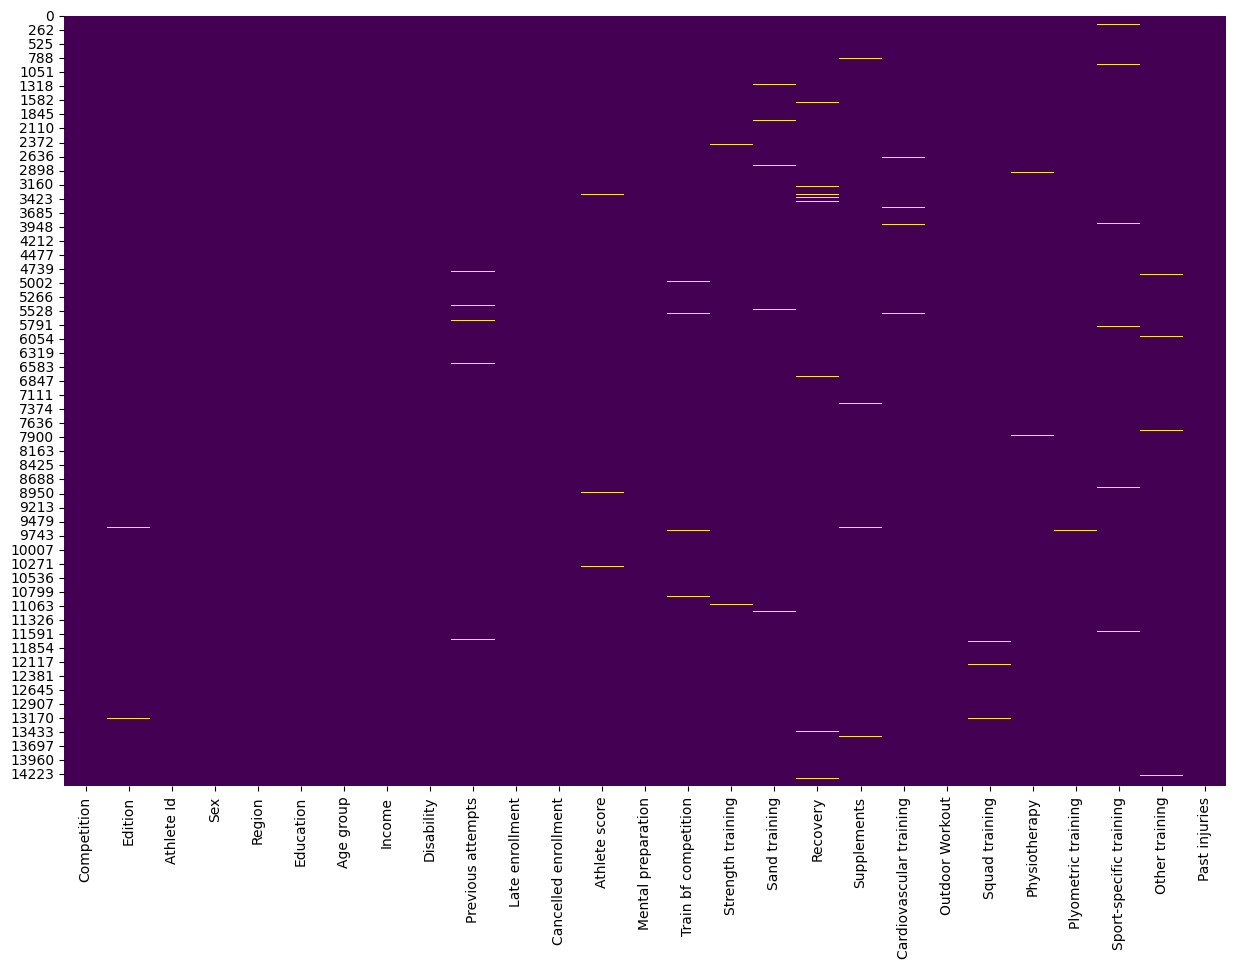

In [ ]:
plt.figure(figsize=(15, 10)) 
sns.heatmap(X_train.isnull(), cmap='viridis', cbar=False)
plt.show()


In [ ]:
# we decided to perform knn for numerical variables
knn_imputer = KNNImputer(n_neighbors=5)
X_train_imputed = knn_imputer.fit_transform(X_train__numerical)
X_train[['Edition', 'Previous attempts','Athlete score', 'Train bf competition', 'Strength training', 'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training','Squad training', 'Physiotherapy', 'Plyometric training', 'Sport-specific training', 'Other training']] = X_train_imputed

print(X_train.isna().sum())

Competition                0
Edition                    0
Athlete Id                 0
Sex                        0
Region                     0
Education                  0
Age group                  0
Income                     0
Disability                 0
Previous attempts          0
Late enrollment            0
Cancelled enrollment       0
Athlete score              0
Mental preparation         0
Train bf competition       0
Strength training          0
Sand training              0
Recovery                   0
Supplements                0
Cardiovascular training    0
Outdoor Workout            0
Squad training             0
Physiotherapy              0
Plyometric training        0
Sport-specific training    0
Other training             0
Past injuries              0
dtype: int64


#### **X_train_val**

In [ ]:
# Check missing values
X_train_val.isna().sum()/len(X_train_val)*100

Competition                0.498477
Edition                    0.526170
Athlete Id                 0.415397
Sex                        0.360011
Region                     0.498477
Education                  0.553863
Age group                  0.720022
Income                     0.636943
Disability                 0.470784
Previous attempts          0.581556
Late enrollment            0.609250
Cancelled enrollment       0.470784
Athlete score              0.553863
Mental preparation         0.304625
Train bf competition       0.720022
Strength training          0.387704
Sand training              0.415397
Recovery                   0.581556
Supplements                0.415397
Cardiovascular training    0.360011
Outdoor Workout            0.526170
Squad training             0.498477
Physiotherapy              0.470784
Plyometric training        0.276932
Sport-specific training    0.443091
Other training             0.664636
Past injuries              0.443091
dtype: float64

In [ ]:
# We perform mode imputation for missing values in categorical variables
columns_to_replace = ['Competition', 'Sex', 'Region', 'Education', 'Age group', 'Income', 'Disability', 'Late enrollment', 'Cancelled enrollment', 'Mental preparation', 'Outdoor Workout', 'Past injuries']

In [ ]:
modes = X_train_val[columns_to_replace].mode().iloc[0]

In [ ]:
X_train_val[columns_to_replace] = X_train_val[columns_to_replace].fillna(modes)

In [ ]:
X_train_val.isna().sum()

Competition                 0
Edition                    19
Athlete Id                 15
Sex                         0
Region                      0
Education                   0
Age group                   0
Income                      0
Disability                  0
Previous attempts          21
Late enrollment             0
Cancelled enrollment        0
Athlete score              20
Mental preparation          0
Train bf competition       26
Strength training          14
Sand training              15
Recovery                   21
Supplements                15
Cardiovascular training    13
Outdoor Workout             0
Squad training             18
Physiotherapy              17
Plyometric training        10
Sport-specific training    16
Other training             24
Past injuries               0
dtype: int64

In [ ]:
# we decided to drop the rows with missing values in Athlete Id
X_train_val = X_train_val.dropna(subset=['Athlete Id'])
X_train_val.shape

(3596, 27)

In [ ]:
# Get the indices of rows without missing values in X_train
cleaned_indices = X_train_val.index

# Subset y_train using the cleaned_indices
y_train_val = y_train_val.loc[cleaned_indices]


In [ ]:
X_train_val__numerical =X_train_val[['Edition', 'Previous attempts','Athlete score', 'Train bf competition', 'Strength training', 'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training','Squad training', 'Physiotherapy', 'Plyometric training', 'Sport-specific training', 'Other training']]
X_train_val__numerical

Edition  Previous attempts  Athlete score  Train bf competition  \
0      2020.0                2.0           60.0                 615.0   
1      2020.0                0.0            0.0                  79.0   
2      2022.0                0.0            0.0                 468.0   
3      2021.0                0.0           60.0                 734.0   
4      2021.0                0.0           30.0                 217.0   
...       ...                ...            ...                   ...   
3606   2020.0                0.0          120.0                 115.0   
3607   2022.0                0.0          120.0                 329.0   
3608   2019.0                2.0            0.0                  10.0   
3609   2021.0                0.0            0.0                  14.0   
3610   2019.0                0.0           60.0                  75.0   

      Strength training  Sand training  Recovery  Supplements  \
0                1599.0            0.0     406.0        391.0   
1                 178.0            0.0      90.0         66.0   
2                 158.0            0.0     476.0        184.0   
3                 754.0           31.0     526.0        728.0   
4                 301.0            0.0     175.0        157.0   
...                 ...            ...       ...          ...   
3606               13.0            0.0     145.0         15.0   
3607             1066.0           13.0     136.0        111.0   
3608                1.0            0.0       0.0          1.0   
3609                0.0            0.0       0.0         12.0   
3610              400.0            0.0      43.0         86.0   

      Cardiovascular training  Squad training  Physiotherapy  \
0                       988.0             0.0           23.0   
1                        22.0             0.0            1.0   
2                        11.0            57.0            0.0   
3                        27.0            20.0           69.0   
4                       340.0            12.0            7.0   
...                       ...             ...            ...   
3606                     35.0             0.0            0.0   
3607                      0.0             0.0            0.0   
3608                     14.0             0.0            0.0   
3609                    188.0             0.0            0.0   
3610                    177.0             0.0            8.0   

      Plyometric training  Sport-specific training  Other training  
0                    16.0                     38.0            14.0  
1                     0.0                      4.0            21.0  
2                     0.0                     66.0             0.0  
3                     0.0                    131.0             0.0  
4                     0.0                     15.0             0.0  
...                   ...                      ...             ...  
3606                  0.0                      5.0             0.0  
3607                  0.0                      3.0             9.0  
3608                  0.0                      0.0             0.0  
3609                  0.0                      1.0             0.0  
3610                  7.0                      3.0             1.0  

[3596 rows x 14 columns]

In [ ]:
# we decided to perform knn for numerical variables
knn_imputer = KNNImputer(n_neighbors=5)
X_train_val_imputed = knn_imputer.fit_transform(X_train_val__numerical)
X_train_val[['Edition', 'Previous attempts', 'Athlete score', 'Train bf competition', 'Strength training', 'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training', 'Squad training', 'Physiotherapy', 'Plyometric training', 'Sport-specific training', 'Other training']] = X_train_val_imputed

print(X_train_val.isna().sum())

Competition                0
Edition                    0
Athlete Id                 0
Sex                        0
Region                     0
Education                  0
Age group                  0
Income                     0
Disability                 0
Previous attempts          0
Late enrollment            0
Cancelled enrollment       0
Athlete score              0
Mental preparation         0
Train bf competition       0
Strength training          0
Sand training              0
Recovery                   0
Supplements                0
Cardiovascular training    0
Outdoor Workout            0
Squad training             0
Physiotherapy              0
Plyometric training        0
Sport-specific training    0
Other training             0
Past injuries              0
dtype: int64


In [ ]:
y_train.isna().sum()

0

In [ ]:
y_train_val.isna().sum()

0

### **5.4 Data Transformations**


#### **5.4.1 Categorical variables to Numerical variables: Label Enconding**

##### **X_train**

In [ ]:
encoder = LabelEncoder()

X_train['Age group'] = encoder.fit_transform(X_train['Age group'])
X_train['Income'] = encoder.fit_transform(X_train['Income'])
X_train['Education'] = encoder.fit_transform(X_train['Education'])
X_train['Competition'] = encoder.fit_transform(X_train['Competition'])


##### **X_train_val**

In [ ]:
encoder = LabelEncoder()

X_train_val['Age group'] = encoder.fit_transform(X_train_val['Age group'])
X_train_val['Income'] = encoder.fit_transform(X_train_val['Income'])
X_train_val['Education'] = encoder.fit_transform(X_train_val['Education'])
X_train_val['Competition'] = encoder.fit_transform(X_train_val['Competition'])


#### **5.4.2 Binary variables to Numerical Variables: Hot Enconding/Dummies**

##### **X_train**

In [ ]:
X_train = pd.get_dummies(X_train, columns = ['Sex'])
X_train = pd.get_dummies(X_train, columns = ['Region'])
X_train = pd.get_dummies(X_train, columns = ['Mental preparation'])
X_train = pd.get_dummies(X_train, columns = ['Disability'])
X_train = pd.get_dummies(X_train, columns = ['Late enrollment'])
X_train = pd.get_dummies(X_train, columns = ['Cancelled enrollment'])
X_train = pd.get_dummies(X_train, columns = ['Outdoor Workout'])
X_train = pd.get_dummies(X_train, columns = ['Past injuries'])
print(X_train)

       Competition  Edition  Athlete Id  Education  Age group  Income  \
0                1   2020.0    269677.0          1          1       0   
1                3   2021.0    268301.0          4          1       0   
2                0   2022.0   2259662.0          2          0       2   
3                2   2021.0    505235.0          4          0       0   
4                3   2022.0    652572.0          1          1       2   
...            ...      ...         ...        ...        ...     ...   
14439            2   2019.0    569978.0          1          0       1   
14440            3   2022.0    641992.0          1          1       4   
14441            2   2019.0    494728.0          2          0       4   
14442            0   2022.0    656756.0          2          1       4   
14443            3   2020.0     39655.0          2          0       2   

       Previous attempts  Athlete score  Train bf competition  \
0                    1.0           60.0                  4

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14369 entries, 0 to 14443
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Competition                 14369 non-null  int64  
 1   Edition                     14369 non-null  float64
 2   Athlete Id                  14369 non-null  float64
 3   Education                   14369 non-null  int64  
 4   Age group                   14369 non-null  int64  
 5   Income                      14369 non-null  int64  
 6   Previous attempts           14369 non-null  float64
 7   Athlete score               14369 non-null  float64
 8   Train bf competition        14369 non-null  float64
 9   Strength training           14369 non-null  float64
 10  Sand training               14369 non-null  float64
 11  Recovery                    14369 non-null  float64
 12  Supplements                 14369 non-null  float64
 13  Cardiovascular training     143

##### **X_train_val**

In [ ]:
X_train_val = pd.get_dummies(X_train_val, columns = ['Sex'])
X_train_val = pd.get_dummies(X_train_val, columns = ['Region'])
X_train_val = pd.get_dummies(X_train_val, columns = ['Mental preparation'])
X_train_val = pd.get_dummies(X_train_val, columns = ['Disability'])
X_train_val = pd.get_dummies(X_train_val, columns = ['Late enrollment'])
X_train_val = pd.get_dummies(X_train_val, columns = ['Cancelled enrollment'])
X_train_val = pd.get_dummies(X_train_val, columns = ['Outdoor Workout'])
X_train_val = pd.get_dummies(X_train_val, columns = ['Past injuries'])
print(X_train_val)

      Competition  Edition  Athlete Id  Education  Age group  Income  \
0               1   2020.0    390400.0          2          0       0   
1               1   2020.0    548938.0          1          1       4   
2               2   2022.0    653550.0          4          2       3   
3               2   2021.0    607130.0          2          0       0   
4               1   2021.0    344409.0          1          1       0   
...           ...      ...         ...        ...        ...     ...   
3606            3   2020.0    242149.0          2          0       1   
3607            0   2022.0    593987.0          1          1       3   
3608            3   2019.0    272617.0          2          0       4   
3609            2   2021.0    614345.0          2          0       1   
3610            1   2019.0    596125.0          2          0       2   

      Previous attempts  Athlete score  Train bf competition  \
0                   2.0           60.0                 615.0   
1      

In [ ]:
X_train_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3596 entries, 0 to 3610
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Competition                 3596 non-null   int64  
 1   Edition                     3596 non-null   float64
 2   Athlete Id                  3596 non-null   float64
 3   Education                   3596 non-null   int64  
 4   Age group                   3596 non-null   int64  
 5   Income                      3596 non-null   int64  
 6   Previous attempts           3596 non-null   float64
 7   Athlete score               3596 non-null   float64
 8   Train bf competition        3596 non-null   float64
 9   Strength training           3596 non-null   float64
 10  Sand training               3596 non-null   float64
 11  Recovery                    3596 non-null   float64
 12  Supplements                 3596 non-null   float64
 13  Cardiovascular training     3596 

In [ ]:
X_train = X_train.astype(int)
X_train_val = X_train_val.astype(int)
y_train = y_train.astype(int)
y_train_val = y_train_val.astype(int)

### **5.5 Outliers**

#### **X_train**

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14369 entries, 0 to 14443
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Competition                 14369 non-null  int64
 1   Edition                     14369 non-null  int64
 2   Athlete Id                  14369 non-null  int64
 3   Education                   14369 non-null  int64
 4   Age group                   14369 non-null  int64
 5   Income                      14369 non-null  int64
 6   Previous attempts           14369 non-null  int64
 7   Athlete score               14369 non-null  int64
 8   Train bf competition        14369 non-null  int64
 9   Strength training           14369 non-null  int64
 10  Sand training               14369 non-null  int64
 11  Recovery                    14369 non-null  int64
 12  Supplements                 14369 non-null  int64
 13  Cardiovascular training     14369 non-null  int64
 14  Squad 

In [ ]:
#Formatting Axis for specific font sizes & colors
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

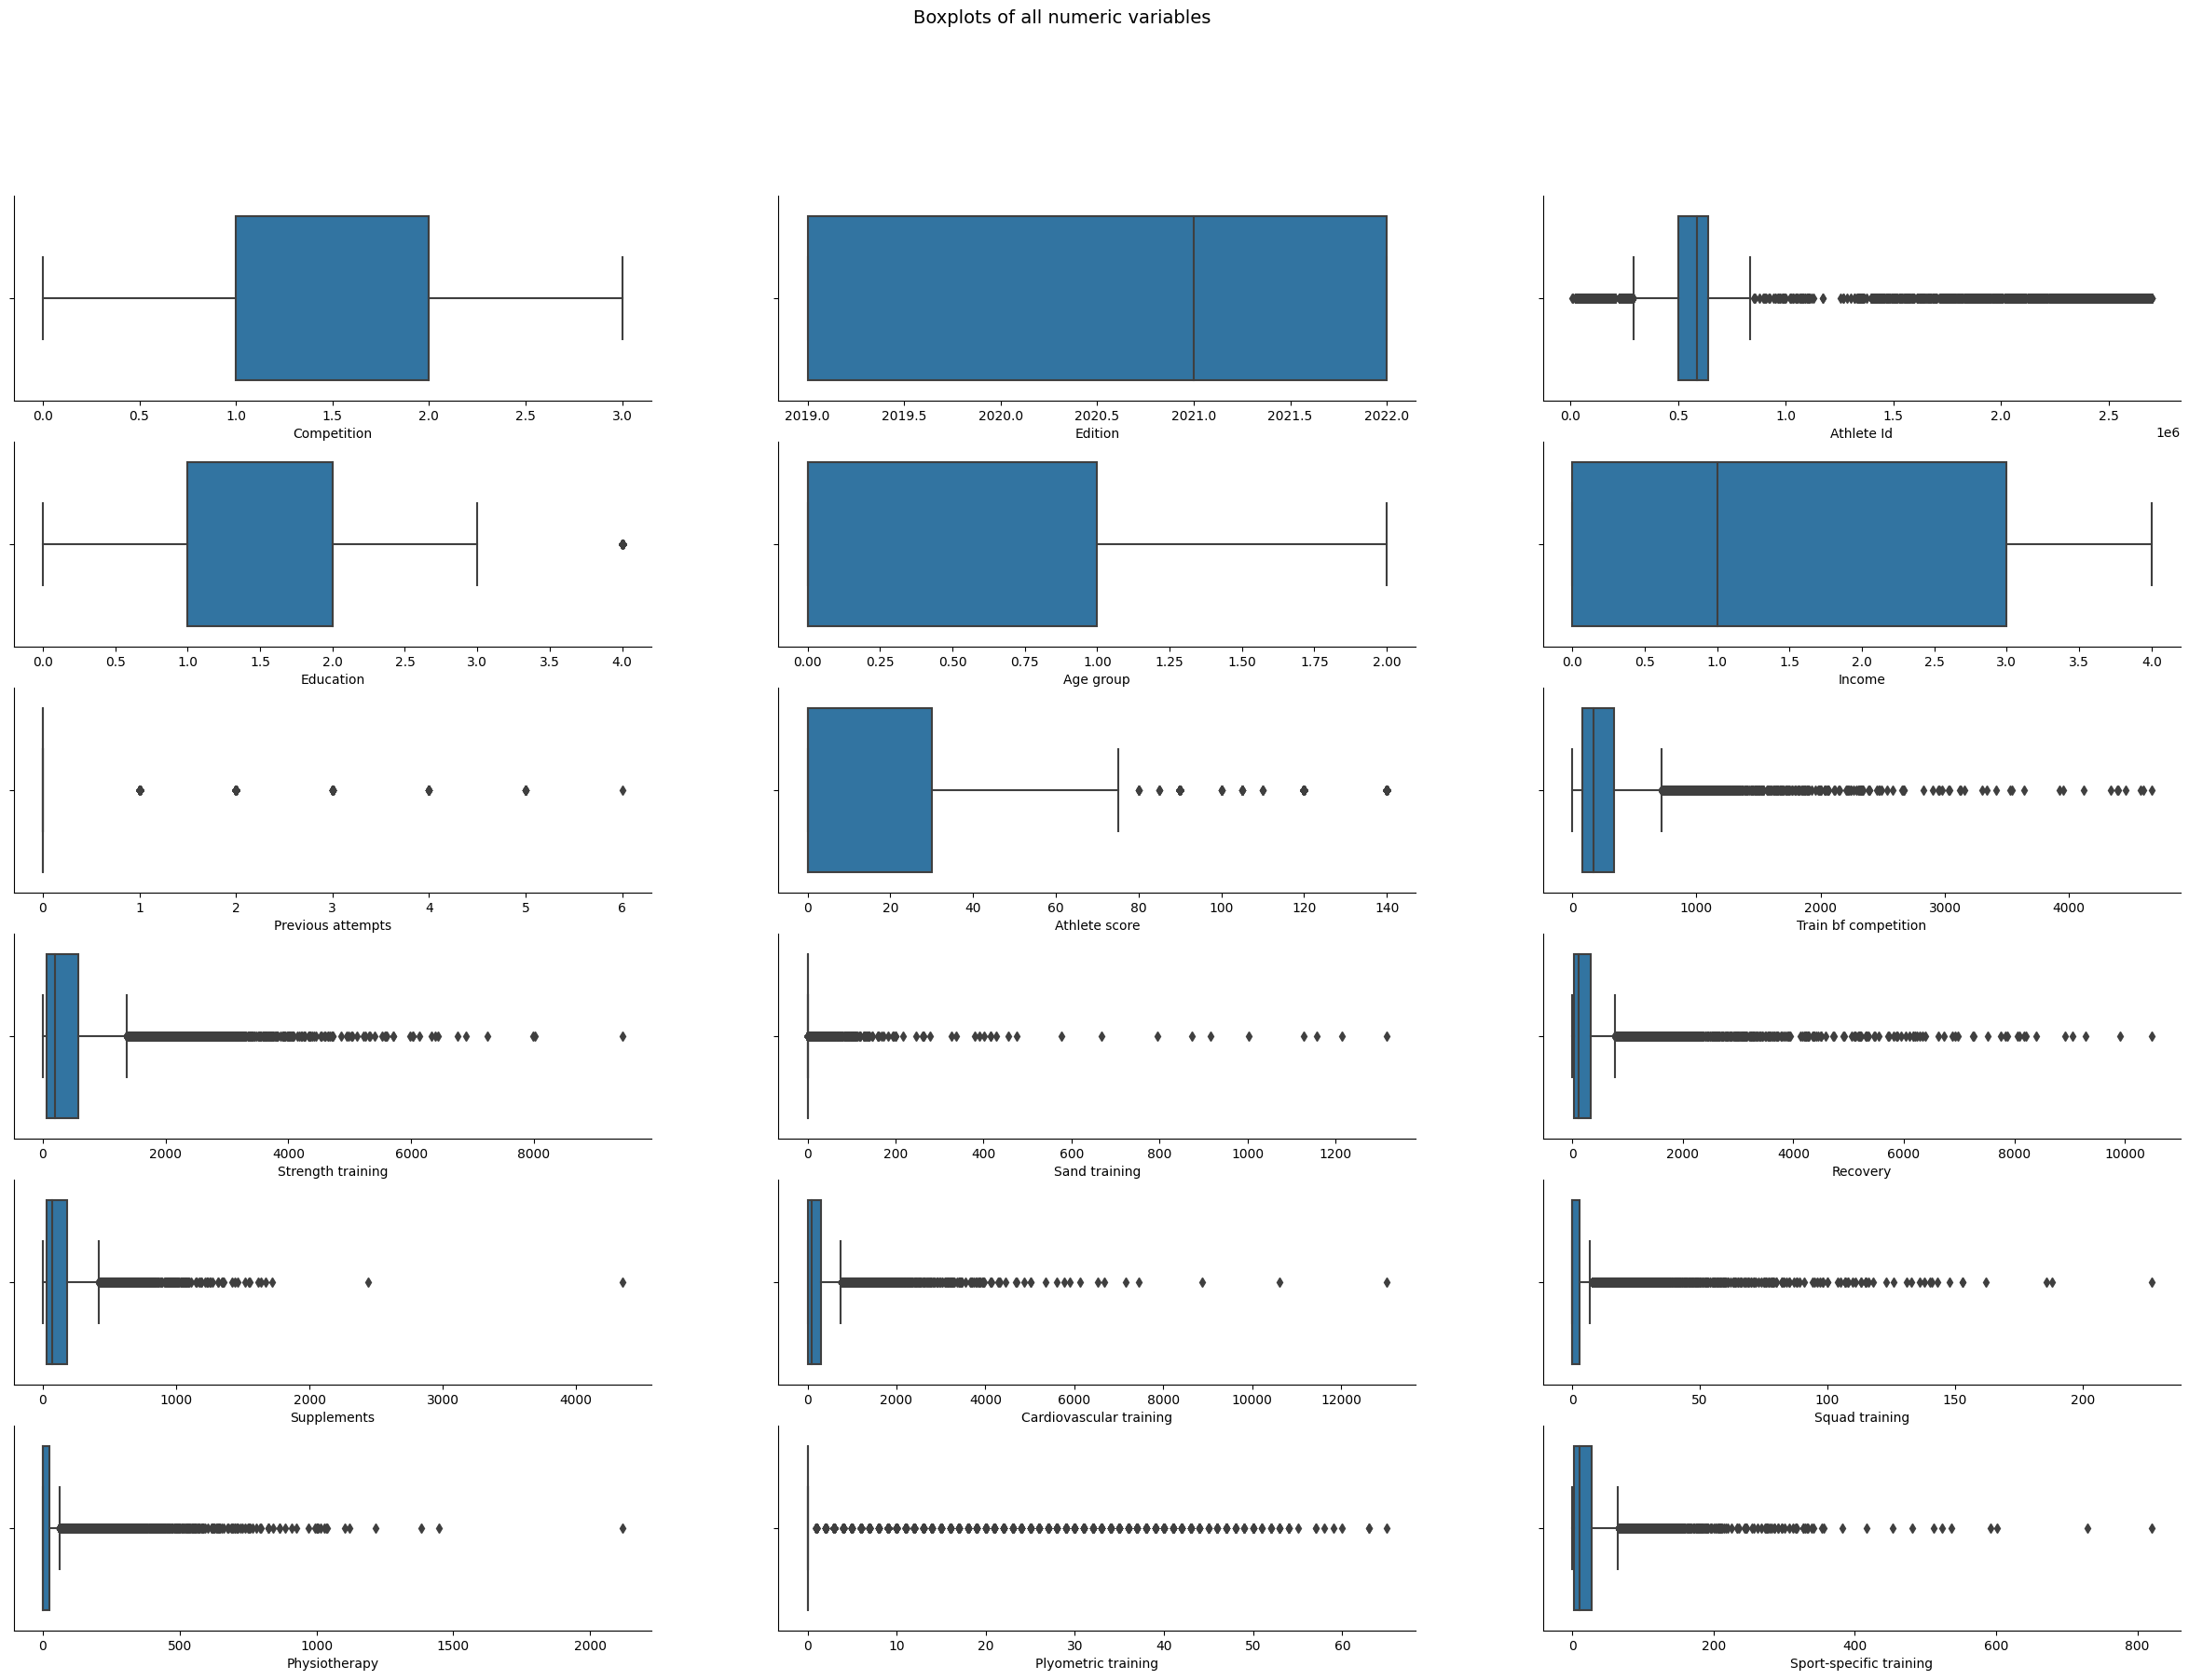

In [ ]:
# Identify all numeric variables in the dataset
numerical=X_train.select_dtypes(include=[np.number]).columns.tolist()
# Draw
fig, ax = plt.subplots(6, 3, figsize=(30,20))
for var, subplot in zip(X_train[numerical], ax.flatten()):
    g = sns.boxplot(data=X_train,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots of all numeric variables", fontsize=plots_Title_fontSize);


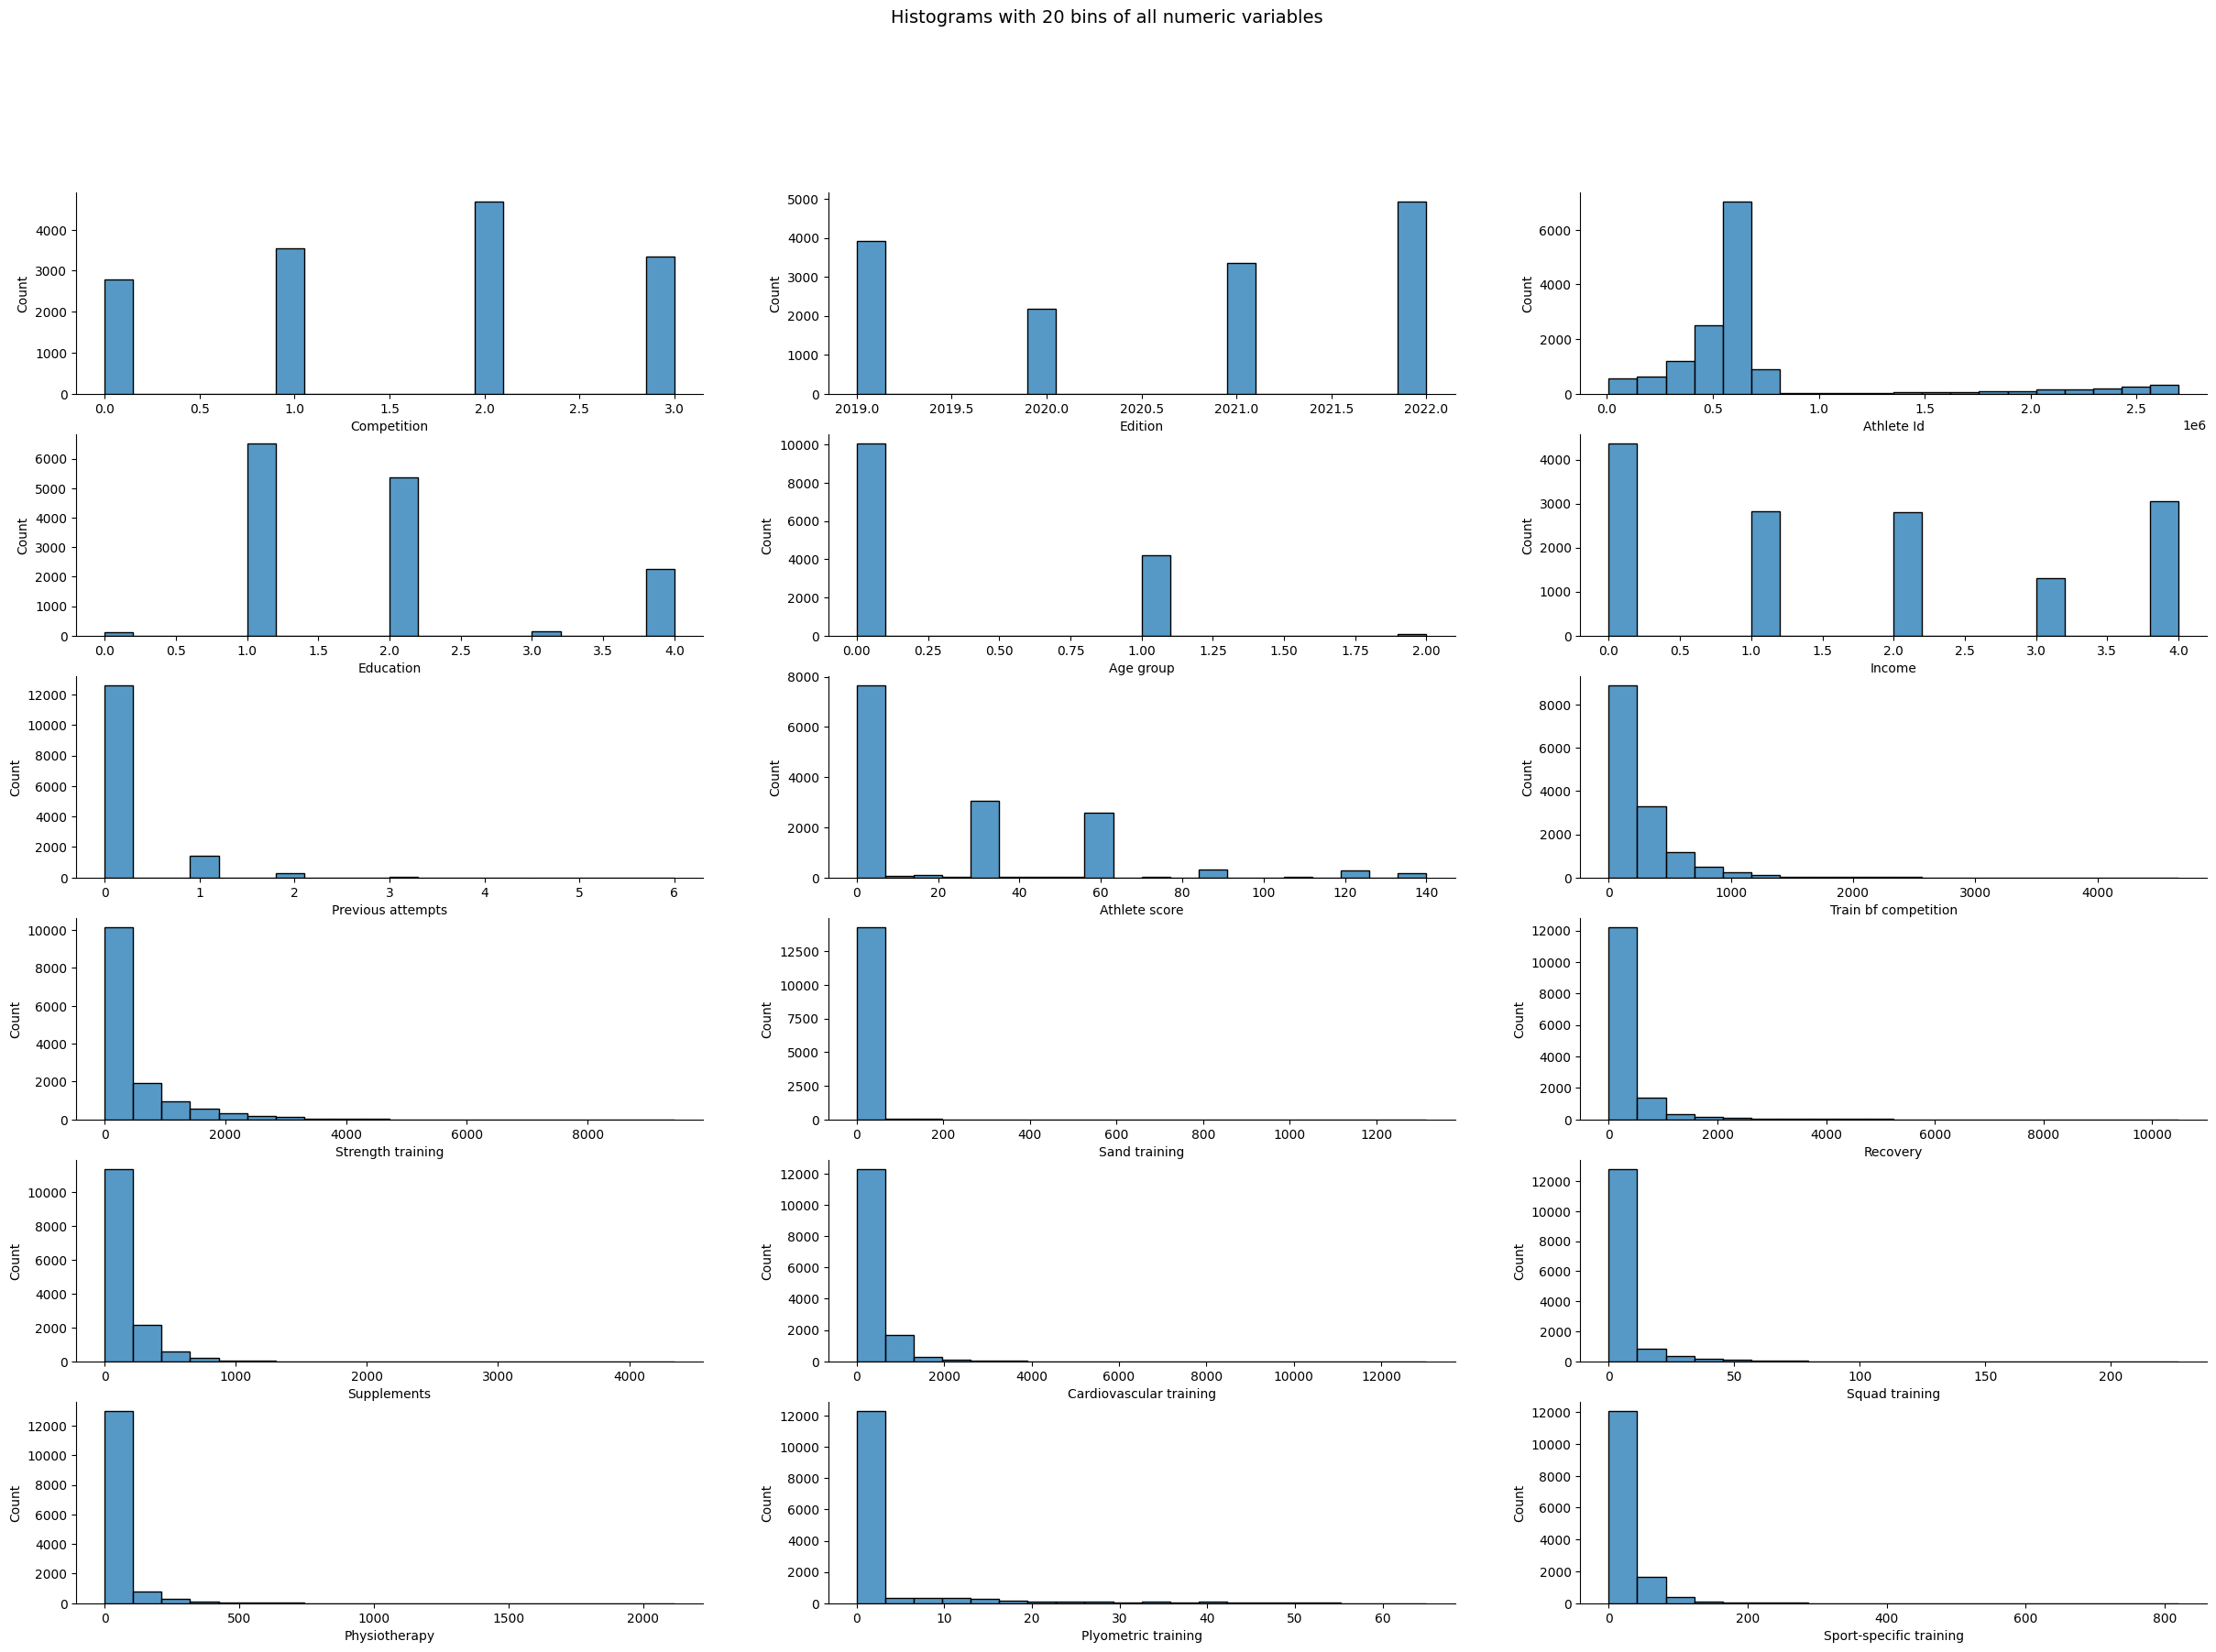

In [ ]:
# Draw
fig, ax = plt.subplots(6, 3, figsize=(30,20))
for var, subplot in zip(X_train[numerical], ax.flatten()):
    g = sns.histplot(data=X_train,
                bins=20,
                 x=var,
                 ax=subplot,
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Histograms with 20 bins of all numeric variables", fontsize=plots_Title_fontSize);

In [ ]:
to_drop_train = []
to_drop_train = X_train.loc[X_train['Sport-specific training']>300].index.tolist()
to_drop_train += X_train.loc[X_train['Previous attempts'] > 3].index.tolist()
to_drop_train += X_train.loc[X_train['Train bf competition'] > 2500].index.tolist()
to_drop_train += X_train.loc[X_train['Strength training'] > 4500].index.tolist()
to_drop_train += X_train.loc[X_train['Sand training'] > 400].index.tolist()
to_drop_train += X_train.loc[X_train['Recovery'] > 6000].index.tolist()
to_drop_train += X_train.loc[X_train['Supplements'] > 1000].index.tolist()
to_drop_train += X_train.loc[X_train['Cardiovascular training'] > 4000].index.tolist()
to_drop_train += X_train.loc[X_train['Squad training'] > 110].index.tolist()
to_drop_train += X_train.loc[X_train['Physiotherapy'] > 800].index.tolist()
to_drop_train += X_train.loc[X_train['Plyometric training'] > 50].index.tolist()
to_drop_train += X_train.loc[X_train['Other training'] > 90].index.tolist()

In [ ]:

ordered_dict = OrderedDict()
for x in to_drop_train:
    ordered_dict[x] = None
to_drop_train = list(ordered_dict.keys())


In [ ]:
(X_train['Previous attempts'] >3).sum()

18

In [ ]:
X_train.drop(X_train[(X_train['Previous attempts'] >3)].index  , inplace=True)

In [ ]:
(X_train['Athlete score'] >120).sum()

189

In [ ]:
(X_train['Train bf competition'] >2500).sum()

32

In [ ]:
X_train.drop(X_train[(X_train['Train bf competition'] >2500)].index  , inplace=True)

In [ ]:
(X_train['Strength training'] >4500).sum()

38

In [ ]:
X_train.drop(X_train[(X_train['Strength training'] >4500)].index  , inplace=True)

In [ ]:
(X_train['Sand training'] >400).sum()

16

In [ ]:
X_train.drop(X_train[(X_train['Sand training'] >400)].index  , inplace=True)

In [ ]:
(X_train['Recovery'] >6000).sum()

17

In [ ]:
X_train.drop(X_train[(X_train['Recovery'] >6000)].index  , inplace=True)

In [ ]:
(X_train['Supplements'] >1000).sum()

34

In [ ]:
X_train.drop(X_train[(X_train['Supplements'] >1000)].index  , inplace=True)

In [ ]:
(X_train['Cardiovascular training'] >4000).sum()

22

In [ ]:
X_train.drop(X_train[(X_train['Cardiovascular training'] >4000)].index  , inplace=True)

In [ ]:
(X_train['Squad training'] >110).sum()

22

In [ ]:
X_train.drop(X_train[(X_train['Squad training'] >110)].index  , inplace=True)

In [ ]:
(X_train['Physiotherapy'] >800).sum()

21

In [ ]:
X_train.drop(X_train[(X_train['Physiotherapy'] >800)].index  , inplace=True)

In [ ]:
(X_train['Plyometric training'] >50).sum()

16

In [ ]:
X_train.drop(X_train[(X_train['Plyometric training'] >50)].index  , inplace=True)

In [ ]:
(X_train['Sport-specific training'] >300).sum()

13

In [ ]:
X_train.drop(X_train[(X_train['Sport-specific training'] >300)].index  , inplace=True)

In [ ]:
(X_train['Other training'] >90).sum()

46

In [ ]:
X_train.drop(X_train[(X_train['Other training'] >90)].index  , inplace=True)

In [ ]:
X_train.shape

(14074, 38)

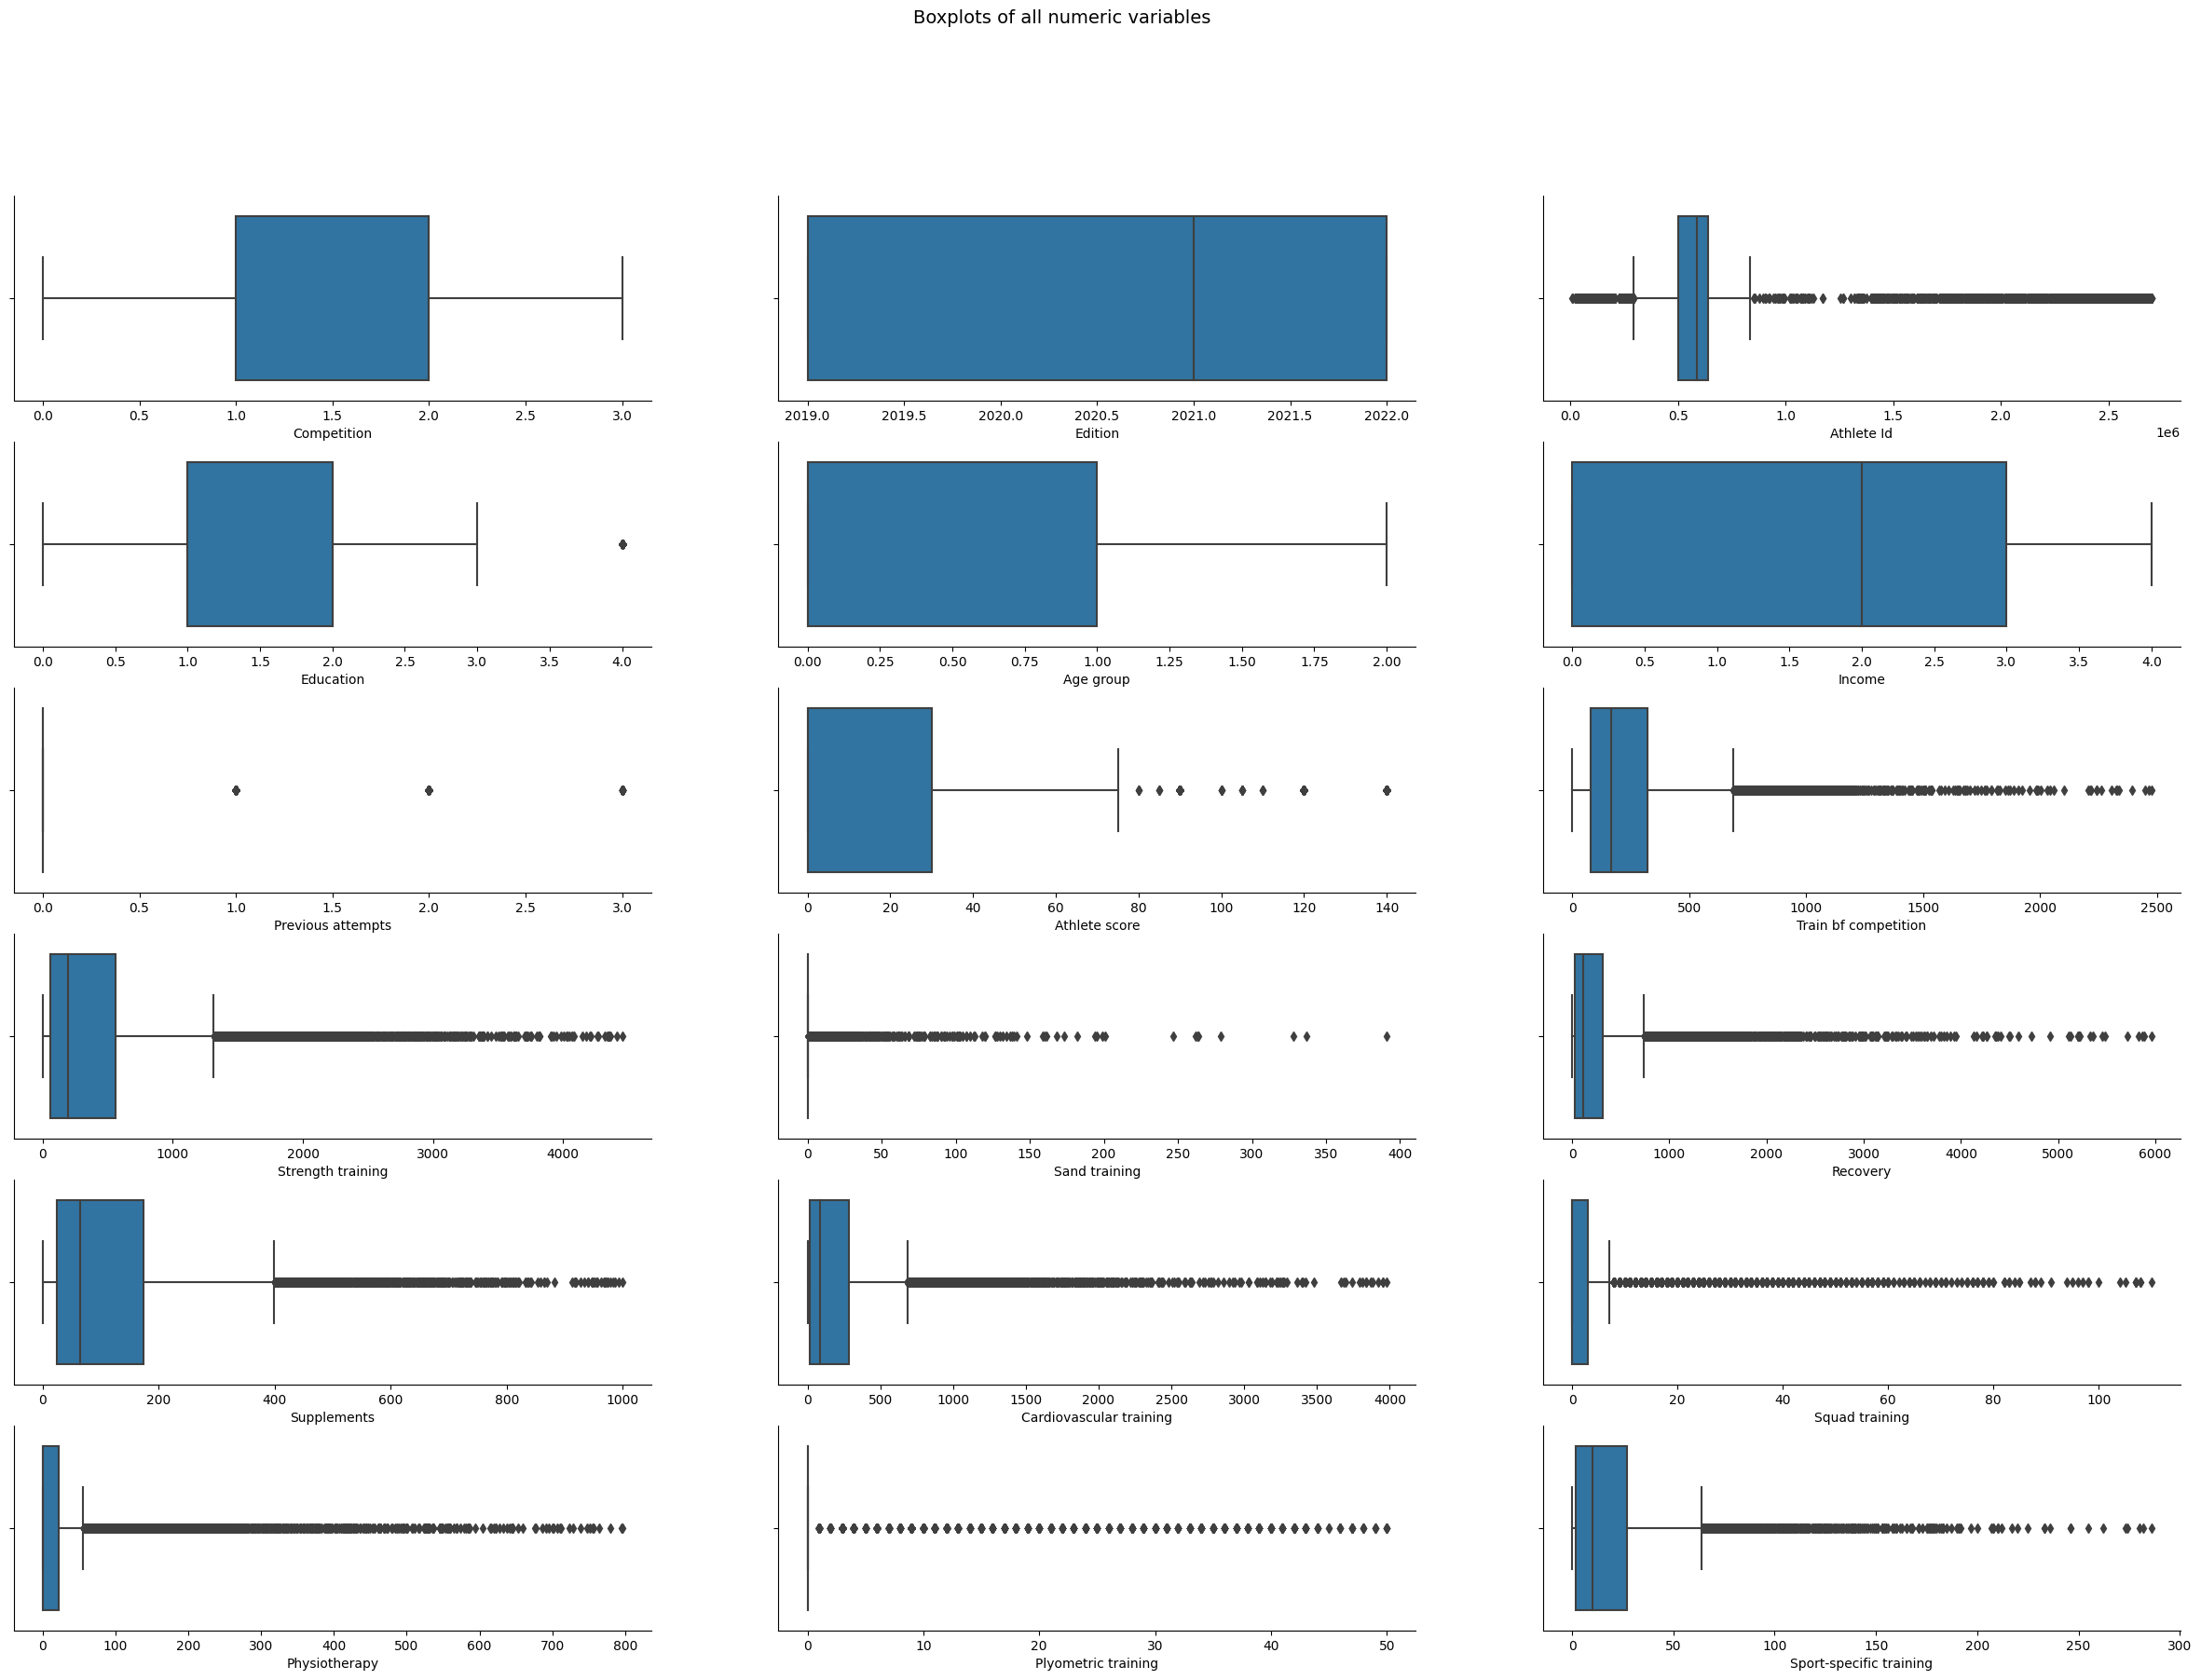

In [ ]:
#check distribution after deleting outliers
# Draw
fig, ax = plt.subplots(6, 3, figsize=(30,20))
for var, subplot in zip(X_train[numerical], ax.flatten()):
    g = sns.boxplot(data=X_train,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots of all numeric variables", fontsize=plots_Title_fontSize);

#### **X_train_val**

In [ ]:
X_train_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3596 entries, 0 to 3610
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Competition                 3596 non-null   int64
 1   Edition                     3596 non-null   int64
 2   Athlete Id                  3596 non-null   int64
 3   Education                   3596 non-null   int64
 4   Age group                   3596 non-null   int64
 5   Income                      3596 non-null   int64
 6   Previous attempts           3596 non-null   int64
 7   Athlete score               3596 non-null   int64
 8   Train bf competition        3596 non-null   int64
 9   Strength training           3596 non-null   int64
 10  Sand training               3596 non-null   int64
 11  Recovery                    3596 non-null   int64
 12  Supplements                 3596 non-null   int64
 13  Cardiovascular training     3596 non-null   int64
 14  Squad tr

In [ ]:
#Formatting Axis for specific font sizes & colors
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

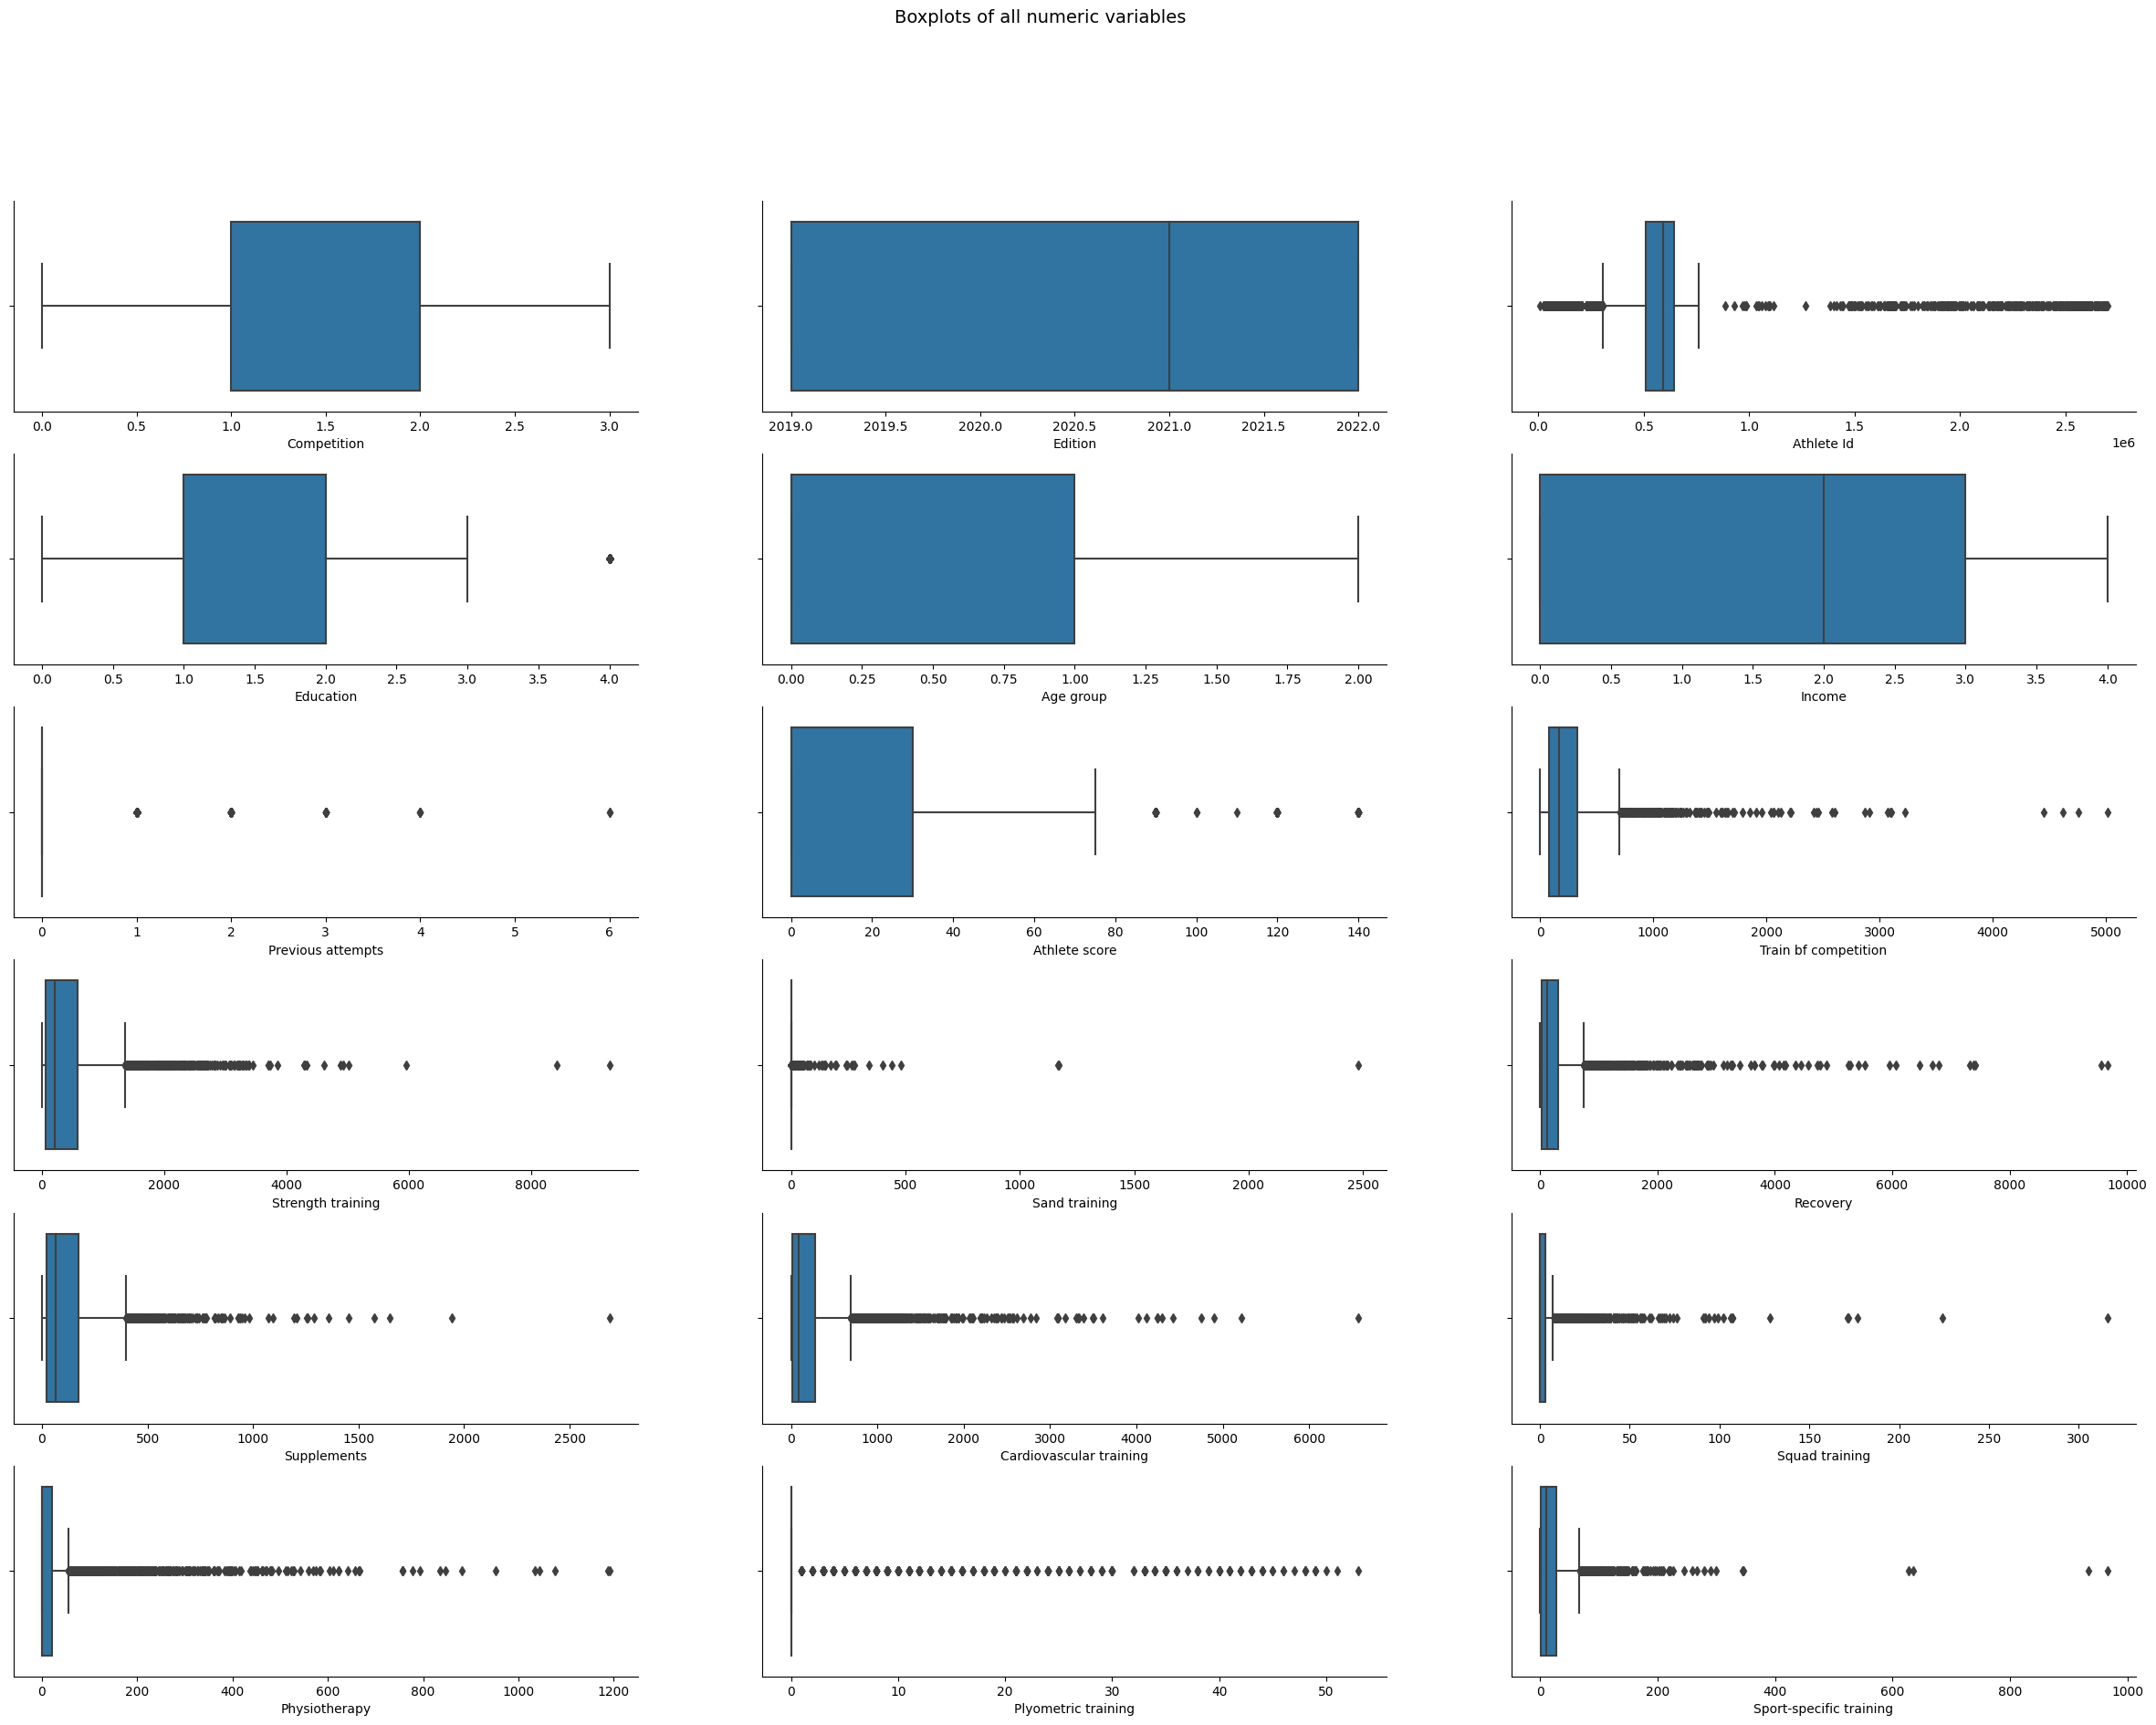

In [ ]:
# Identify all numeric variables in the dataset
numerical=X_train_val.select_dtypes(include=[np.number]).columns.tolist()
# Draw
fig, ax = plt.subplots(6, 3, figsize=(30,21))
for var, subplot in zip(X_train_val[numerical], ax.flatten()):
    g = sns.boxplot(data=X_train_val,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots of all numeric variables", fontsize=plots_Title_fontSize);


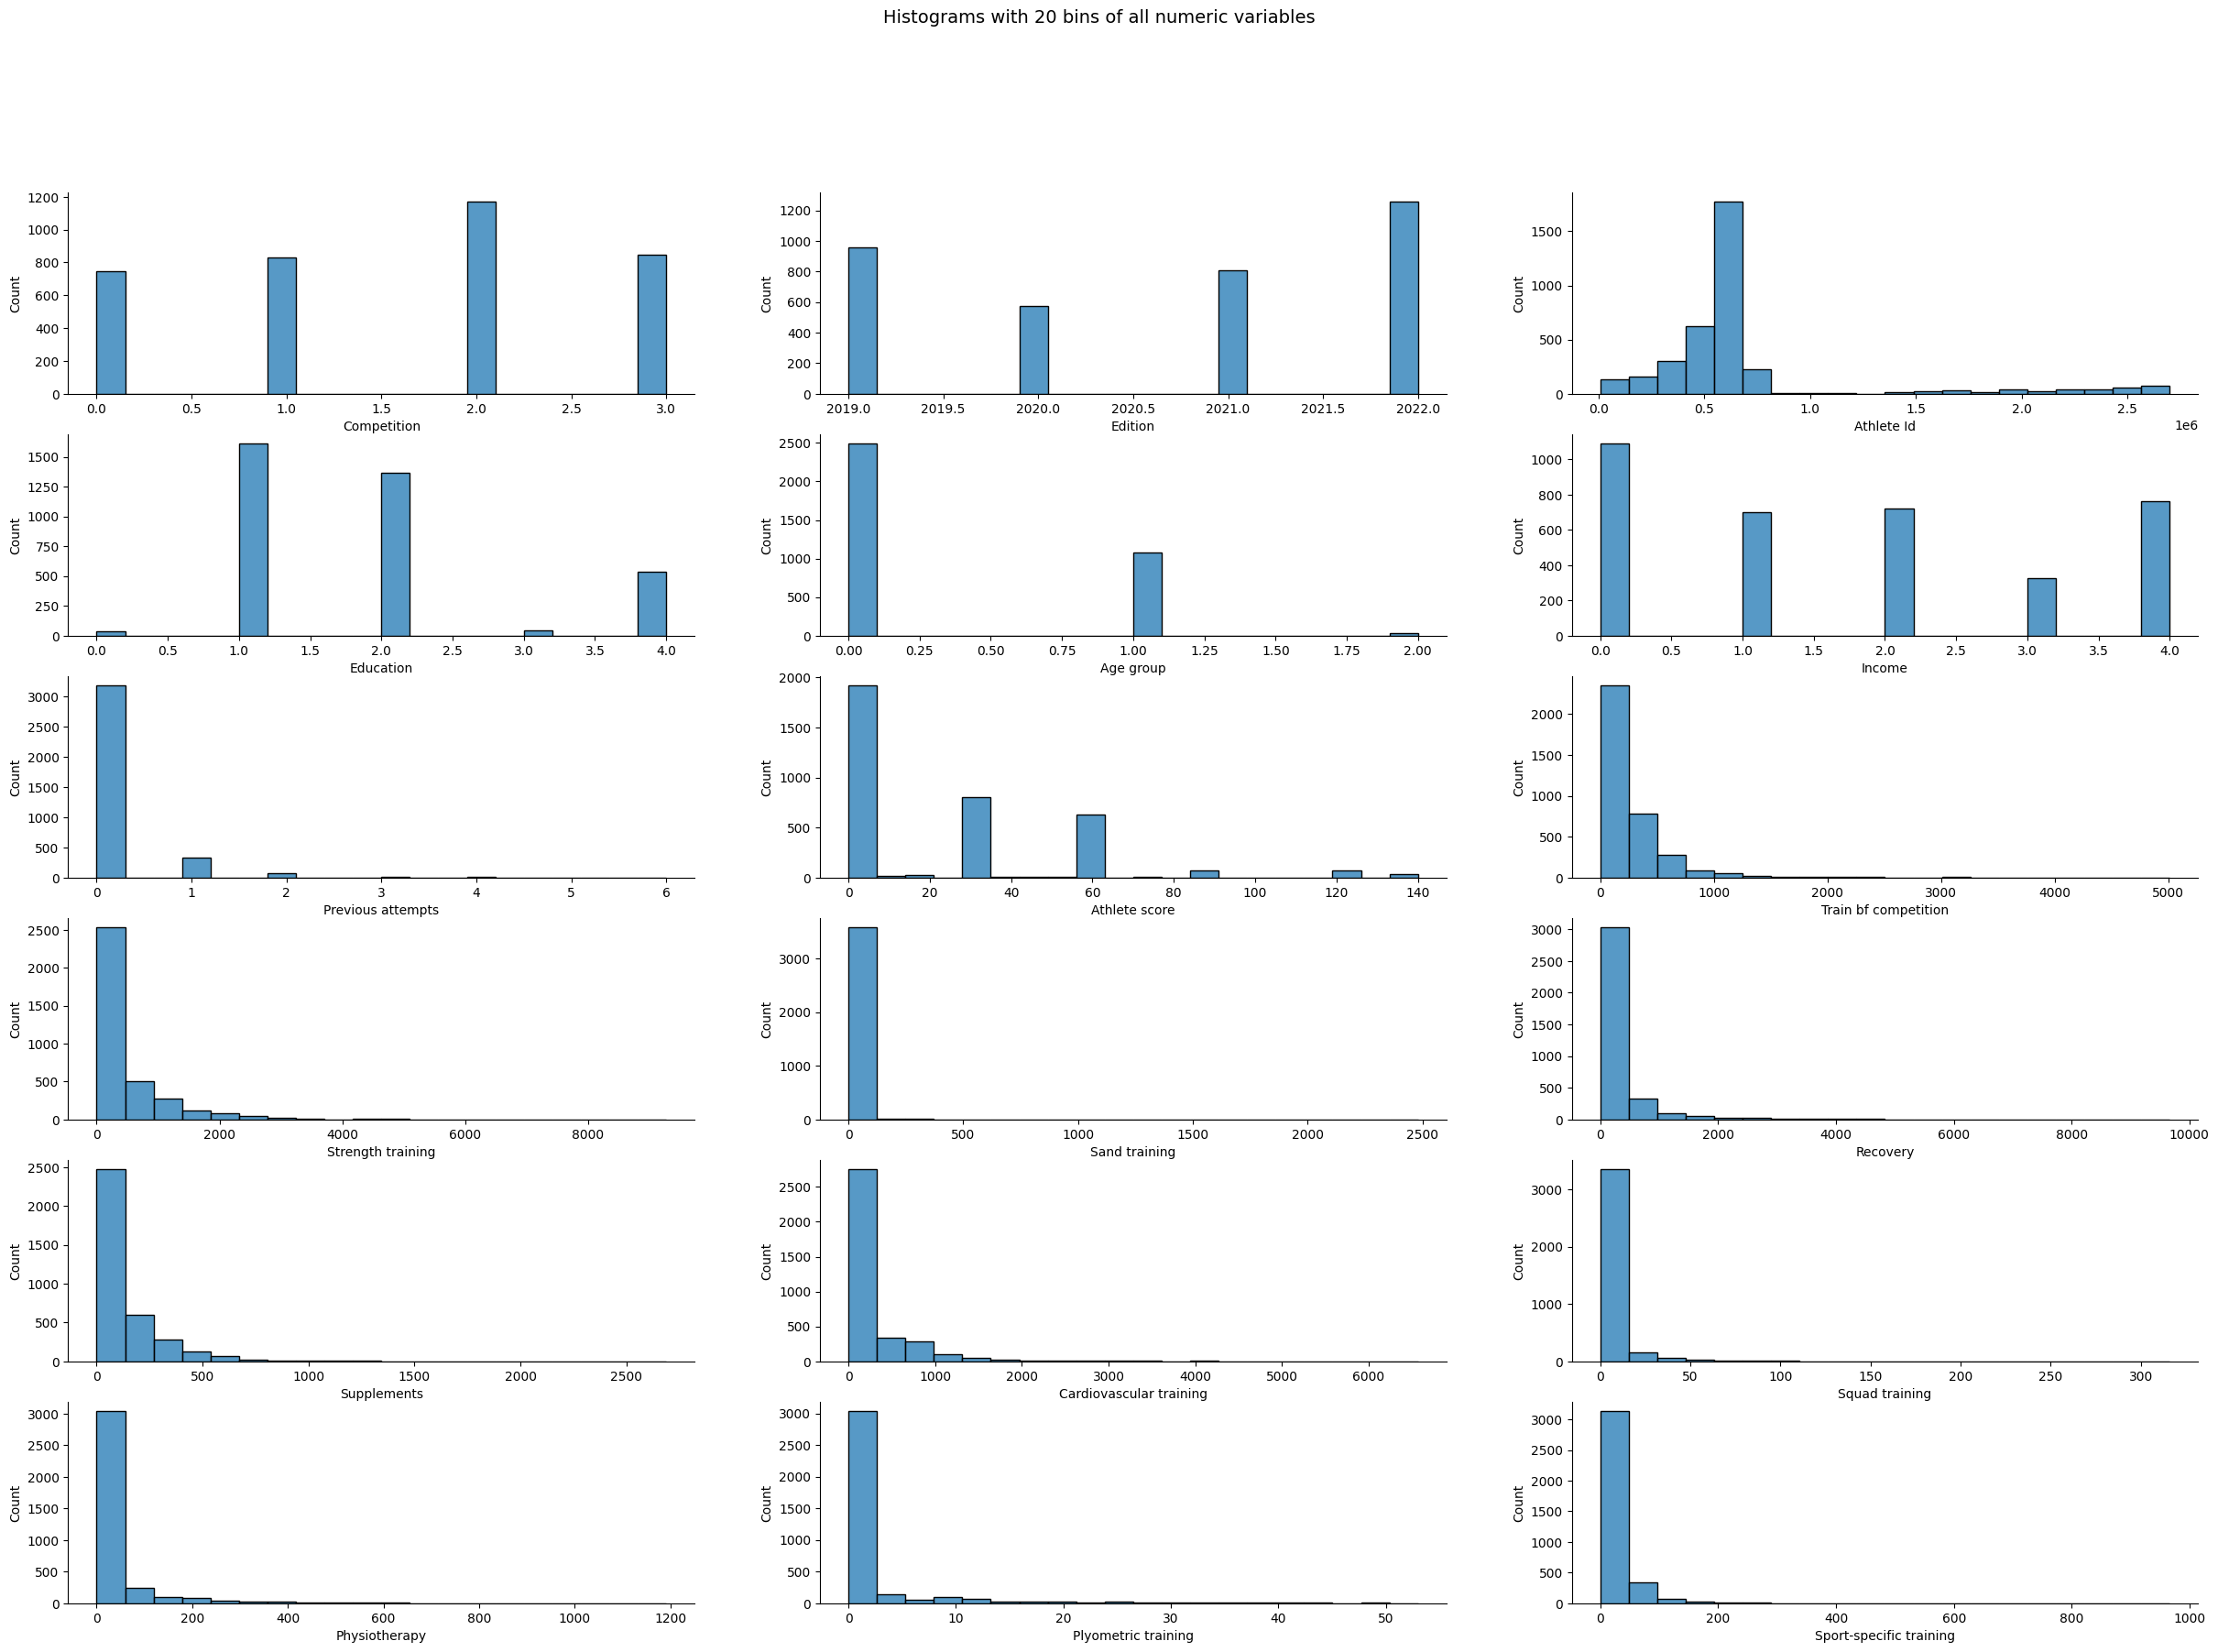

In [ ]:
# Draw
fig, ax = plt.subplots(6, 3, figsize=(30,20))
for var, subplot in zip(X_train_val[numerical], ax.flatten()):
    g = sns.histplot(data=X_train_val,
                bins=20,
                 x=var,
                 ax=subplot,
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Histograms with 20 bins of all numeric variables", fontsize=plots_Title_fontSize);

In [ ]:
to_drop_train_val = []
to_drop_train_val = X_train_val.loc[X_train_val['Sport-specific training']>300].index.tolist()
to_drop_train_val += X_train_val.loc[X_train_val['Previous attempts'] > 3].index.tolist()
to_drop_train_val += X_train_val.loc[X_train_val['Train bf competition'] > 2500].index.tolist()
to_drop_train_val += X_train_val.loc[X_train_val['Strength training'] > 4500].index.tolist()
to_drop_train_val += X_train_val.loc[X_train_val['Sand training'] > 400].index.tolist()
to_drop_train_val += X_train_val.loc[X_train_val['Recovery'] > 6000].index.tolist()
to_drop_train_val += X_train_val.loc[X_train_val['Supplements'] > 1000].index.tolist()
to_drop_train_val += X_train_val.loc[X_train_val['Cardiovascular training'] > 4000].index.tolist()
to_drop_train_val += X_train_val.loc[X_train_val['Squad training'] > 110].index.tolist()
to_drop_train_val += X_train_val.loc[X_train_val['Physiotherapy'] > 800].index.tolist()
to_drop_train_val += X_train_val.loc[X_train_val['Plyometric training'] > 50].index.tolist()
to_drop_train_val += X_train_val.loc[X_train_val['Other training'] > 90].index.tolist()

In [ ]:
ordered_dict = OrderedDict()
for x in to_drop_train_val:
    ordered_dict[x] = None
to_drop_train_val = list(ordered_dict.keys())


In [ ]:
(X_train_val['Previous attempts'] >3).sum()

6

In [ ]:
X_train_val.drop(X_train_val[(X_train_val['Previous attempts'] >3)].index  , inplace=True)

In [ ]:
(X_train_val['Athlete score'] >120).sum()

38

In [ ]:
(X_train_val['Train bf competition'] >2500).sum()

11

In [ ]:
X_train_val.drop(X_train_val[(X_train_val['Train bf competition'] >2500)].index  , inplace=True)

In [ ]:
(X_train_val['Strength training'] >4500).sum()

5

In [ ]:
X_train_val.drop(X_train_val[(X_train_val['Strength training'] >4500)].index  , inplace=True)

In [ ]:
(X_train_val['Sand training'] >400).sum()

5

In [ ]:
X_train_val.drop(X_train_val[(X_train_val['Sand training'] >400)].index  , inplace=True)

In [ ]:
(X_train_val['Recovery'] >6000).sum()

5

In [ ]:
X_train_val.drop(X_train_val[(X_train_val['Recovery'] >6000)].index  , inplace=True)

In [ ]:
(X_train_val['Supplements'] >1000).sum()

5

In [ ]:
X_train_val.drop(X_train_val[(X_train_val['Supplements'] >1000)].index  , inplace=True)

In [ ]:
(X_train_val['Cardiovascular training'] >4000).sum()

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


8

In [ ]:
X_train_val.drop(X_train_val[(X_train_val['Cardiovascular training'] >4000)].index  , inplace=True)

In [ ]:
(X_train_val['Squad training'] >110).sum()

5

In [ ]:
X_train_val.drop(X_train_val[(X_train_val['Squad training'] >110)].index  , inplace=True)

In [ ]:
(X_train_val['Physiotherapy'] >800).sum()

9

In [ ]:
X_train_val.drop(X_train_val[(X_train_val['Physiotherapy'] >800)].index  , inplace=True)

In [ ]:
(X_train_val['Plyometric training'] >50).sum()

1

In [ ]:
X_train_val.drop(X_train_val[(X_train_val['Plyometric training'] >50)].index  , inplace=True)

In [ ]:
(X_train_val['Sport-specific training'] >300).sum()

3

In [ ]:
X_train_val.drop(X_train_val[(X_train_val['Sport-specific training'] >300)].index  , inplace=True)

In [ ]:
(X_train_val['Other training'] >90).sum()

11

In [ ]:
X_train_val.drop(X_train_val[(X_train_val['Other training'] >90)].index  , inplace=True)

In [ ]:
X_train_val.shape

(3522, 38)

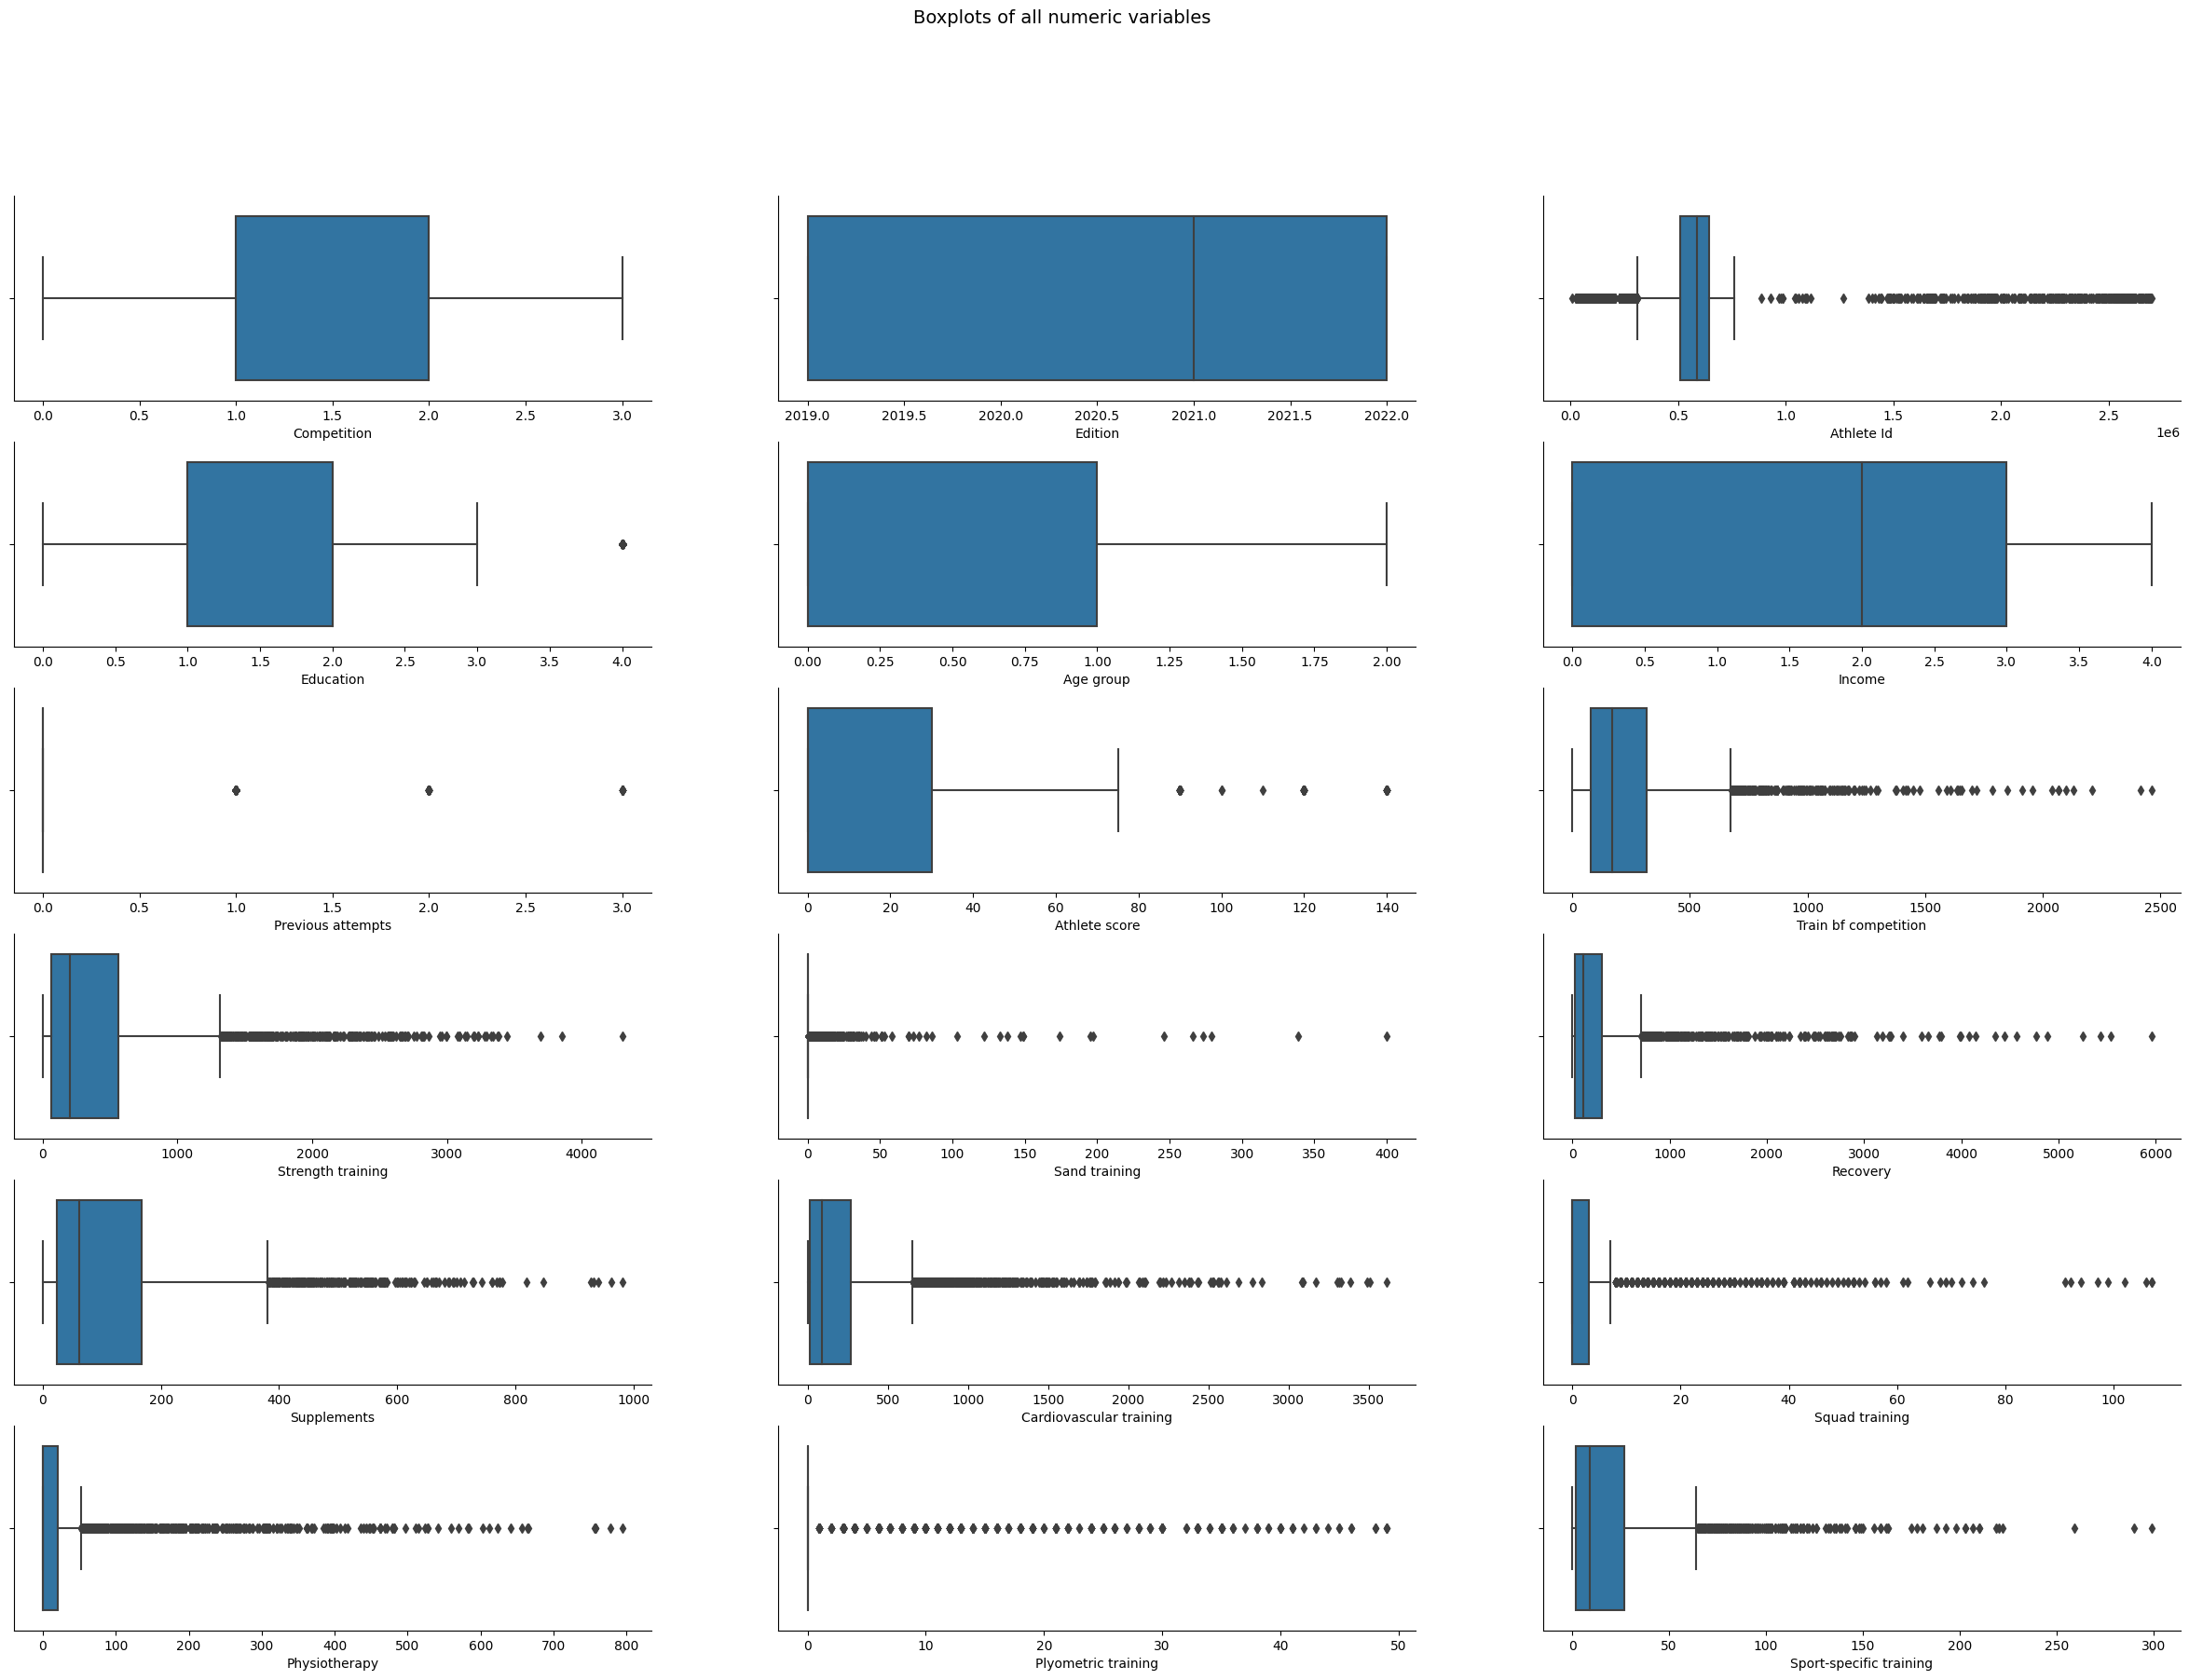

In [ ]:
#check distribution after deleting outliers
# Draw
fig, ax = plt.subplots(6, 3, figsize=(30,20))
for var, subplot in zip(X_train_val[numerical], ax.flatten()):
    g = sns.boxplot(data=X_train_val,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Boxplots of all numeric variables", fontsize=plots_Title_fontSize);

#### **y_train**

In [ ]:
y_train.head(10)

0    0
1    1
2    1
3    0
4    1
5    1
6    0
7    1
8    1
9    1
Name: Outcome, dtype: int64

In [ ]:
y_train=y_train.drop(index=to_drop_train, axis=0)

In [ ]:
y_train.shape

(14074,)

#### **y_train_val**

In [ ]:
y_train_val = y_train_val.drop(index=to_drop_train_val, axis=0)

In [ ]:
y_train_val.shape

(3522,)

### **5.6 Feature Engineering**

#### **5.6.1 Correlation**

<Axes: >

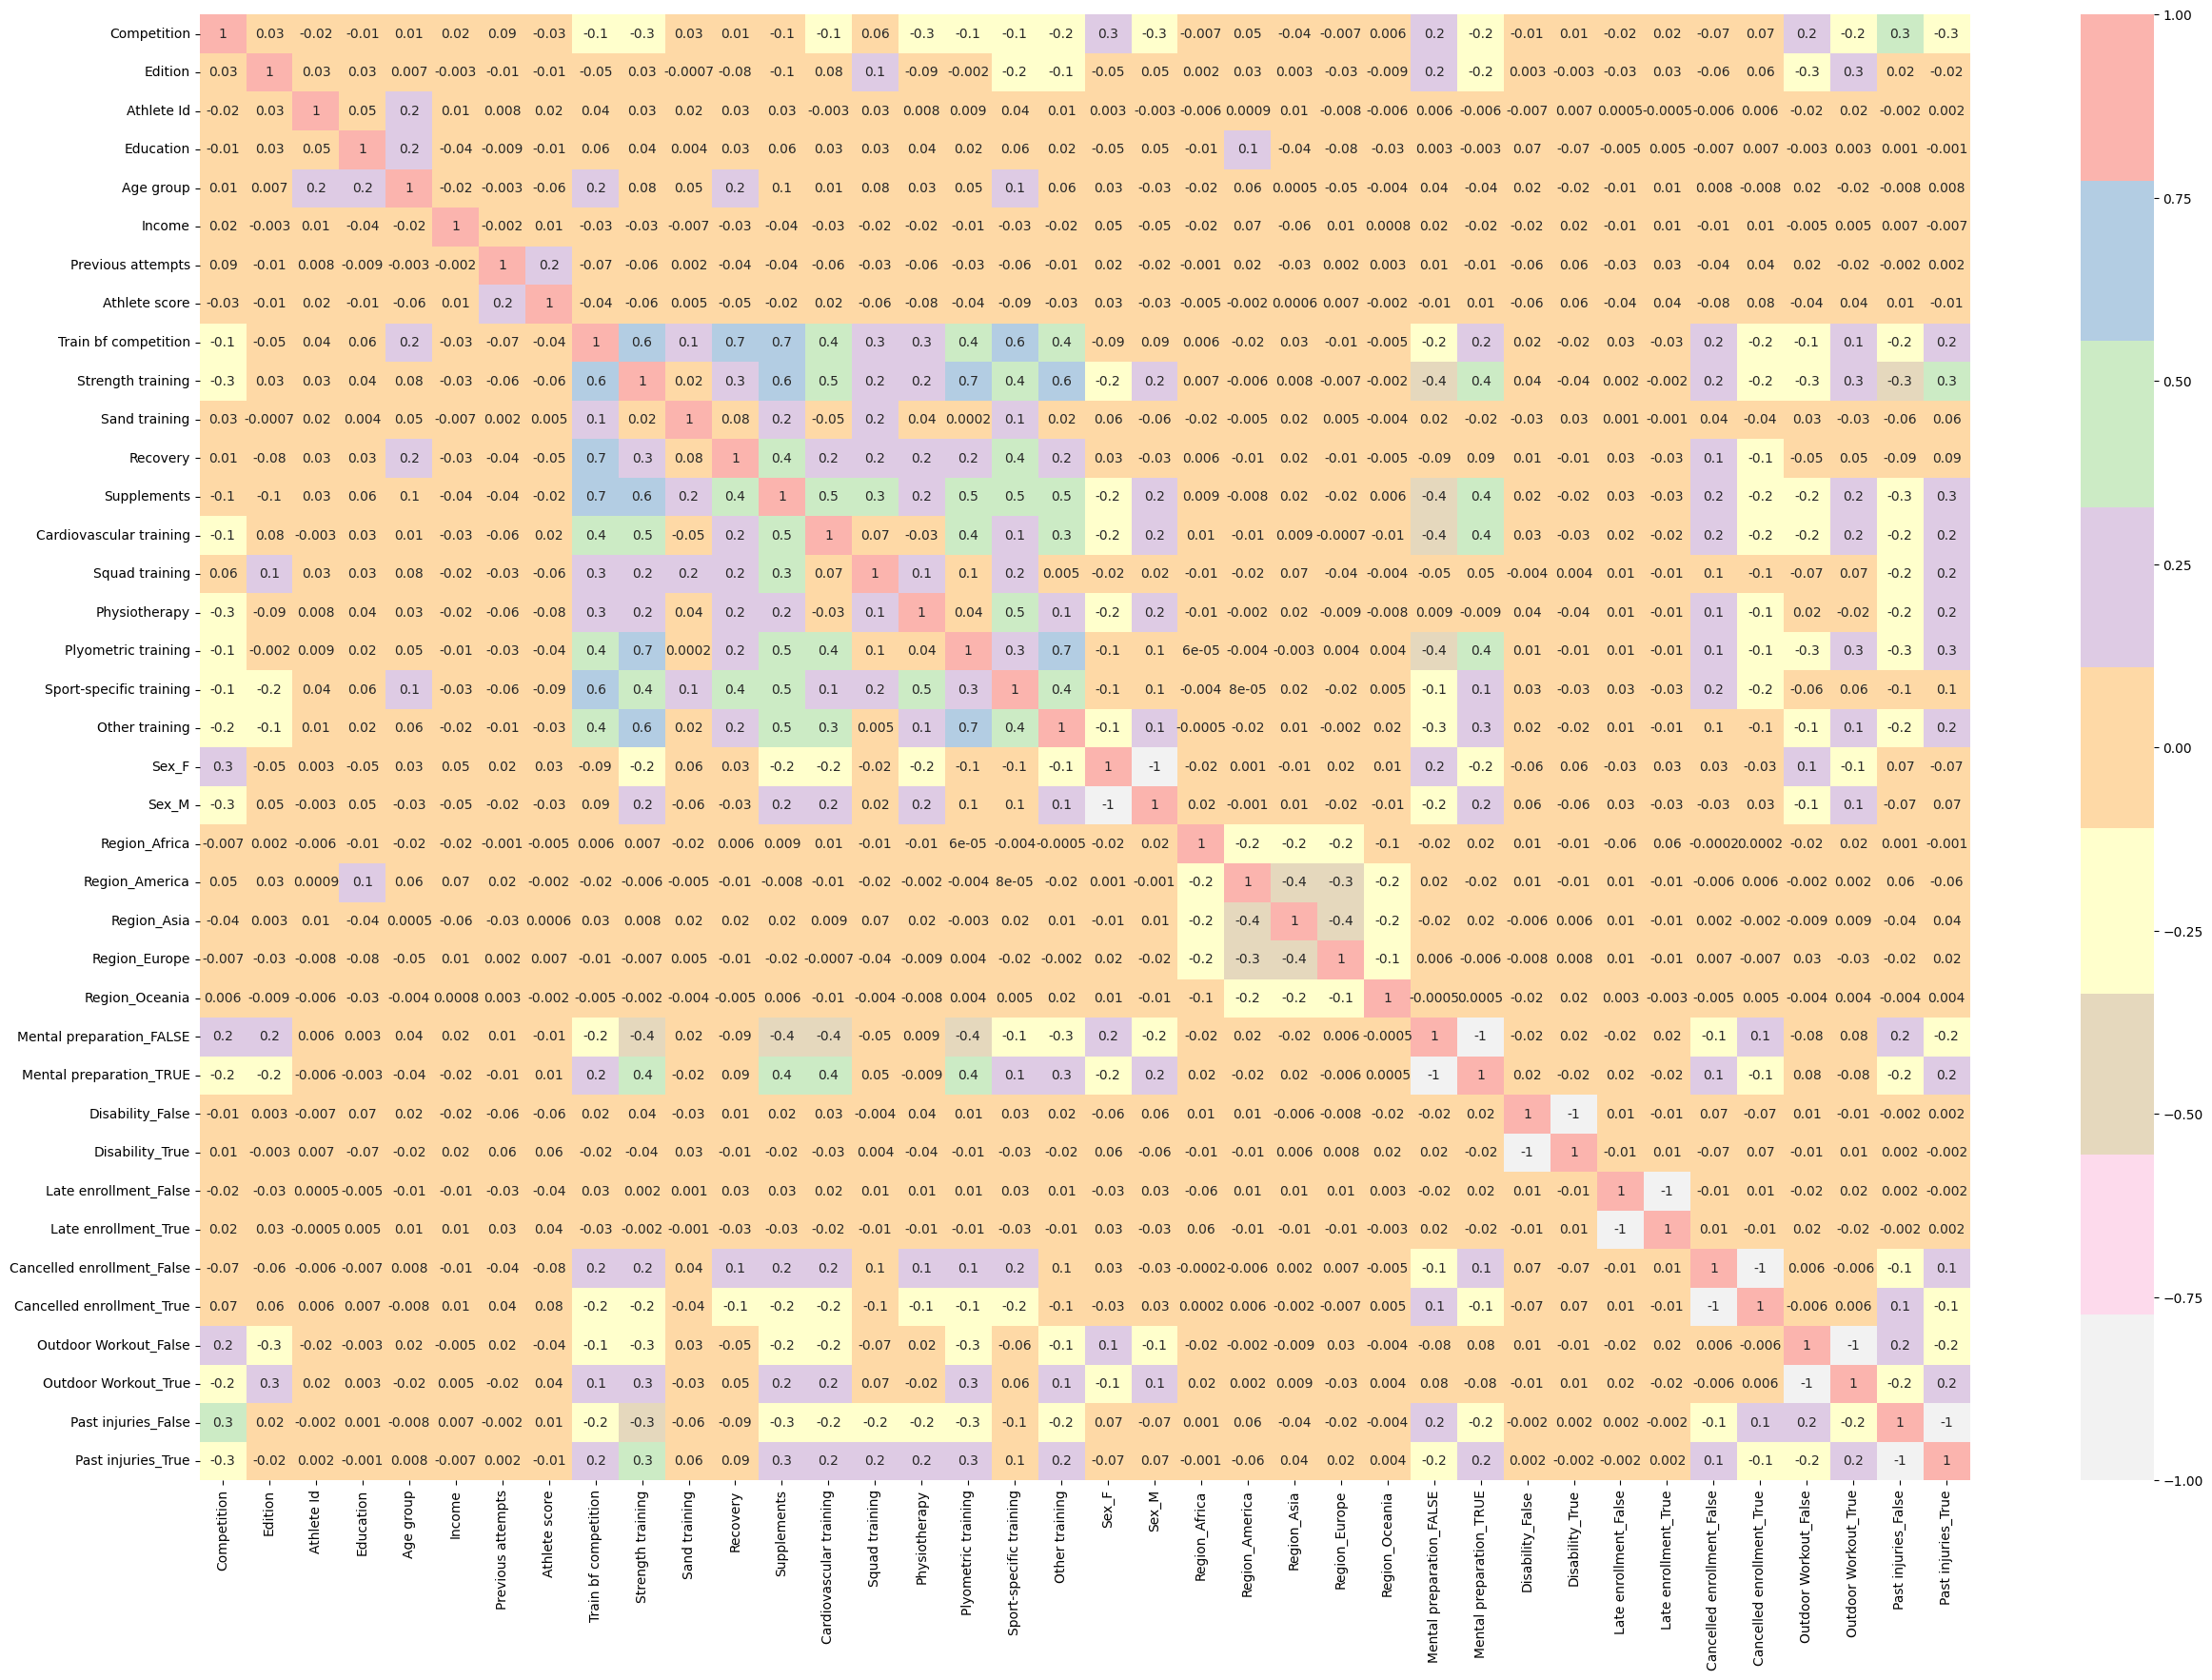

In [ ]:
#Check Correlations between numerical variables 
X_train_corr = X_train.copy()
corr = X_train_corr.corr()
figure = plt.figure(figsize=(30,20))
sns.heatmap(data = corr, annot=True, vmin=-1, vmax=1, center=0, cmap = plt.cm.Pastel1_r, fmt = '.1g') 

#### **5.6.2 Create New Variables**

##### **X_train**

In [ ]:
# we'd created a new variable to check the number of competitions each athlete had participated 
Athlete_Competitions = X_train.groupby('Athlete Id').size().reset_index(name='Total Competition Count')
X_train = X_train.merge(Athlete_Competitions, on='Athlete Id', how='left')
X_train.head(5)

Competition  Edition  Athlete Id  Education  Age group  Income  \
0            1     2020      269677          1          1       0   
1            3     2021      268301          4          1       0   
2            0     2022     2259662          2          0       2   
3            2     2021      505235          4          0       0   
4            3     2022      652572          1          1       2   

   Previous attempts  Athlete score  Train bf competition  Strength training  \
0                  1             60                    43                 95   
1                  0             15                   224                145   
2                  0              0                   278                528   
3                  0             30                    37                 33   
4                  0              0                   183                888   

   ...  Disability_True  Late enrollment_False  Late enrollment_True  \
0  ...                0                      1                     0   
1  ...                0                      1                     0   
2  ...                0                      1                     0   
3  ...                0                      1                     0   
4  ...                0                      1                     0   

   Cancelled enrollment_False  Cancelled enrollment_True  \
0                           1                          0   
1                           1                          0   
2                           1                          0   
3                           0                          1   
4                           1                          0   

   Outdoor Workout_False  Outdoor Workout_True  Past injuries_False  \
0                      1                     0                    1   
1                      1                     0                    1   
2                      1                     0                    1   
3                      1                     0                    1   
4                      1                     0                    0   

   Past injuries_True  Total Competition Count  
0                   0                        1  
1                   0                        1  
2                   0                        1  
3                   0                        1  
4                   1                        1  

[5 rows x 39 columns]

In [ ]:
# we'd created a new variable to check the number of training sessions that each athlete performed  
X_train['Total Number of Training Sessions'] = X_train ['Train bf competition'] + X_train ['Strength training'] + X_train ['Cardiovascular training'] + X_train ['Sport-specific training'] + X_train ['Sand training'] + X_train ['Squad training'] + X_train ['Plyometric training'] + X_train ['Other training']
X_train.head(3)

Competition  Edition  Athlete Id  Education  Age group  Income  \
0            1     2020      269677          1          1       0   
1            3     2021      268301          4          1       0   
2            0     2022     2259662          2          0       2   

   Previous attempts  Athlete score  Train bf competition  Strength training  \
0                  1             60                    43                 95   
1                  0             15                   224                145   
2                  0              0                   278                528   

   ...  Late enrollment_False  Late enrollment_True  \
0  ...                      1                     0   
1  ...                      1                     0   
2  ...                      1                     0   

   Cancelled enrollment_False  Cancelled enrollment_True  \
0                           1                          0   
1                           1                          0   
2                           1                          0   

   Outdoor Workout_False  Outdoor Workout_True  Past injuries_False  \
0                      1                     0                    1   
1                      1                     0                    1   
2                      1                     0                    1   

   Past injuries_True  Total Competition Count  \
0                   0                        1   
1                   0                        1   
2                   0                        1   

   Total Number of Training Sessions  
0                                225  
1                                477  
2                                899  

[3 rows x 40 columns]

##### **X_train_val**

In [ ]:
# we'd created a new variable to check the number of competitions each athlete had participated 
Athlete_Competitions = X_train_val.groupby('Athlete Id').size().reset_index(name='Total Competition Count')
X_train_val = X_train_val.merge(Athlete_Competitions, on='Athlete Id', how='left')
X_train_val.head(5)

Competition  Edition  Athlete Id  Education  Age group  Income  \
0            1     2020      390400          2          0       0   
1            1     2020      548938          1          1       4   
2            2     2022      653550          4          2       3   
3            2     2021      607130          2          0       0   
4            1     2021      344409          1          1       0   

   Previous attempts  Athlete score  Train bf competition  Strength training  \
0                  2             60                   615               1599   
1                  0              0                    79                178   
2                  0              0                   468                158   
3                  0             60                   734                754   
4                  0             30                   217                301   

   ...  Disability_True  Late enrollment_False  Late enrollment_True  \
0  ...                0                      1                     0   
1  ...                0                      1                     0   
2  ...                0                      1                     0   
3  ...                0                      1                     0   
4  ...                0                      1                     0   

   Cancelled enrollment_False  Cancelled enrollment_True  \
0                           1                          0   
1                           1                          0   
2                           1                          0   
3                           1                          0   
4                           1                          0   

   Outdoor Workout_False  Outdoor Workout_True  Past injuries_False  \
0                      1                     0                    0   
1                      1                     0                    0   
2                      1                     0                    0   
3                      1                     0                    0   
4                      1                     0                    0   

   Past injuries_True  Total Competition Count  
0                   1                        1  
1                   1                        1  
2                   1                        1  
3                   1                        1  
4                   1                        1  

[5 rows x 39 columns]

In [ ]:
# we'd created a new variable to check the number of training sessions that each athlete performed  
X_train_val['Total Number of Training Sessions'] = X_train_val ['Train bf competition'] + X_train_val ['Strength training'] + X_train_val ['Cardiovascular training'] + X_train_val ['Sport-specific training'] + X_train_val ['Sand training'] + X_train_val ['Squad training'] + X_train_val ['Plyometric training'] + X_train_val ['Other training']
X_train_val.head(5)

Competition  Edition  Athlete Id  Education  Age group  Income  \
0            1     2020      390400          2          0       0   
1            1     2020      548938          1          1       4   
2            2     2022      653550          4          2       3   
3            2     2021      607130          2          0       0   
4            1     2021      344409          1          1       0   

   Previous attempts  Athlete score  Train bf competition  Strength training  \
0                  2             60                   615               1599   
1                  0              0                    79                178   
2                  0              0                   468                158   
3                  0             60                   734                754   
4                  0             30                   217                301   

   ...  Late enrollment_False  Late enrollment_True  \
0  ...                      1                     0   
1  ...                      1                     0   
2  ...                      1                     0   
3  ...                      1                     0   
4  ...                      1                     0   

   Cancelled enrollment_False  Cancelled enrollment_True  \
0                           1                          0   
1                           1                          0   
2                           1                          0   
3                           1                          0   
4                           1                          0   

   Outdoor Workout_False  Outdoor Workout_True  Past injuries_False  \
0                      1                     0                    0   
1                      1                     0                    0   
2                      1                     0                    0   
3                      1                     0                    0   
4                      1                     0                    0   

   Past injuries_True  Total Competition Count  \
0                   1                        1   
1                   1                        1   
2                   1                        1   
3                   1                        1   
4                   1                        1   

   Total Number of Training Sessions  
0                               3270  
1                                304  
2                                760  
3                               1697  
4                                885  

[5 rows x 40 columns]

### **5.7 Skewness**

#### **X_train**

In [ ]:
X_train.agg(['skew']).transpose()

skew
Competition                        -0.164008
Edition                            -0.233284
Athlete Id                          2.443297
Education                           1.070584
Age group                           1.044776
Income                              0.334820
Previous attempts                   3.300419
Athlete score                       1.420354
Train bf competition                2.626044
Strength training                   2.403943
Sand training                      14.085841
Recovery                            4.730285
Supplements                         2.022794
Cardiovascular training             3.132798
Squad training                      4.545387
Physiotherapy                       4.306779
Plyometric training                 3.770888
Sport-specific training             2.906542
Other training                      4.189044
Sex_F                               0.210934
Sex_M                              -0.210934
Region_Africa                       2.301091
Region_America                      1.022083
Region_Asia                         0.845918
Region_Europe                       1.238247
Region_Oceania                      3.604248
Mental preparation_FALSE           -3.188240
Mental preparation_TRUE             3.188240
Disability_False                   -2.805748
Disability_True                     2.805748
Late enrollment_False             -11.231828
Late enrollment_True               11.231828
Cancelled enrollment_False         -1.620633
Cancelled enrollment_True           1.620633
Outdoor Workout_False              -3.477669
Outdoor Workout_True                3.477669
Past injuries_False                 0.200827
Past injuries_True                 -0.200827
Total Competition Count             2.821828
Total Number of Training Sessions   2.076394

In [ ]:
# Create copy of dataset to perform scaling & transformation

X_train_trans = X_train.copy()

In [ ]:
columns_to_transform = ['Train bf competition', 'Strength training', 'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training',
                        'Squad training', 'Physiotherapy', 'Plyometric training', 'Sport-specific training', 'Other training', 'Total Competition Count', 'Total Number of Training Sessions']

for column in columns_to_transform:
    X_train_trans[column+'_log'] = np.log(X_train[column] + 1)


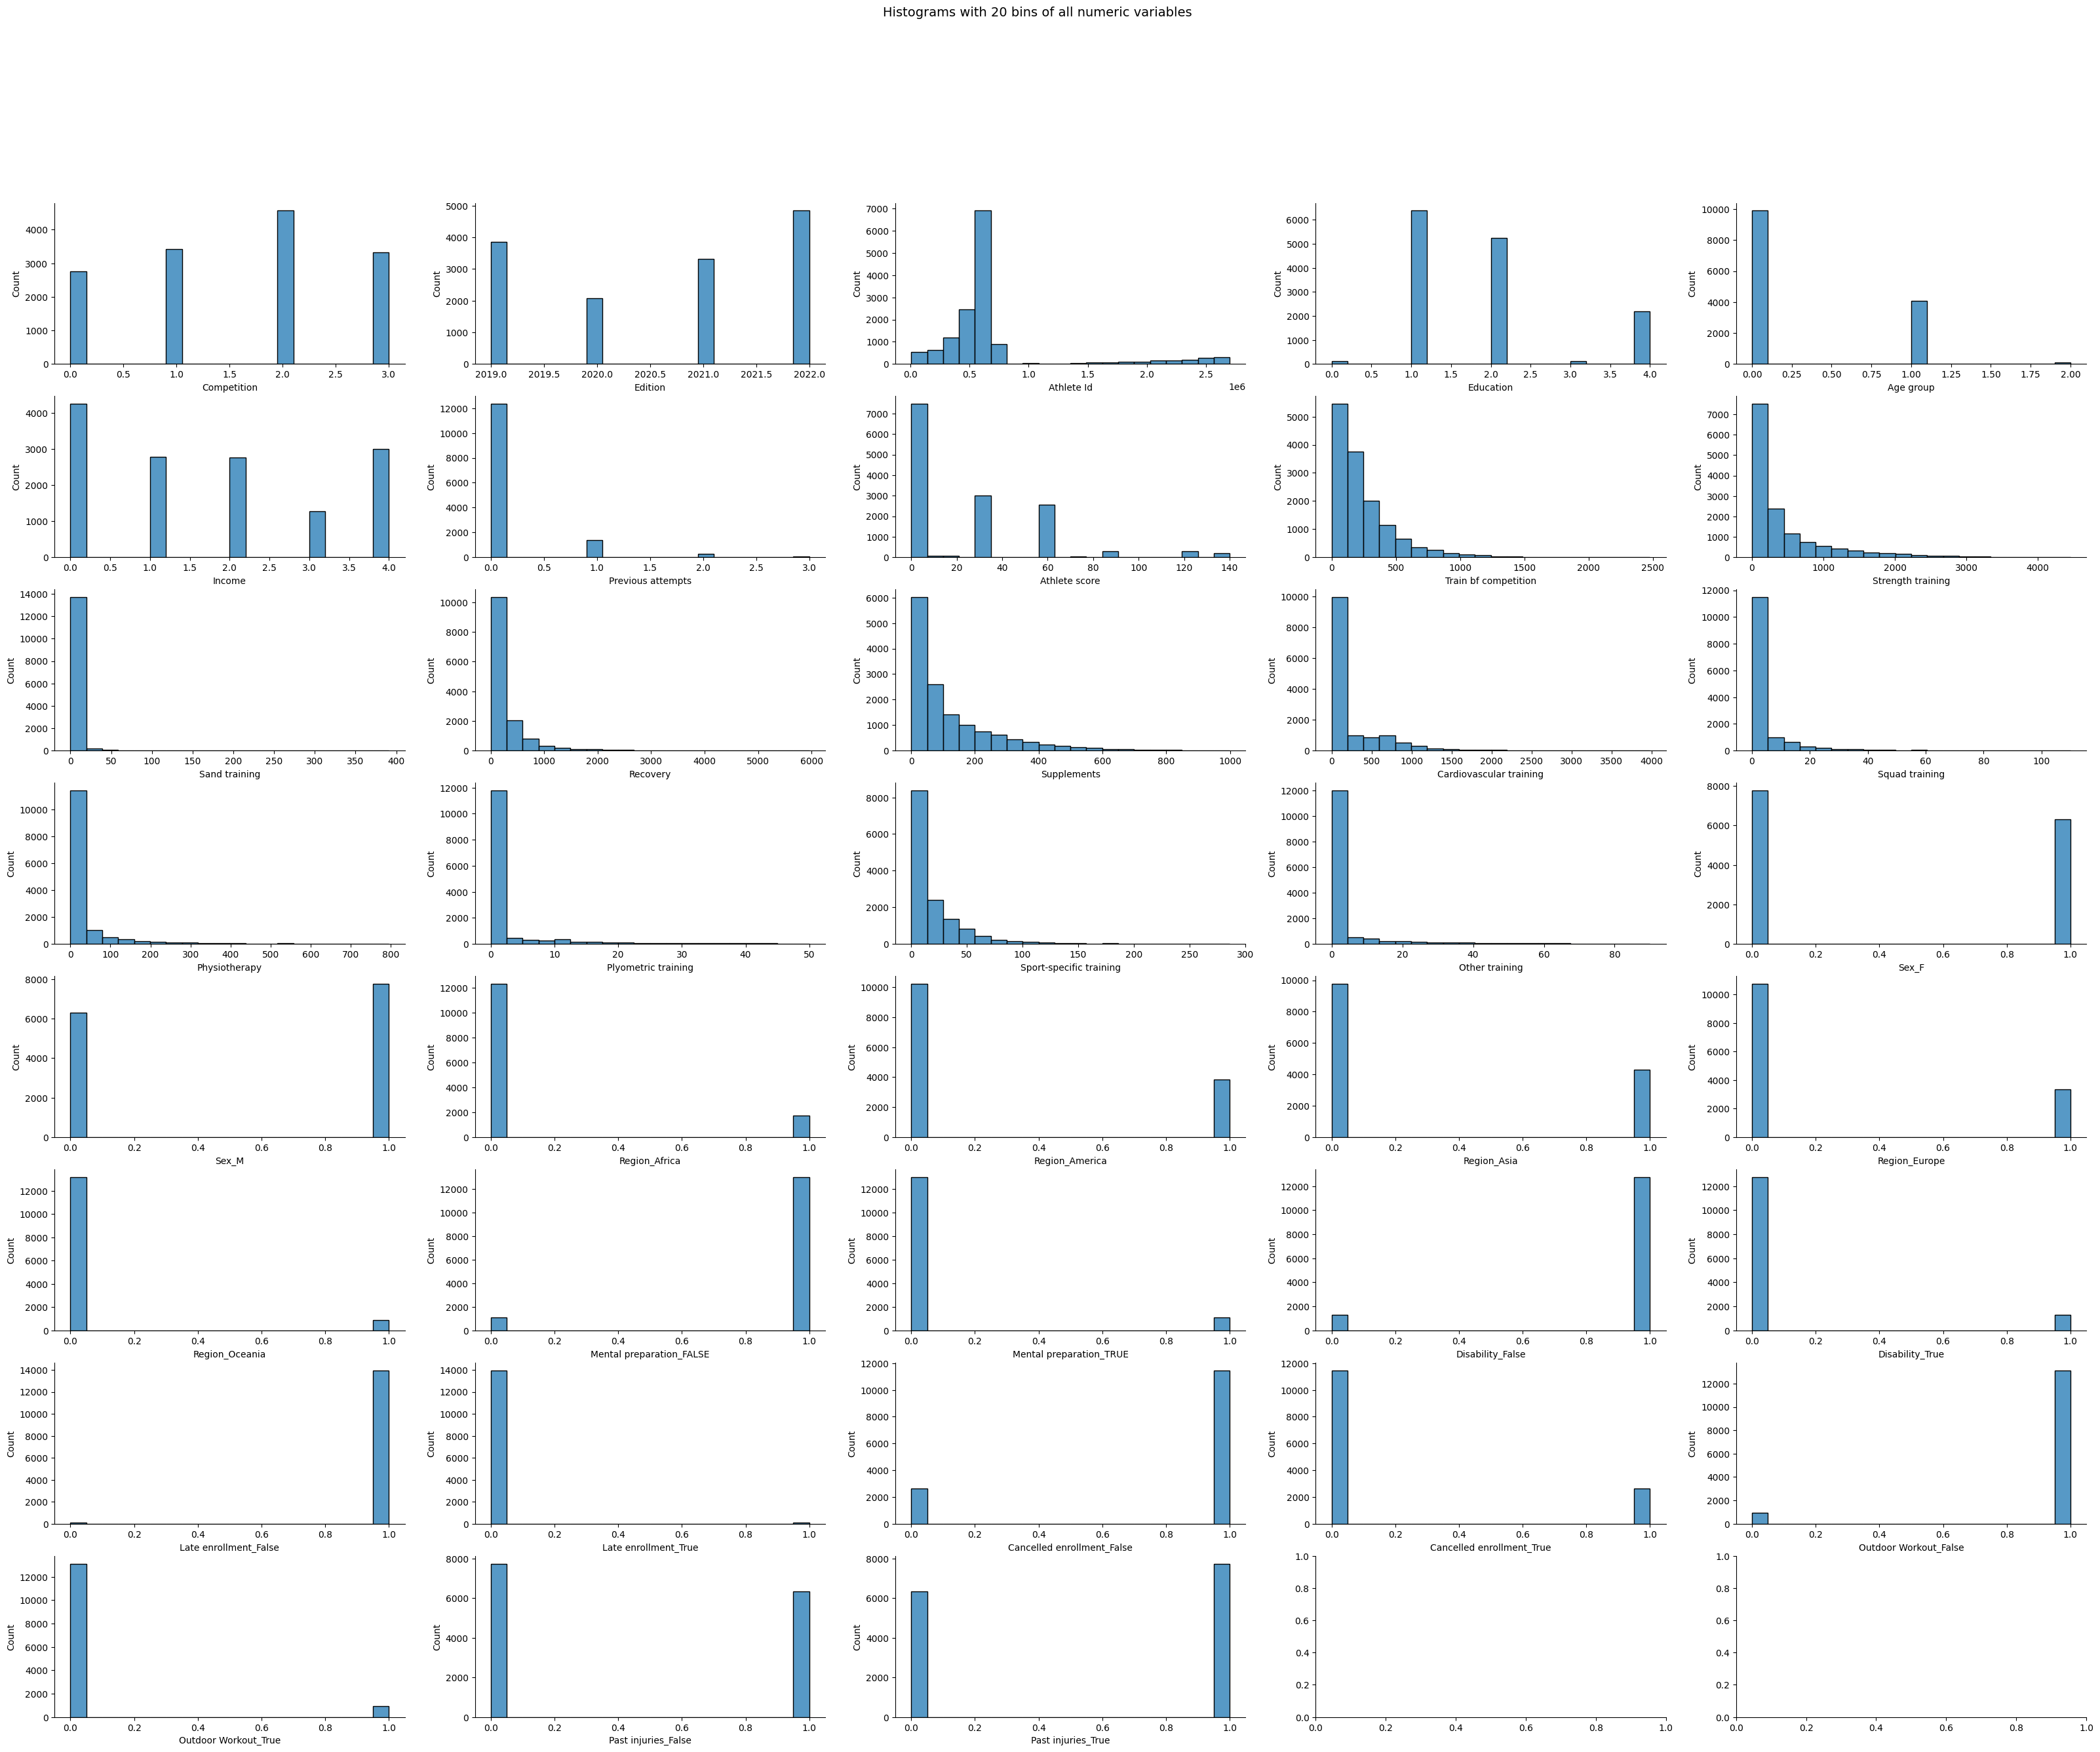

In [ ]:
 # Draw
fig, ax = plt.subplots(8, 5, figsize=(40,30))
for var, subplot in zip(X_train_trans[numerical], ax.flatten()):
    g = sns.histplot(data=X_train,
                bins=20,
                 x=var,
                 ax=subplot,
                 kde=False)

 #Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Histograms with 20 bins of all numeric variables", fontsize=plots_Title_fontSize);

In [ ]:
X_train_trans.agg(['skew']).transpose()

skew
Competition                            -0.164008
Edition                                -0.233284
Athlete Id                              2.443297
Education                               1.070584
Age group                               1.044776
Income                                  0.334820
Previous attempts                       3.300419
Athlete score                           1.420354
Train bf competition                    2.626044
Strength training                       2.403943
Sand training                          14.085841
Recovery                                4.730285
Supplements                             2.022794
Cardiovascular training                 3.132798
Squad training                          4.545387
Physiotherapy                           4.306779
Plyometric training                     3.770888
Sport-specific training                 2.906542
Other training                          4.189044
Sex_F                                   0.210934
Sex_M                                  -0.210934
Region_Africa                           2.301091
Region_America                          1.022083
Region_Asia                             0.845918
Region_Europe                           1.238247
Region_Oceania                          3.604248
Mental preparation_FALSE               -3.188240
Mental preparation_TRUE                 3.188240
Disability_False                       -2.805748
Disability_True                         2.805748
Late enrollment_False                 -11.231828
Late enrollment_True                   11.231828
Cancelled enrollment_False             -1.620633
Cancelled enrollment_True               1.620633
Outdoor Workout_False                  -3.477669
Outdoor Workout_True                    3.477669
Past injuries_False                     0.200827
Past injuries_True                     -0.200827
Total Competition Count                 2.821828
Total Number of Training Sessions       2.076394
Train bf competition_log               -0.564906
Strength training_log                  -0.516328
Sand training_log                       2.631890
Recovery_log                           -0.738867
Supplements_log                        -0.445607
Cardiovascular training_log            -0.510507
Squad training_log                      1.299061
Physiotherapy_log                       0.943054
Plyometric training_log                 2.161512
Sport-specific training_log            -0.176883
Other training_log                      1.966925
Total Competition Count_log             2.722107
Total Number of Training Sessions_log  -0.567602

In [ ]:
# drop non transformed variables
X_train_trans.drop(['Train bf competition', 'Strength training', 'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training',
                        'Squad training', 'Physiotherapy', 'Plyometric training', 'Sport-specific training', 'Other training', 'Total Competition Count', 'Total Number of Training Sessions'], axis=1, inplace = True)

In [ ]:
X_train_trans

Competition  Edition  Athlete Id  Education  Age group  Income  \
0                1     2020      269677          1          1       0   
1                3     2021      268301          4          1       0   
2                0     2022     2259662          2          0       2   
3                2     2021      505235          4          0       0   
4                3     2022      652572          1          1       2   
...            ...      ...         ...        ...        ...     ...   
14069            2     2022      557389          4          0       0   
14070            3     2022      641992          1          1       4   
14071            2     2019      494728          2          0       4   
14072            0     2022      656756          2          1       4   
14073            3     2020       39655          2          0       2   

       Previous attempts  Athlete score  Sex_F  Sex_M  ...  Recovery_log  \
0                      1             60      0      1  ...      3.970292   
1                      0             15      0      1  ...      5.902633   
2                      0              0      0      1  ...      4.736198   
3                      0             30      0      1  ...      1.791759   
4                      0              0      1      0  ...      5.416100   
...                  ...            ...    ...    ...  ...           ...   
14069                  0              0      1      0  ...      8.196437   
14070                  0              0      1      0  ...      4.430817   
14071                  1              0      0      1  ...      3.218876   
14072                  0             30      1      0  ...      5.429346   
14073                  0             60      1      0  ...      5.030438   

       Supplements_log  Cardiovascular training_log  Squad training_log  \
0             3.871201                     4.330733            0.000000   
1             4.744932                     4.430817            0.693147   
2             2.639057                     4.189655            0.693147   
3             4.025352                     3.951244            0.693147   
4             3.610918                     4.948760            3.401197   
...                ...                          ...                 ...   
14069         5.476464                     2.302585            4.418841   
14070         4.060443                     4.564348            0.693147   
14071         3.135494                     1.098612            0.000000   
14072         4.532599                     5.605802            0.000000   
14073         3.367296                     4.532599            0.000000   

       Physiotherapy_log  Plyometric training_log  \
0               0.693147                      0.0   
1               0.000000                      0.0   
2               5.105945                      0.0   
3               0.000000                      0.0   
4               0.000000                      0.0   
...                  ...                      ...   
14069           0.000000                      0.0   
14070           0.000000                      0.0   
14071           2.708050                      0.0   
14072           0.000000                      0.0   
14073           0.000000                      0.0   

       Sport-specific training_log  Other training_log  \
0                         1.791759            2.079442   
1                         3.218876            0.000000   
2                         3.332205            0.000000   
3                         1.945910            0.000000   
4                         0.000000            0.000000   
...                            ...                 ...   
14069                     3.401197            0.000000   
14070                     1.791759            0.000000   
14071                     2.197225            0.000000   
14072                     0.000000            0.000000   
14073                     2.708050       

#### **X_train_val**

In [ ]:
X_train_val.agg(['skew']).transpose()

skew
Competition                        -0.162804
Edition                            -0.235579
Athlete Id                          2.502060
Education                           1.076306
Age group                           1.028346
Income                              0.338208
Previous attempts                   3.377057
Athlete score                       1.438321
Train bf competition                2.859245
Strength training                   2.292082
Sand training                      15.050579
Recovery                            4.840360
Supplements                         1.976054
Cardiovascular training             3.187723
Squad training                      5.312554
Physiotherapy                       4.261835
Plyometric training                 4.150904
Sport-specific training             3.188122
Other training                      4.586711
Sex_F                               0.179097
Sex_M                              -0.179097
Region_Africa                       2.388789
Region_America                      1.079231
Region_Asia                         0.852114
Region_Europe                       1.189689
Region_Oceania                      3.309561
Mental preparation_FALSE           -3.520435
Mental preparation_TRUE             3.520435
Disability_False                   -2.848350
Disability_True                     2.848350
Late enrollment_False             -10.700753
Late enrollment_True               10.700753
Cancelled enrollment_False         -1.636738
Cancelled enrollment_True           1.636738
Outdoor Workout_False              -3.607587
Outdoor Workout_True                3.607587
Past injuries_False                 0.163015
Past injuries_True                 -0.163015
Total Competition Count             6.595520
Total Number of Training Sessions   1.996046

In [ ]:
# Create copy of dataset to perform scaling & transformation

X_train_val_trans = X_train_val.copy()

In [ ]:
columns_to_transform = ['Train bf competition', 'Strength training', 'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training',
                        'Squad training', 'Physiotherapy', 'Plyometric training', 'Sport-specific training', 'Other training', 'Total Competition Count', 'Total Number of Training Sessions']

for column in columns_to_transform:
    X_train_val_trans[column+'_log'] = np.log( X_train_val_trans[column] + 1)


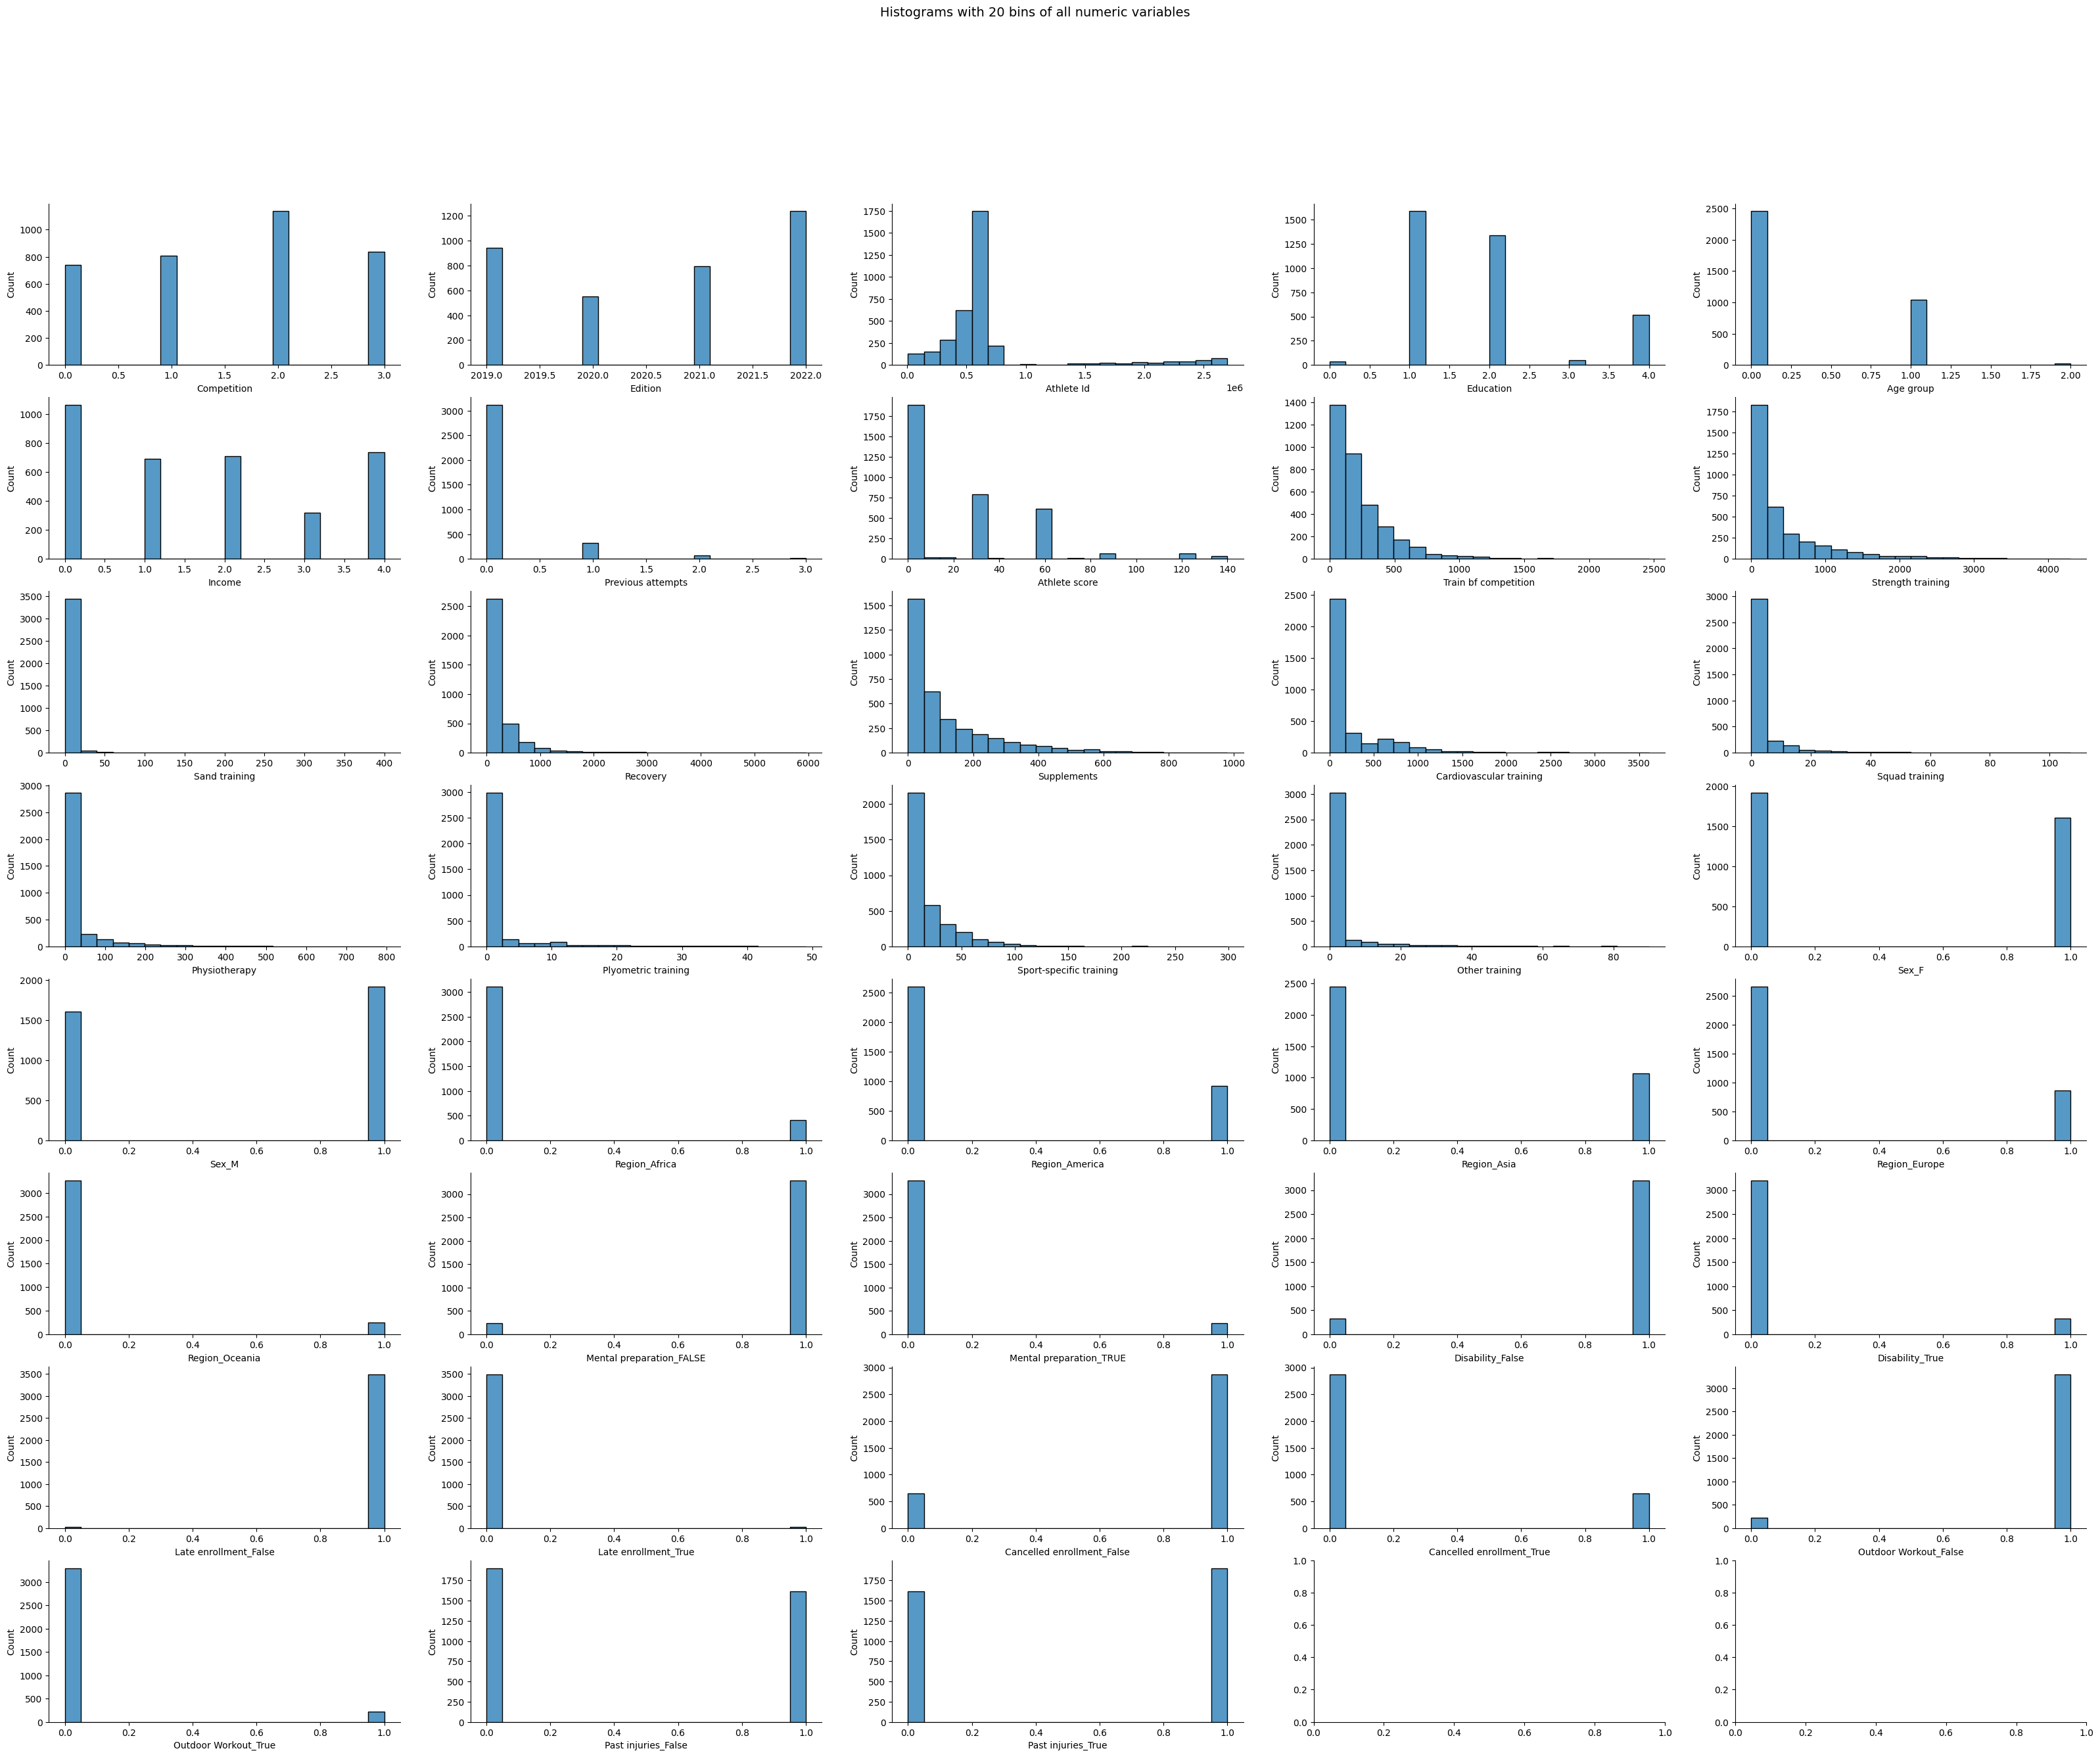

In [ ]:
 # Draw
fig, ax = plt.subplots(8, 5, figsize=(40,30))
for var, subplot in zip(X_train_val_trans[numerical], ax.flatten()):
    g = sns.histplot(data=X_train_val_trans,
                bins=20,
                 x=var,
                 ax=subplot,
                 kde=False)

 #Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Histograms with 20 bins of all numeric variables", fontsize=plots_Title_fontSize);

In [ ]:
X_train_val_trans.agg(['skew']).transpose()

skew
Competition                            -0.162804
Edition                                -0.235579
Athlete Id                              2.502060
Education                               1.076306
Age group                               1.028346
Income                                  0.338208
Previous attempts                       3.377057
Athlete score                           1.438321
Train bf competition                    2.859245
Strength training                       2.292082
Sand training                          15.050579
Recovery                                4.840360
Supplements                             1.976054
Cardiovascular training                 3.187723
Squad training                          5.312554
Physiotherapy                           4.261835
Plyometric training                     4.150904
Sport-specific training                 3.188122
Other training                          4.586711
Sex_F                                   0.179097
Sex_M                                  -0.179097
Region_Africa                           2.388789
Region_America                          1.079231
Region_Asia                             0.852114
Region_Europe                           1.189689
Region_Oceania                          3.309561
Mental preparation_FALSE               -3.520435
Mental preparation_TRUE                 3.520435
Disability_False                       -2.848350
Disability_True                         2.848350
Late enrollment_False                 -10.700753
Late enrollment_True                   10.700753
Cancelled enrollment_False             -1.636738
Cancelled enrollment_True               1.636738
Outdoor Workout_False                  -3.607587
Outdoor Workout_True                    3.607587
Past injuries_False                     0.163015
Past injuries_True                     -0.163015
Total Competition Count                 6.595520
Total Number of Training Sessions       1.996046
Train bf competition_log               -0.564134
Strength training_log                  -0.610273
Sand training_log                       2.722323
Recovery_log                           -0.689271
Supplements_log                        -0.418107
Cardiovascular training_log            -0.525653
Squad training_log                      1.388407
Physiotherapy_log                       0.988321
Plyometric training_log                 2.303514
Sport-specific training_log            -0.129991
Other training_log                      2.049468
Total Competition Count_log             6.347301
Total Number of Training Sessions_log  -0.651493

In [ ]:
# drop non transformed variables
X_train_val_trans.drop(['Train bf competition', 'Strength training', 'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training',
                        'Squad training', 'Physiotherapy', 'Plyometric training', 'Sport-specific training', 'Other training', 'Total Competition Count', 'Total Number of Training Sessions'], axis=1, inplace = True)

In [ ]:
X_train_val_trans

Competition  Edition  Athlete Id  Education  Age group  Income  \
0               1     2020      390400          2          0       0   
1               1     2020      548938          1          1       4   
2               2     2022      653550          4          2       3   
3               2     2021      607130          2          0       0   
4               1     2021      344409          1          1       0   
...           ...      ...         ...        ...        ...     ...   
3517            3     2020      242149          2          0       1   
3518            0     2022      593987          1          1       3   
3519            3     2019      272617          2          0       4   
3520            2     2021      614345          2          0       1   
3521            1     2019      596125          2          0       2   

      Previous attempts  Athlete score  Sex_F  Sex_M  ...  Recovery_log  \
0                     2             60      0      1  ...      6.008813   
1                     0              0      0      1  ...      4.510860   
2                     0              0      0      1  ...      6.167516   
3                     0             60      0      1  ...      6.267201   
4                     0             30      0      1  ...      5.170484   
...                 ...            ...    ...    ...  ...           ...   
3517                  0            120      1      0  ...      4.983607   
3518                  0            120      1      0  ...      4.919981   
3519                  2              0      1      0  ...      0.000000   
3520                  0              0      1      0  ...      0.000000   
3521                  0             60      0      1  ...      3.784190   

      Supplements_log  Cardiovascular training_log  Squad training_log  \
0            5.971262                     6.896694            0.000000   
1            4.204693                     3.135494            0.000000   
2            5.220356                     2.484907            4.060443   
3            6.591674                     3.332205            3.044522   
4            5.062595                     5.831882            2.564949   
...               ...                          ...                 ...   
3517         2.772589                     3.583519            0.000000   
3518         4.718499                     0.000000            0.000000   
3519         0.693147                     2.708050            0.000000   
3520         2.564949                     5.241747            0.000000   
3521         4.465908                     5.181784            0.000000   

      Physiotherapy_log  Plyometric training_log  Sport-specific training_log  \
0              3.178054                 2.833213                     3.663562   
1              0.693147                 0.000000                     1.609438   
2              0.000000                 0.000000                     4.204693   
3              4.248495                 0.000000                     4.882802   
4              2.079442                 0.000000                     2.772589   
...                 ...                      ...                          ...   
3517           0.000000                 0.000000                     1.791759   
3518           0.000000                 0.000000                     1.386294   
3519           0.000000                 0.000000                     0.000000   
3520           0.000000                 0.000000                     0.693147   
3521           2.197225                 2.079442                     1.386294   

      Other training_log  Total Competition Count_log  \
0               2.708050                     0.693147   
1               3.091042                     0.693147   
2               0.000000                     0.693147   
3               0.000000                     0.693147   
4               0.000000                     0.693147   
...                  ...            

### **5.8 Scaling**

#### **X_train**

In [ ]:
scaler = RobustScaler()

X_train_scaled = X_train_trans.copy()
columns_to_scale = ['Previous attempts', 'Athlete score', 'Train bf competition_log', 'Strength training_log', 'Sand training_log',
                    'Recovery_log', 'Supplements_log', 'Cardiovascular training_log', 'Squad training_log', 'Physiotherapy_log', 'Plyometric training_log',
                    'Sport-specific training_log', 'Other training_log', 'Total Competition Count_log', 'Total Number of Training Sessions_log']
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train_scaled[columns_to_scale])

print(X_train_scaled)


       Competition  Edition  Athlete Id  Education  Age group  Income  \
0                1     2020      269677          1          1       0   
1                3     2021      268301          4          1       0   
2                0     2022     2259662          2          0       2   
3                2     2021      505235          4          0       0   
4                3     2022      652572          1          1       2   
...            ...      ...         ...        ...        ...     ...   
14069            2     2022      557389          4          0       0   
14070            3     2022      641992          1          1       4   
14071            2     2019      494728          2          0       4   
14072            0     2022      656756          2          1       4   
14073            3     2020       39655          2          0       2   

       Previous attempts  Athlete score  Sex_F  Sex_M  ...  Recovery_log  \
0                    1.0            2.0      0 

#### **X_train_val**

In [ ]:
scaler = RobustScaler()

X_train_val_scaled = X_train_val_trans .copy()
columns_to_scale = ['Previous attempts', 'Athlete score', 'Train bf competition_log', 'Strength training_log', 'Sand training_log',
                    'Recovery_log', 'Supplements_log', 'Cardiovascular training_log', 'Squad training_log', 'Physiotherapy_log', 'Plyometric training_log',
                    'Sport-specific training_log', 'Other training_log', 'Total Competition Count_log', 'Total Number of Training Sessions_log']
X_train_val_scaled[columns_to_scale] = scaler.fit_transform(X_train_val_scaled[columns_to_scale])

print(X_train_val_scaled)


      Competition  Edition  Athlete Id  Education  Age group  Income  \
0               1     2020      390400          2          0       0   
1               1     2020      548938          1          1       4   
2               2     2022      653550          4          2       3   
3               2     2021      607130          2          0       0   
4               1     2021      344409          1          1       0   
...           ...      ...         ...        ...        ...     ...   
3517            3     2020      242149          2          0       1   
3518            0     2022      593987          1          1       3   
3519            3     2019      272617          2          0       4   
3520            2     2021      614345          2          0       1   
3521            1     2019      596125          2          0       2   

      Previous attempts  Athlete score  Sex_F  Sex_M  ...  Recovery_log  \
0                   2.0            2.0      0      1  ...   

In [ ]:
X_train_scaled.to_excel(r'/content/drive/MyDrive/Colab Notebooks/Project/X_train_prep.xlsx', index = False)

In [ ]:
X_train_val_scaled.to_excel(r'/content/drive/MyDrive/Colab Notebooks/Project/X_train_val_prep.xlsx', index = False)

##<font color='#81D8D0'> 6. Feature Selection

In [ ]:
X_train = X_train_scaled.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


Before going for the more advanced method to handle the feature selection, we will start by eliminating non-related features to our model. The elimination will be based on the No suggestions definitions provided in the project material:



---

*   Age group: Related
*   Athlete score: Related

*  Cancelled enrollment: Related 
*  Cardiovascular training: Related 


*  Competition: Related 
*  Disability: Related


*  Edition: Not related
*  Education: Related


*   Income: Related
*   Late enrollment: Not Related


*   Mental preparation: Related
*   No coach: Related


*   Other training: Related
*   Outcome: Related -The target-


*   Outdoor workout: Related
*   Past Injuries: Related



*   Physiotherapy: Related
*   Plyometric: Related 



*   Previous attempts: Not related 
*   RecordID: Not Relate


*   Recover: Related
*   Region: Not Related


*   Sand training: Related
*   Sex: Related


*   Sport-specific training: Related
*   Squad training: Related


*   Strength training: Related
*   Supplements: Related


*   Train bf competition: Related


The non-related features to predict the outcome will be dropped from the model.

Next, We will use the feature selections methods to prioritize the best features for our model. 


In [ ]:
# join X_train to y_train

X_y_train = X_train.join(y_train)


### **6.1 Pearson Correlation**

\In the next two techniques Pearson correlation & Spearman correlation will help to identify the positively correlated features to eliminate them from the model, as having too strongly correlated features is not good for the model. 

In [ ]:
cor_pearson = X_y_train.corr()
cor_pearson

Competition   Edition  Athlete Id  \
Competition                               1.000000  0.032033   -0.019868   
Edition                                   0.032033  1.000000    0.025187   
Athlete Id                               -0.019868  0.025187    1.000000   
Education                                -0.012529  0.025930    0.047824   
Age group                                 0.013022  0.007009    0.201168   
Income                                    0.024425 -0.002865    0.010463   
Previous attempts                         0.093728 -0.011241    0.007798   
Athlete score                            -0.032092 -0.010404    0.015797   
Sex_F                                     0.323159 -0.045688    0.003039   
Sex_M                                    -0.323159  0.045688   -0.003039   
Region_Africa                            -0.006752  0.002104   -0.005690   
Region_America                            0.049230  0.030149    0.000903   
Region_Asia                              -0.039195  0.002771    0.013386   
Region_Europe                            -0.007151 -0.030978   -0.007523   
Region_Oceania                            0.005711 -0.009150   -0.006188   
Mental preparation_FALSE                  0.163843  0.215731    0.006449   
Mental preparation_TRUE                  -0.163843 -0.215731   -0.006449   
Disability_False                         -0.011220  0.003000   -0.006658   
Disability_True                           0.011220 -0.003000    0.006658   
Late enrollment_False                    -0.016554 -0.030917    0.000523   
Late enrollment_True                      0.016554  0.030917   -0.000523   
Cancelled enrollment_False               -0.067444 -0.062753   -0.006080   
Cancelled enrollment_True                 0.067444  0.062753    0.006080   
Outdoor Workout_False                     0.151165 -0.297159   -0.016982   
Outdoor Workout_True                     -0.151165  0.297159    0.016982   
Past injuries_False                       0.333180  0.021920   -0.002308   
Past injuries_True                       -0.333180 -0.021920    0.002308   
Train bf competition_log                 -0.157176 -0.053813    0.036547   
Strength training_log                    -0.486106  0.063667    0.034347   
Sand training_log                         0.099368  0.031591    0.035608   
Recovery_log                             -0.069323 -0.173626    0.030295   
Supplements_log                          -0.063151 -0.080172    0.032193   
Cardiovascular training_log              -0.138091  0.060254   -0.024411   
Squad training_log                        0.023742  0.148223    0.029820   
Physiotherapy_log                        -0.339067 -0.204012    0.011525   
Plyometric training_log                  -0.115797  0.015955    0.009808   
Sport-specific training_log              -0.021395 -0.183910    0.030020   
Other training_log                       -0.258445 -0.214468    0.017056   
Total Competition Count_log              -0.033307  0.047999   -0.016023   
Total Number of Training Sessions_log    -0.324188  0.045085    0.027540   
Outcome                                  -0.081657 -0.012379    0.023557   

                                       Education  Age group    Income  \
Competition                            -0.012529   0.013022  0.024425   
Edition                                 0.025930   0.007009 -0.002865   
Athlete Id                              0.047824   0.201168  0.010463   
Education                               1.000000   0.167590 -0.040950   
Age group                               0.167590   1.000000 -0.019175   
Income                                 -0.040950  -0.019175  1.000000   
Previous attempts                      -0.008574  -0.003246 -0.002478   
Athlete score                          -0.012118  -0.058827  0.013358   
Sex_F                                  -0.051053   0.032747  0.047442   
Sex_M                                   0.051053  -0.032747 -0.047442   
Region_Africa                          -0.0

<Axes: >

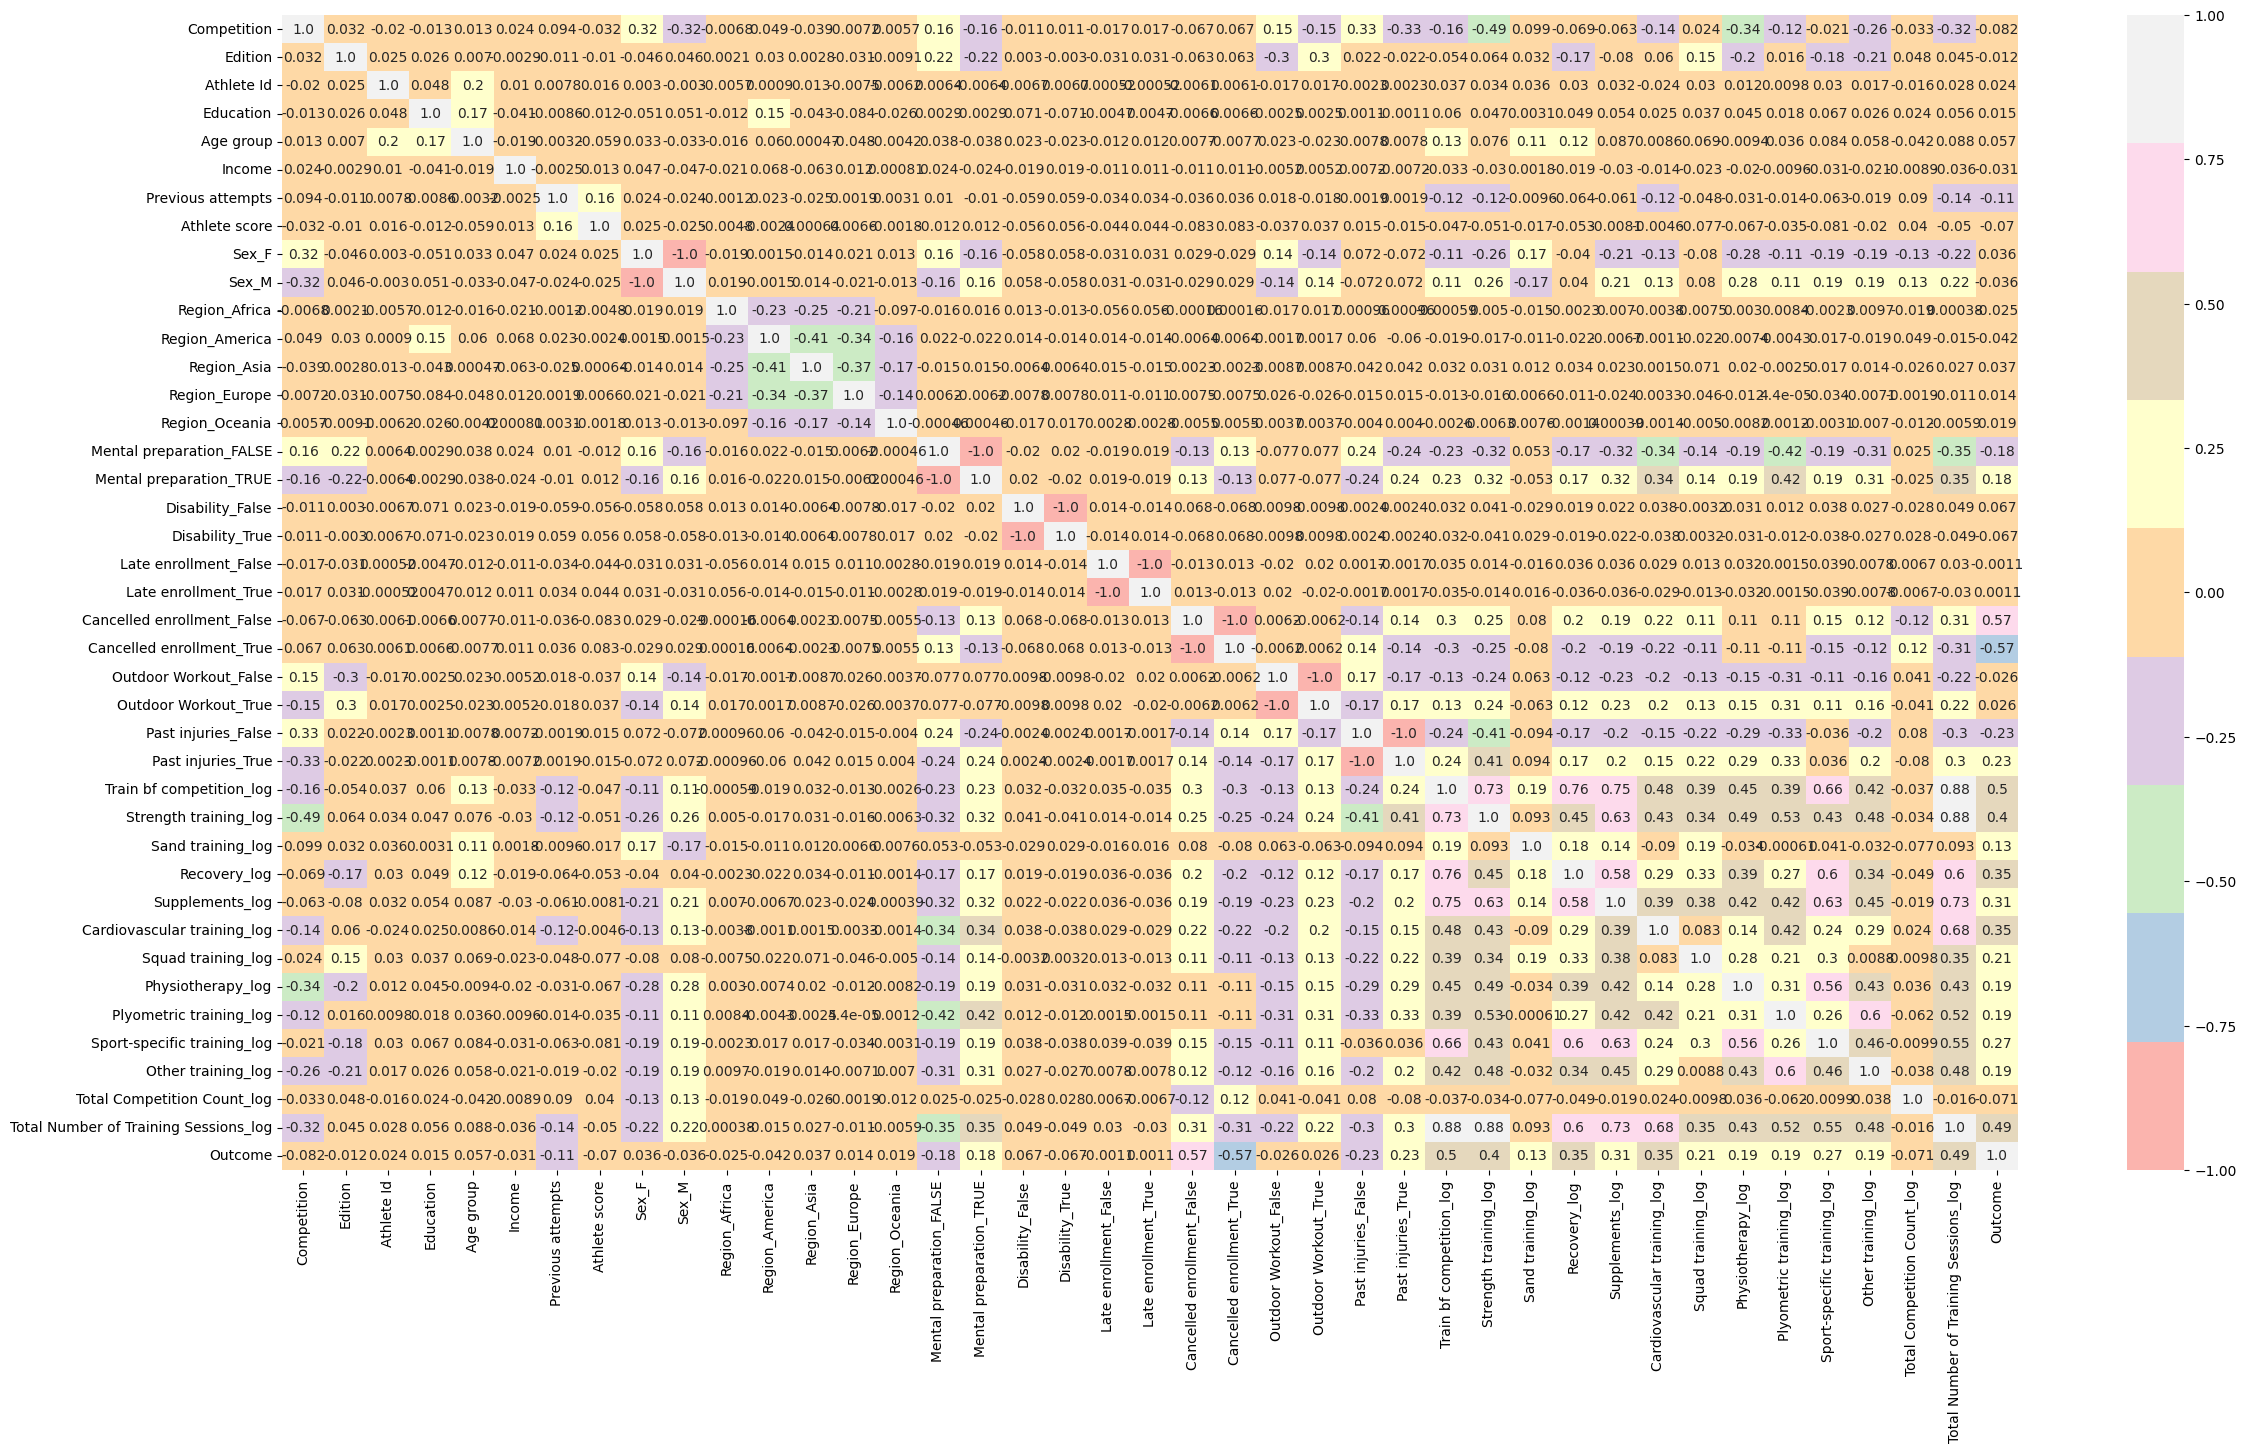

In [ ]:
plt.figure(figsize=(28,15))
sns.heatmap(data=cor_pearson, annot=True, cmap = plt.cm.Pastel1, fmt='.2')


The positively correlated features according to the Pearson method are - **Our threshold is above 0.7 **-:

- Strength training & Plyometric training: 0.71
- Train bf competition & Recovery: 0.74

### **6.2 Spearman Correlation**

In [ ]:
cor_spearman = X_y_train.corr(method ='spearman')
cor_spearman

Competition   Edition  Athlete Id  \
Competition                               1.000000  0.027815   -0.055757   
Edition                                   0.027815  1.000000    0.291102   
Athlete Id                               -0.055757  0.291102    1.000000   
Education                                -0.017632  0.016607    0.024430   
Age group                                 0.020331  0.008107    0.107526   
Income                                    0.028225 -0.002993    0.006209   
Previous attempts                         0.085196 -0.008134   -0.178109   
Athlete score                            -0.101070  0.001054   -0.003213   
Sex_F                                     0.343119 -0.045652   -0.005766   
Sex_M                                    -0.343119  0.045652    0.005766   
Region_Africa                            -0.008393  0.003685    0.012403   
Region_America                            0.048722  0.031287    0.006752   
Region_Asia                              -0.039470  0.002321    0.013038   
Region_Europe                            -0.005206 -0.032748   -0.024277   
Region_Oceania                            0.005976 -0.009420   -0.011367   
Mental preparation_FALSE                  0.187691  0.222092    0.024813   
Mental preparation_TRUE                  -0.187691 -0.222092   -0.024813   
Disability_False                         -0.010963  0.003643    0.015827   
Disability_True                           0.010963 -0.003643   -0.015827   
Late enrollment_False                    -0.018429 -0.031990   -0.012469   
Late enrollment_True                      0.018429  0.031990    0.012469   
Cancelled enrollment_False               -0.061592 -0.060914    0.008246   
Cancelled enrollment_True                 0.061592  0.060914   -0.008246   
Outdoor Workout_False                     0.173235 -0.314879   -0.146411   
Outdoor Workout_True                     -0.173235  0.314879    0.146411   
Past injuries_False                       0.342626  0.012195   -0.081307   
Past injuries_True                       -0.342626 -0.012195    0.081307   
Train bf competition_log                 -0.158307 -0.055125    0.000358   
Strength training_log                    -0.512219  0.070314    0.083526   
Sand training_log                         0.131689  0.031108    0.048831   
Recovery_log                             -0.064662 -0.163400   -0.049053   
Supplements_log                          -0.107821 -0.082242   -0.045529   
Cardiovascular training_log              -0.218704  0.082653    0.050563   
Squad training_log                       -0.010688  0.154459    0.123907   
Physiotherapy_log                        -0.372918 -0.218915   -0.041524   
Plyometric training_log                  -0.143897  0.029317    0.034295   
Sport-specific training_log              -0.068432 -0.190131   -0.075140   
Other training_log                       -0.305090 -0.241867   -0.117934   
Total Competition Count_log              -0.034713  0.043444   -0.027525   
Total Number of Training Sessions_log    -0.354856  0.057485    0.053948   
Outcome                                  -0.075660 -0.007621    0.047766   

                                       Education  Age group    Income  \
Competition                            -0.017632   0.020331  0.028225   
Edition                                 0.016607   0.008107 -0.002993   
Athlete Id                              0.024430   0.107526  0.006209   
Education                               1.000000   0.147380 -0.041837   
Age group                               0.147380   1.000000 -0.018145   
Income                                 -0.041837  -0.018145  1.000000   
Previous attempts                       0.005453  -0.003736  0.000861   
Athlete score                          -0.009801  -0.054227  0.011290   
Sex_F                                  -0.032992   0.040477  0.055480   
Sex_M                                   0.032992  -0.040477 -0.055480   
Region_Africa                           0.0

<Axes: >

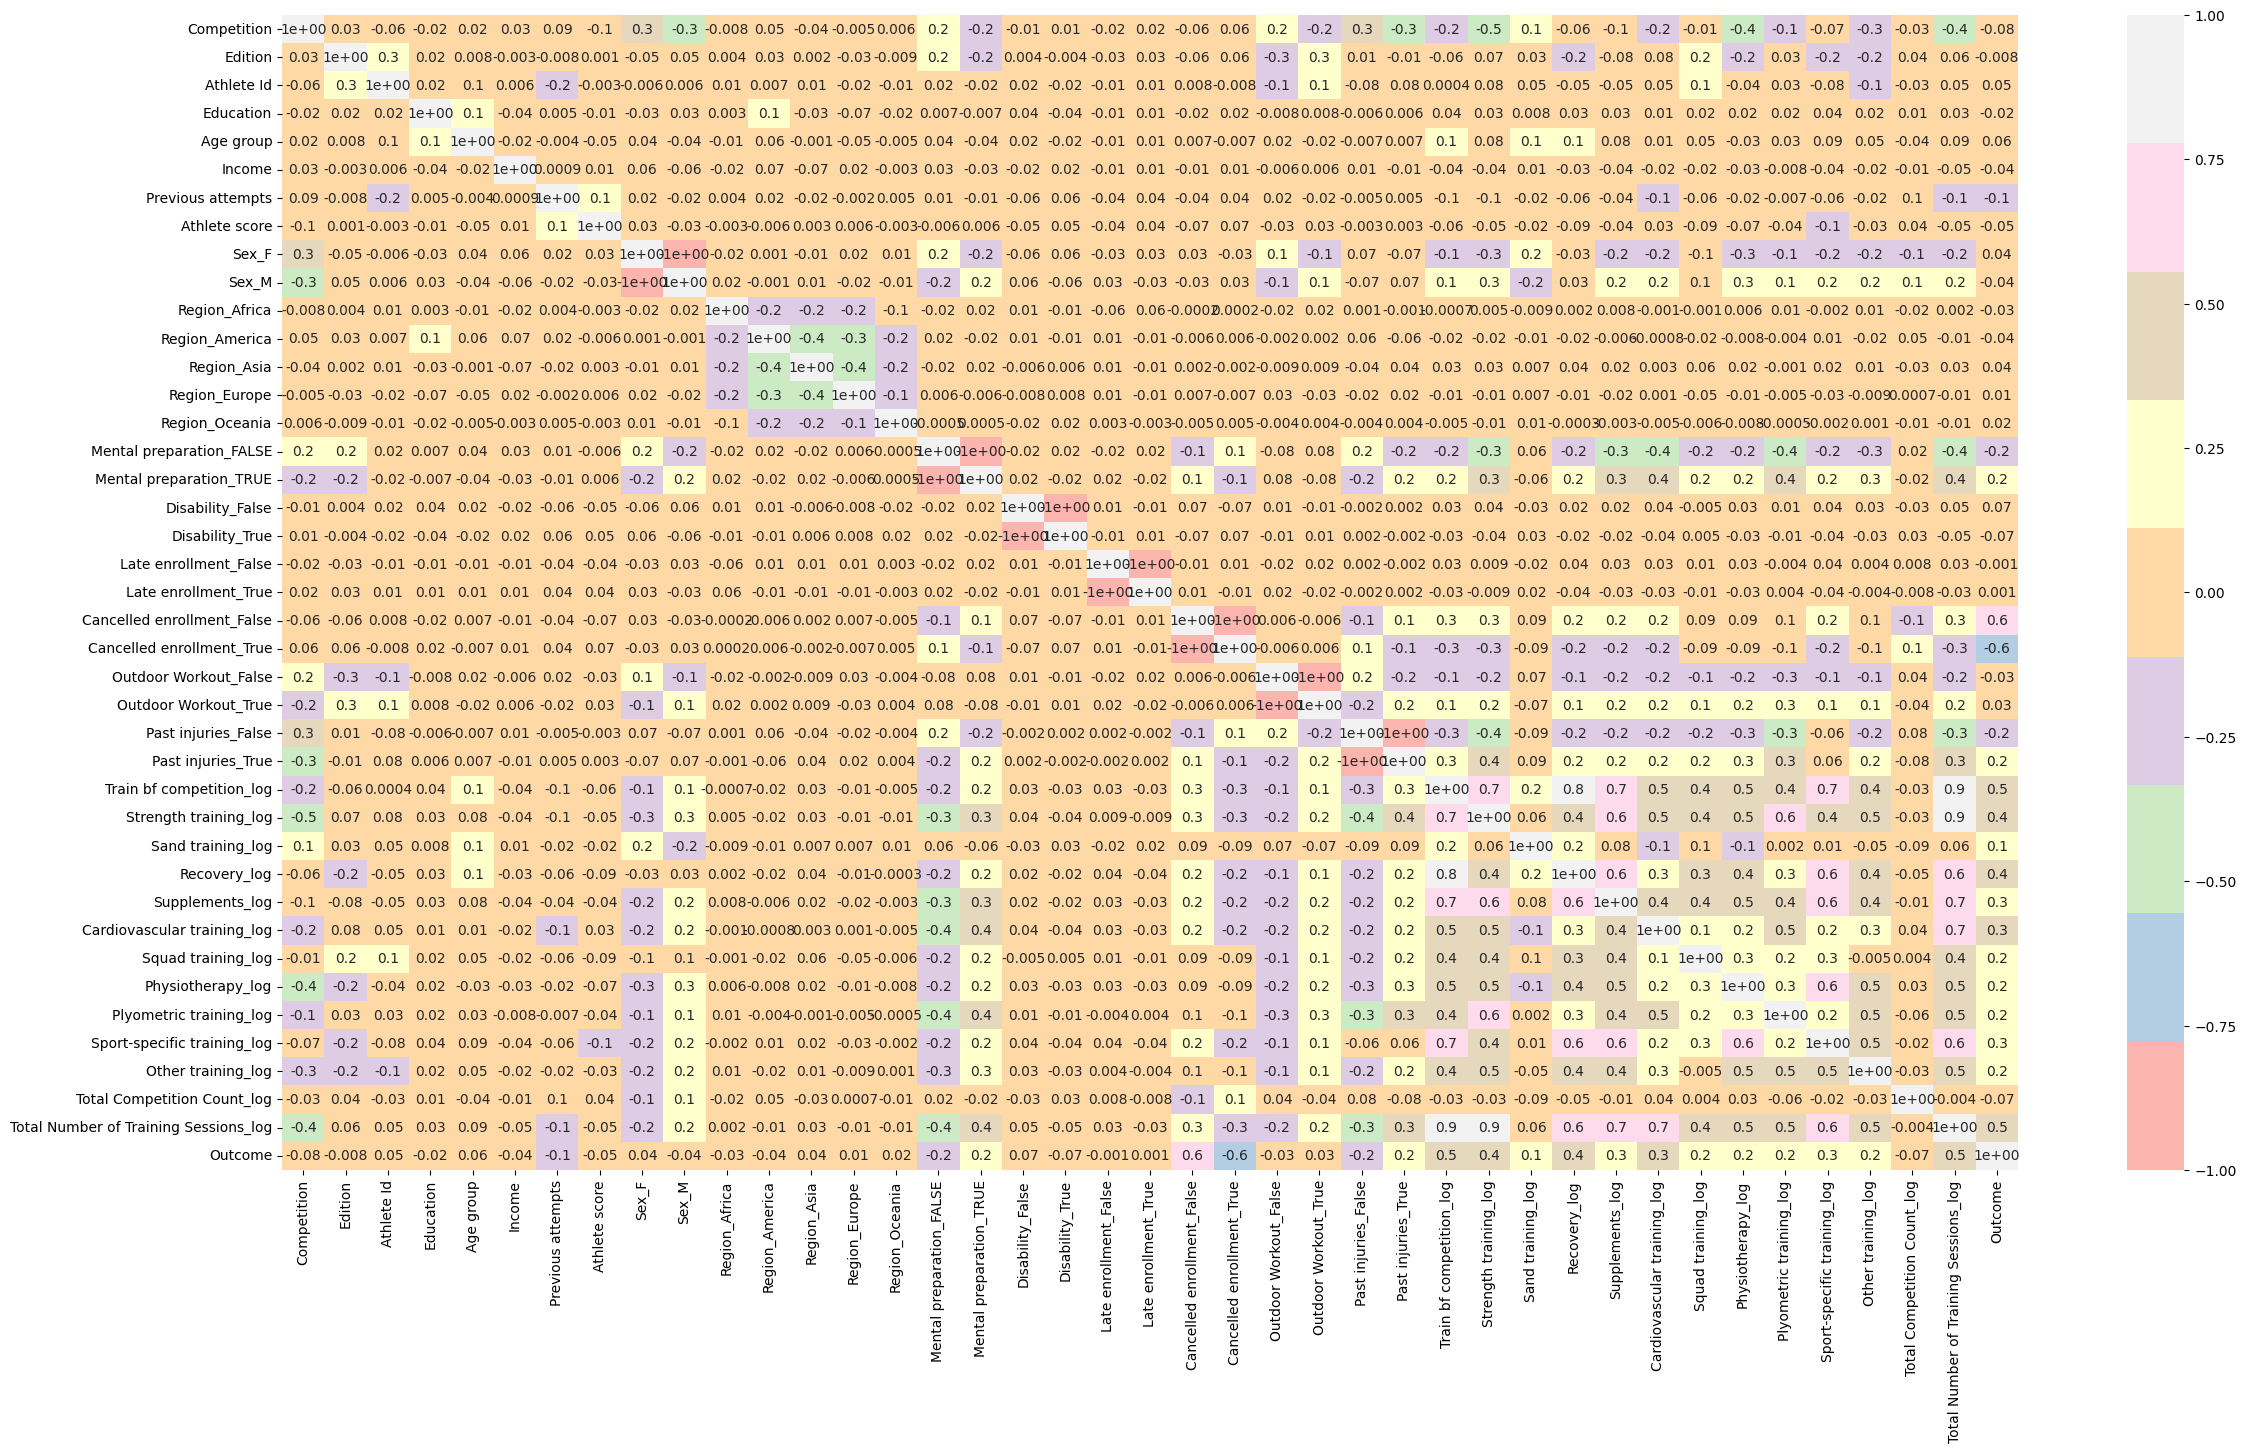

In [ ]:
plt.figure(figsize=(28,15))
sns.heatmap(data=cor_spearman, annot=True, cmap = plt.cm.Pastel1, fmt='.1')

The positively correlated features according to the Spearman method are - **Our threshold is above 0.7 **-:

- Sport-specific & train bf competition: 0.7
- Sport-specific & Strength training: 0.7
- train bf competition & supplement: 0.7
- Train bf competition & Recovry




According to the above two methods, we will exclude the following:
- train bf competition: strongly correlated to other variables.
- Sport-specific training: strongly correlated to other variables. 


In [ ]:
# The selected features after logically & correlated eliminated features:
X_y_train = X_y_train[['Competition', 'Education', 'Age group', 'Income', 'Athlete score', 'Strength training_log', 'Sand training_log', 'Recovery_log', 'Supplements_log', 'Cardiovascular training_log','Squad training_log', 'Physiotherapy_log', 'Plyometric training_log', 'Other training_log', 'Sex_F', 'Sex_M', 'Mental preparation_FALSE', 'Mental preparation_TRUE', 'Disability_False', 'Disability_True', 'Cancelled enrollment_False', 'Cancelled enrollment_True', 'Outdoor Workout_False', 'Outdoor Workout_True', 'Past injuries_False', 'Past injuries_True', 'Total Competition Count_log', 'Outcome']]
X_y_train_val = X_y_train_val[['Competition', 'Education', 'Age group', 'Income', 'Athlete score', 'Strength training_log', 'Sand training_log', 'Recovery_log', 'Supplements_log', 'Cardiovascular training_log','Squad training_log', 'Physiotherapy_log', 'Plyometric training_log', 'Other training_log', 'Sex_F', 'Sex_M', 'Mental preparation_FALSE', 'Mental preparation_TRUE', 'Disability_False', 'Disability_True', 'Cancelled enrollment_False', 'Cancelled enrollment_True', 'Outdoor Workout_False', 'Outdoor Workout_True', 'Past injuries_False', 'Past injuries_True', 'Total Competition Count_log', 'Outcome']]


Next, splitting the data again to dependent and independent variables for more advanced features selection using:
- ANOVA
- Decision Tree
- Random Forest

In [ ]:
X_train = X_y_train[['Competition', 'Education', 'Age group', 'Income', 'Athlete score', 'Strength training_log', 'Sand training_log', 'Recovery_log', 'Supplements_log', 'Cardiovascular training_log','Squad training_log', 'Physiotherapy_log', 'Plyometric training_log', 'Other training_log', 'Sex_F', 'Sex_M', 'Mental preparation_FALSE', 'Mental preparation_TRUE', 'Disability_False', 'Disability_True', 'Cancelled enrollment_False', 'Cancelled enrollment_True', 'Outdoor Workout_False', 'Outdoor Workout_True', 'Past injuries_False', 'Past injuries_True', 'Total Competition Count_log']]
y_train = X_y_train[['Outcome']]
#X_train_val = X_y_train_val[['Competition', 'Education', 'Age group', 'Income', 'Athlete score', 'Strength training_log', 'Sand training_log', 'Recovery_log', 'Supplements_log', 'Cardiovascular training_log','Squad training_log', 'Physiotherapy_log', 'Plyometric training_log', 'Other training_log', 'Sex_F', 'Sex_M', 'Mental preparation_FALSE', 'Mental preparation_TRUE', 'Disability_False', 'Disability_True', 'Cancelled enrollment_False', 'Cancelled enrollment_True', 'Outdoor Workout_False', 'Outdoor Workout_True', 'Past injuries_False', 'Past injuries_True', 'Total Competition Count_log']]
#y_train_val = X_y_train_val[['Outcome']]

### **6.3 ANOVA**

In [ ]:
fvalue_selector = SelectKBest(f_classif)

X_kbest = fvalue_selector.fit_transform(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('Original number of features:', X_train.shape[1])
print('ANOVA number of features:', X_kbest.shape[1])

Original number of features: 27
ANOVA number of features: 10


In [ ]:
columns = fvalue_selector.get_support(indices = True)
features_keep = X_train.iloc[:, columns]
features_keep.columns

Index(['Strength training_log', 'Recovery_log', 'Supplements_log',
       'Cardiovascular training_log', 'Squad training_log',
       'Physiotherapy_log', 'Cancelled enrollment_False',
       'Cancelled enrollment_True', 'Past injuries_False',
       'Past injuries_True'],
      dtype='object')



```
# This is formatted as code
```

### **6.4 Decision Trees**

In [ ]:
clf = DecisionTreeClassifier()

feature_selector = SelectFromModel(clf)
selected_features = feature_selector.fit_transform(X_train, y_train)

selected_indices = feature_selector.get_support(indices=True)

selected_feature_names = X_train.columns[selected_indices]

print("Selected Features:")
for feature in selected_feature_names:
    print(feature)


Selected Features:
Competition
Strength training_log
Recovery_log
Supplements_log
Cardiovascular training_log
Cancelled enrollment_False


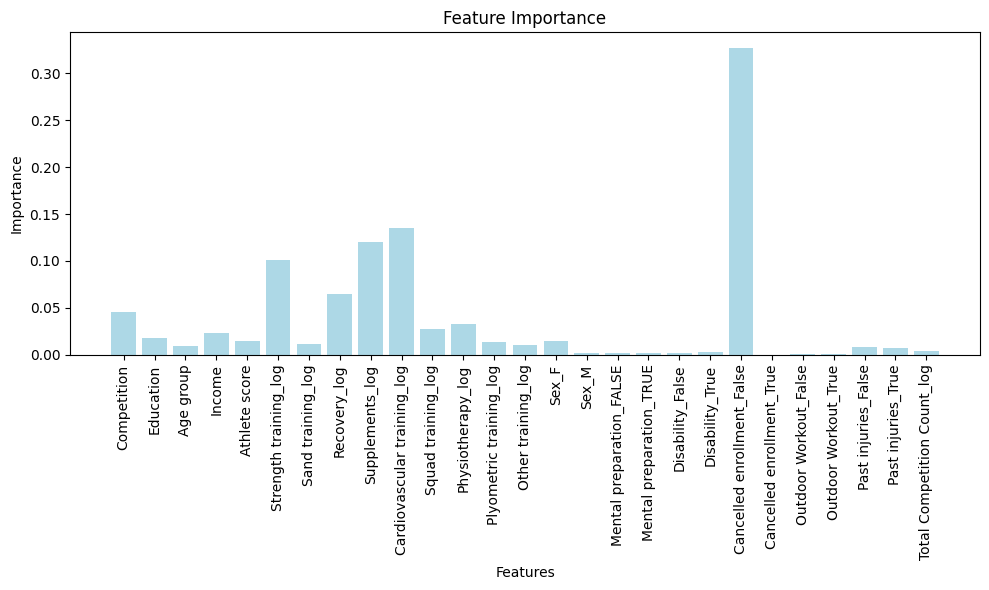

In [ ]:
clf.fit(X_train, y_train)

feature_importance = clf.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, color='lightblue')
plt.xticks(range(len(feature_importance)), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()




```
# This is formatted as code
```

### **6.5 Random Forest**

In [ ]:
importances_RF = RandomForestClassifier(random_state = 42).fit(X_train, y_train).feature_importances_

pd.Series(importances_RF, index = X_train.columns).sort_values(ascending = False)

<ipython-input-11654-a3cad82e8f1a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  importances_RF = RandomForestClassifier(random_state = 42).fit(X_train, y_train).feature_importances_


Cancelled enrollment_True      0.147655
Cardiovascular training_log    0.134556
Cancelled enrollment_False     0.129561
Strength training_log          0.114702
Recovery_log                   0.095192
Supplements_log                0.083778
Physiotherapy_log              0.040858
Squad training_log             0.034493
Competition                    0.033245
Income                         0.025214
Athlete score                  0.020547
Education                      0.019630
Sand training_log              0.016655
Other training_log             0.014891
Past injuries_False            0.013700
Plyometric training_log        0.011982
Past injuries_True             0.011241
Age group                      0.009778
Sex_M                          0.009346
Sex_F                          0.007753
Total Competition Count_log    0.005581
Disability_False               0.004295
Disability_True                0.004245
Mental preparation_TRUE        0.002970
Outdoor Workout_True           0.002778


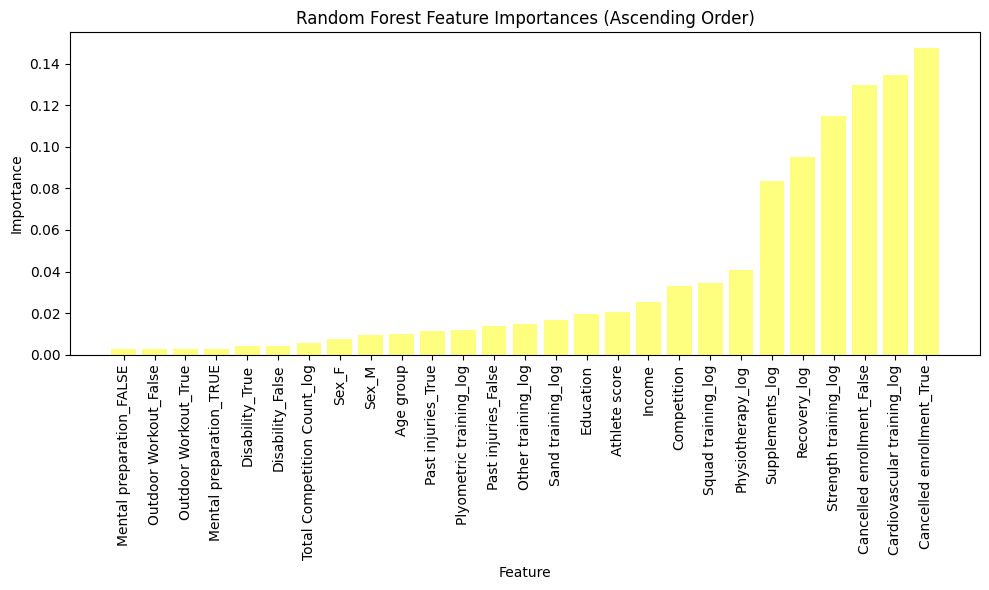

In [ ]:
indices = np.argsort(importances_RF)
sorted_features = X_train.columns[indices]
sorted_importances = importances_RF[indices]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_importances, color='yellow', alpha=0.5)
plt.xticks(range(len(sorted_features)), sorted_features, rotation='vertical')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importances (Ascending Order)")
plt.tight_layout()
plt.show()


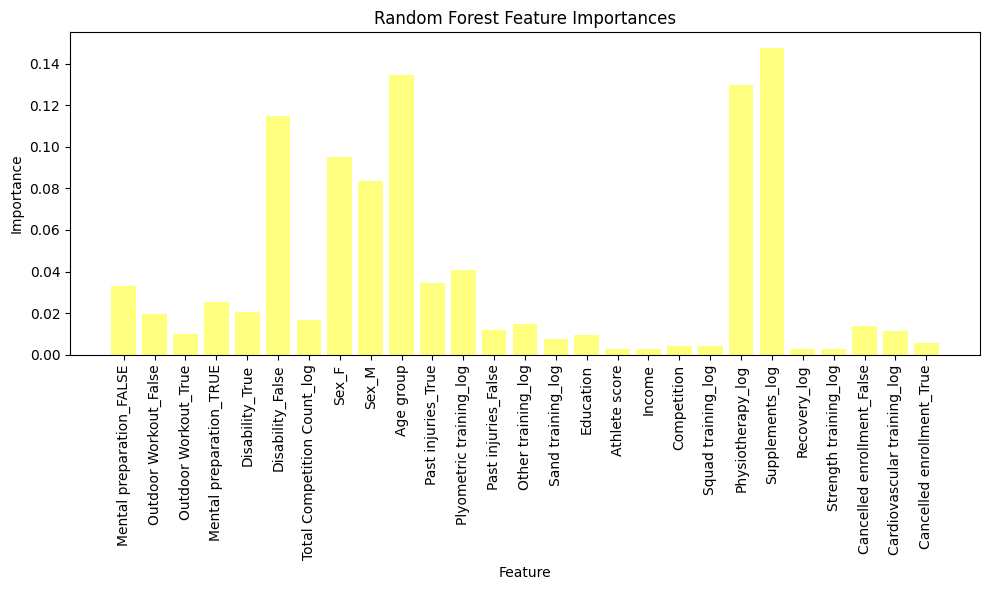

In [ ]:
# Sort feature importances in descending order
indices = np.argsort(importances_RF)
sorted_features = X_train.columns[indices]
sorted_importances = importances_RF[indices]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), importances_RF, color='yellow', alpha=0.5)
plt.xticks(range(len(sorted_features)), sorted_features, rotation='vertical')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()


### **6.6 Lasso Regression**

In [ ]:
lasso = LassoCV()

In [ ]:
lasso.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

In [ ]:
coef_lasso = pd.Series(lasso.coef_, index = X_train.columns)
coef_lasso.sort_values()

Past injuries_False           -8.220413e-02
Plyometric training_log       -5.743659e-02
Supplements_log               -4.078377e-02
Mental preparation_FALSE      -2.313765e-02
Income                        -6.047485e-03
Athlete score                 -3.195531e-03
Education                     -5.496383e-04
Sex_M                         -2.954383e-16
Cancelled enrollment_True     -1.252344e-16
Outdoor Workout_True          -5.128299e-17
Disability_True               -0.000000e+00
Mental preparation_TRUE        0.000000e+00
Past injuries_True             5.430982e-17
Physiotherapy_log              1.096350e-02
Other training_log             1.426053e-02
Age group                      1.484665e-02
Total Competition Count_log    1.963998e-02
Sand training_log              2.019966e-02
Squad training_log             2.487580e-02
Disability_False               3.877632e-02
Competition                    4.453674e-02
Outdoor Workout_False          5.960115e-02
Recovery_log                   7

In [ ]:
def lasso_plot(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(10,10))
    imp_coef.plot(kind = "barh", color='violet')
    plt.title("Importants Features ")
    plt.savefig(name + '- lasso_plot.png', dpi = 200)
    plt.show()

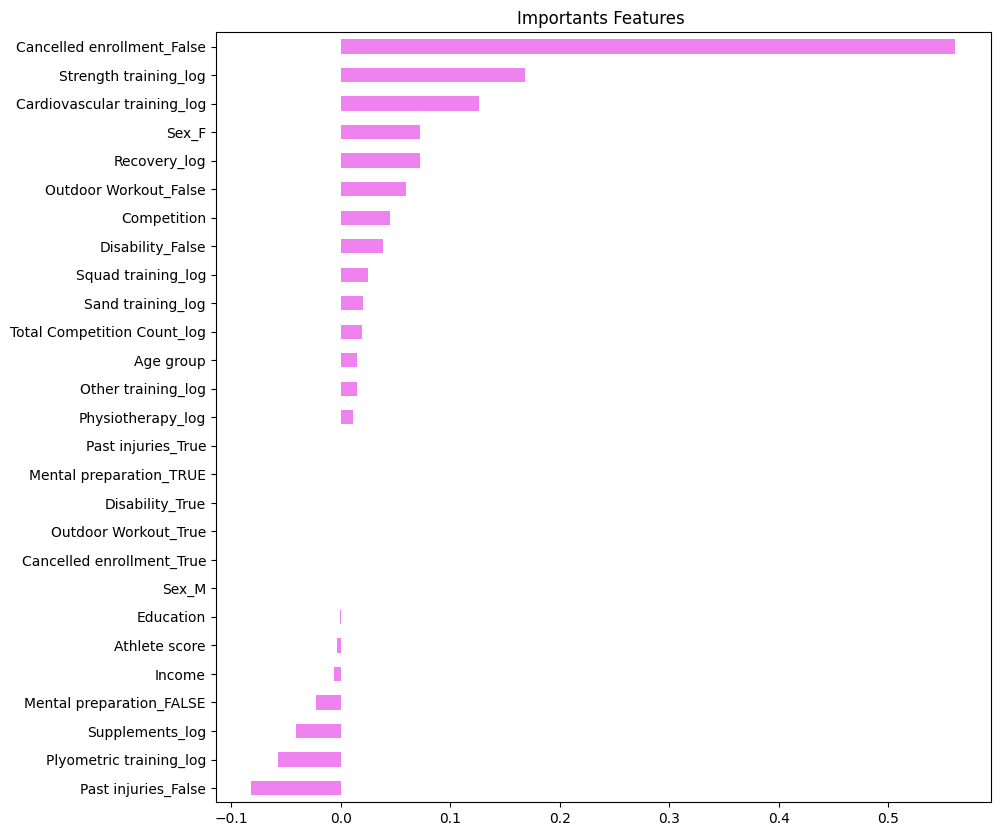

In [ ]:
lasso_plot(coef_lasso, 'Important Features')

### **6.7 AdaBoost**

In [ ]:
ab = AdaBoostClassifier(random_state = 42).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


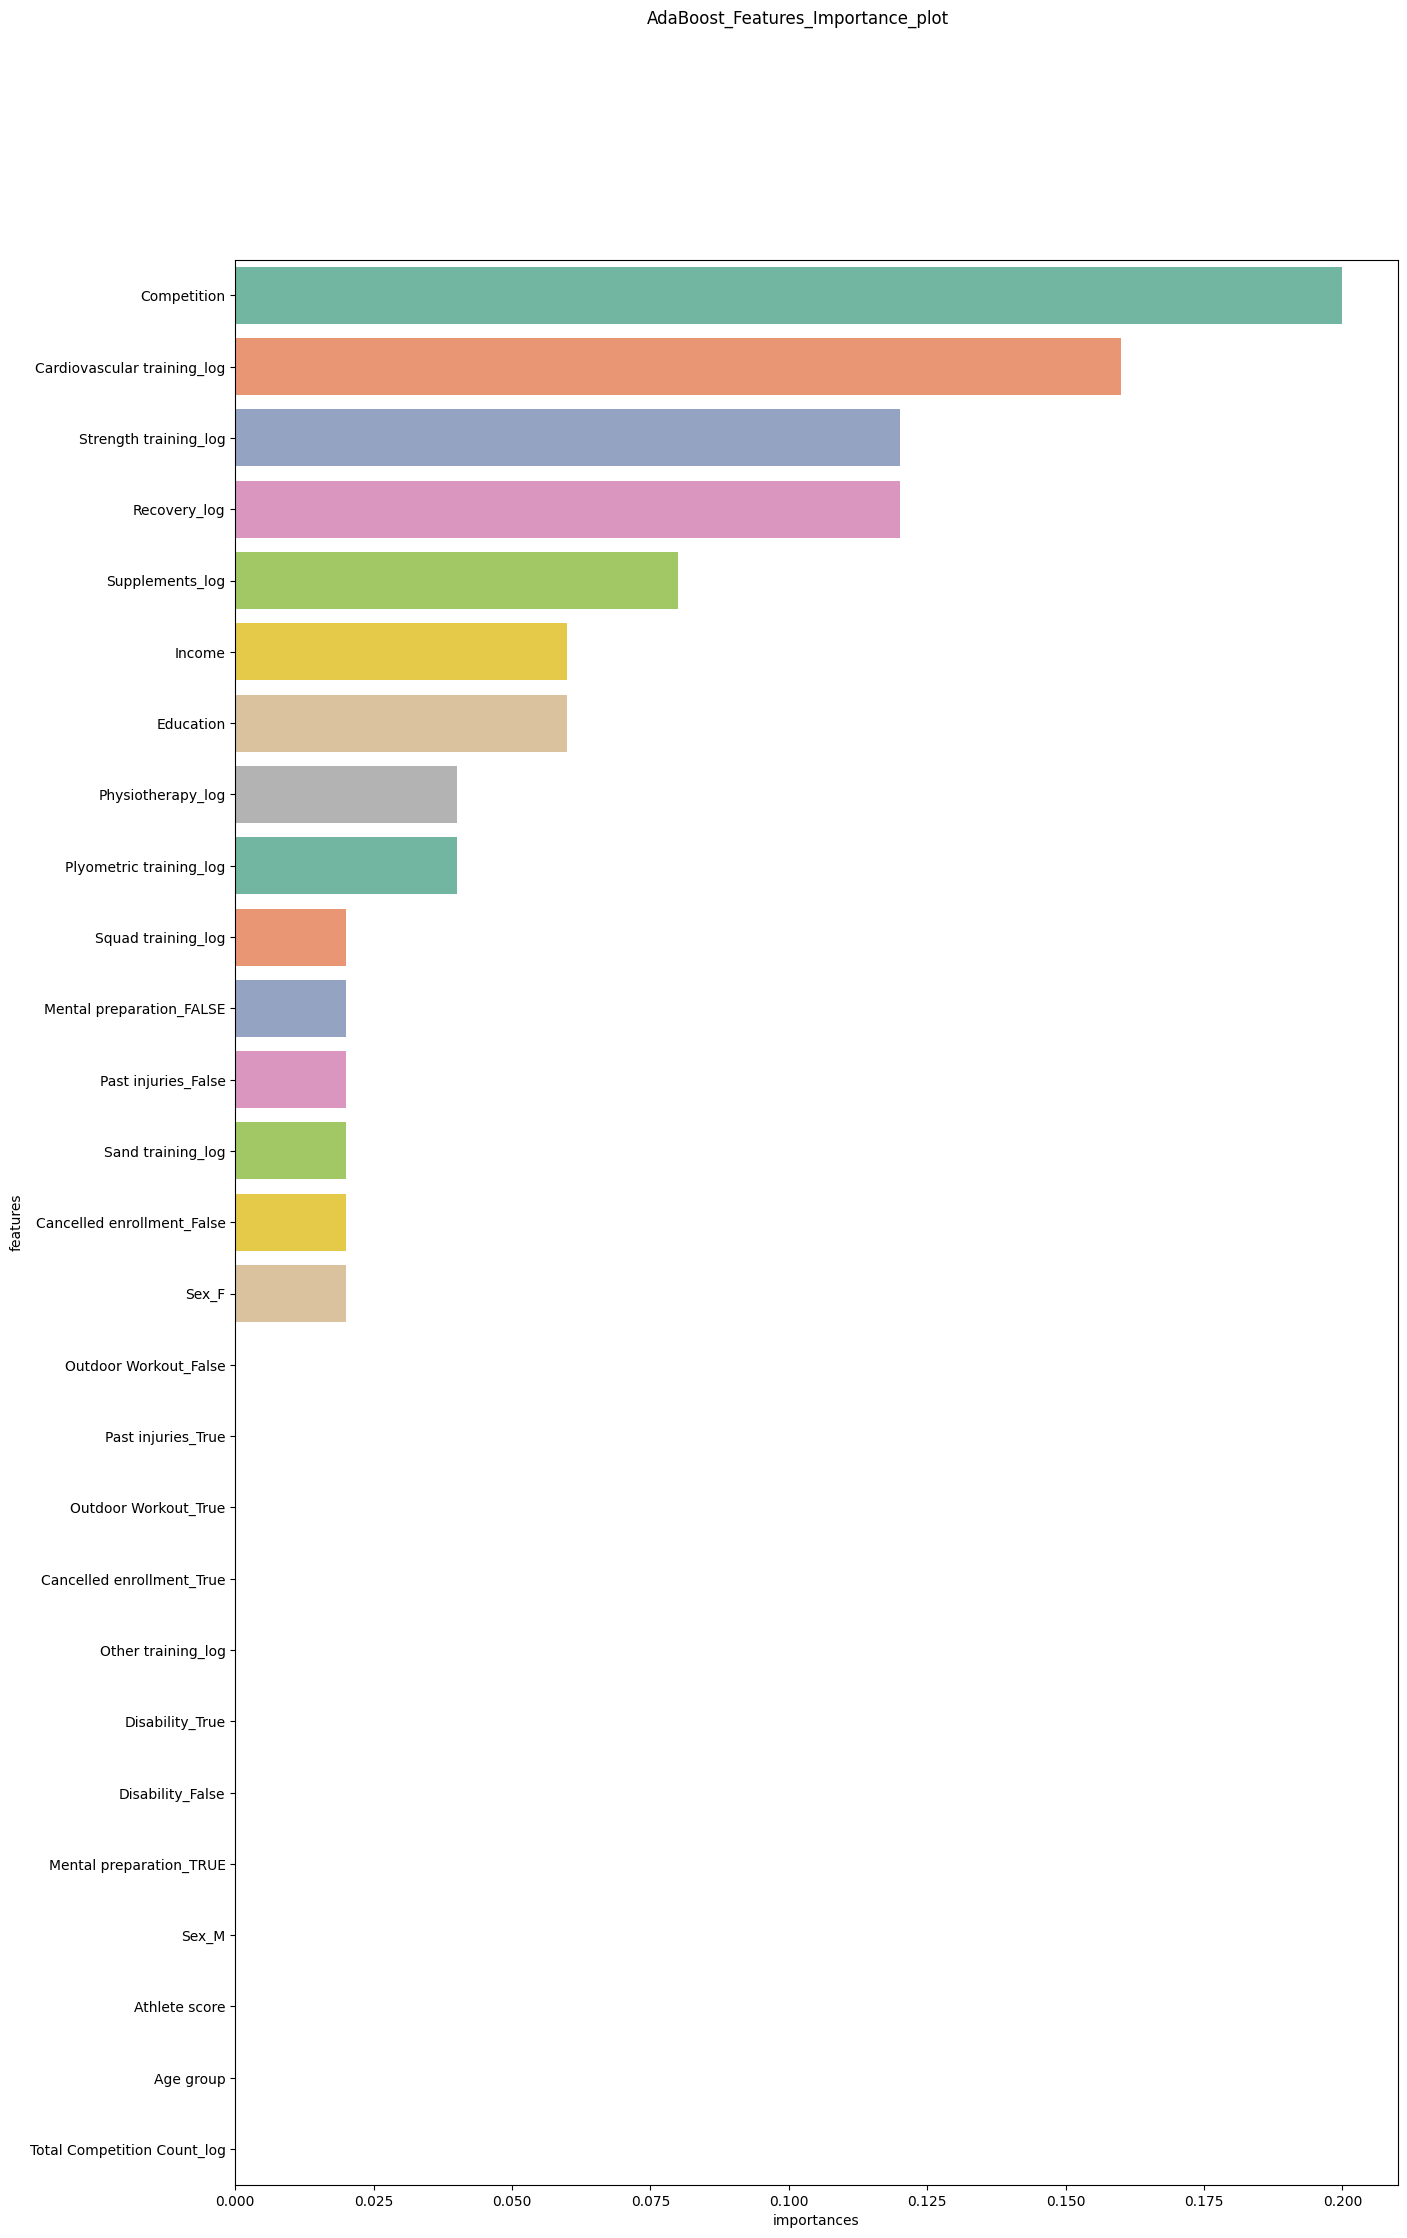

In [ ]:
plt.figure(figsize=(15,25))
importances = ab.feature_importances_
features = X_train.columns
data = list(zip(importances, features))
data_x = pd.DataFrame(data, columns = ['importances', 'features'])
data_x = data_x.sort_values('importances', ascending = False)

title = 'AdaBoost_Features_Importance_plot'

plt.suptitle(title)

sns.barplot(x = data_x['importances'], y = data_x['features'], palette = 'Set2', orient = 'h')
plt.savefig(title, dpi = 200)

**Feature select conclusion:**

- Some of the features that are not logically related to predicting our outcome have been eliminated.
- Some of the features elimnatied based on correlation. -the threshold for removing is a correlation above 0.7 -
- The rest of the features were selected using ANOVA, decision tree, random forest, lasso and AdaBoost - the threshold is to choose features that at least appeared in two of the mothers

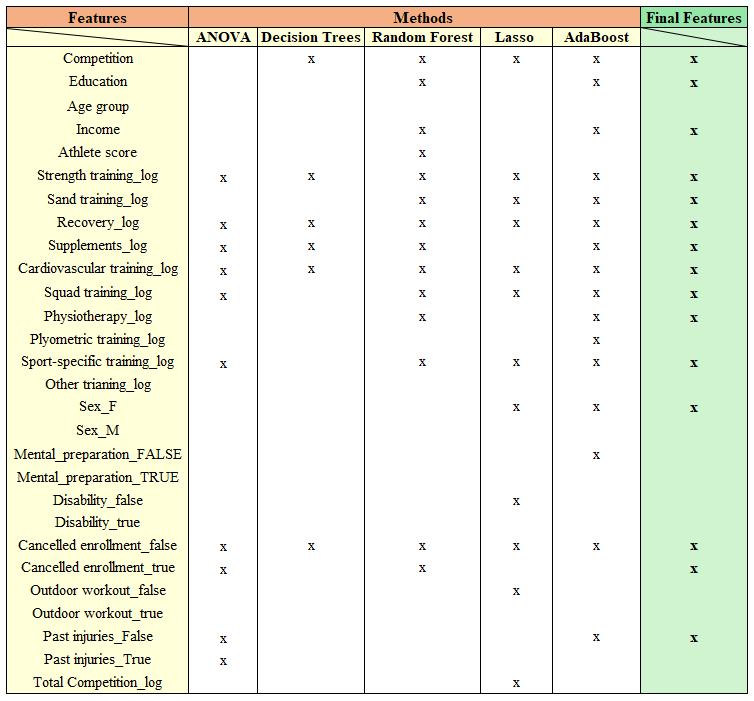



In [ ]:
# The features that will be used for modeling:
X_train = X_y_train[['Competition', 'Strength training_log', 'Recovery_log', 'Supplements_log', 'Cardiovascular training_log', 'Physiotherapy_log', 'Cancelled enrollment_False', 'Cancelled enrollment_True', 'Past injuries_False']]
X_train_val = X_y_train_val[['Competition', 'Strength training_log', 'Recovery_log', 'Supplements_log', 'Cardiovascular training_log', 'Physiotherapy_log', 'Cancelled enrollment_False', 'Cancelled enrollment_True', 'Past injuries_False']]


In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#feature_scaler = MinMaxScaler().fit(X_train)
#X_train = pd.DataFrame(feature_scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
#X_train_val = pd.DataFrame(feature_scaler.transform(X_train_val), columns= X_train_val.columns, index=X_train_val.index)

## <font color='#81D8D0'> 7. Modeling

### **7.1 KNN: K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#rest the index
X_train.reset_index()
X_train.head()

Competition  Strength training_log  Recovery_log  Supplements_log  \
0            1              -0.323458     -0.353201        -0.155807   
1            3              -0.134808      0.490614         0.293202   
2            0               0.444466     -0.018745        -0.789004   
3            2              -0.790514     -1.304522        -0.076589   
4            3               0.678046      0.278155        -0.289566   

   Cardiovascular training_log  Physiotherapy_log  Cancelled enrollment_False  \
0                    -0.053580           0.221065                           1   
1                    -0.019619           0.000000                           1   
2                    -0.101451           1.628434                           1   
3                    -0.182348           0.000000                           0   
4                     0.156129           0.000000                           1   

   Cancelled enrollment_True  Past injuries_False  
0                          0                    1  
1                          0                    1  
2                          0                    1  
3                          1                    1  
4                          0                    0

In [ ]:
modelKNN = KNeighborsClassifier()

In [ ]:
#Fit the model

modelKNN.fit(X = X_train, y = y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
labels_train = modelKNN.predict(X_train)
labels_test = modelKNN.predict(X_train_val)

In [ ]:
modelKNN.score(X_train, y_train)

0.8918573255648714

In [ ]:
modelKNN.score(X_train_val, y_train_val)

0.8622941510505394

In [ ]:
from sklearn.metrics import f1_score

print(f'F1 Score between the y_train and labels_train: {f1_score(y_train, labels_train):.3f}\n' +
     f'F1 Score between the y_test and labels_test: {f1_score(y_train_val, labels_test):.3f}')

F1 Score between the y_train and labels_train: 0.913
F1 Score between the y_test and labels_test: 0.888


In [ ]:
#Found the best K for the model:

numberK_list=np.arange(1,31)
high_score=0
nof=0          
score_list_train =[]
score_list_val =[]
for n in numberK_list:
    model = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    
    #obtain predictions
    labels_train = model.predict(X_train)
    labels_test = model.predict(X_train_val)
    
    score_train = f1_score(y_train, labels_train)
    score_val = f1_score(y_train_val, labels_test)
    score_list_train.append(score_train)
    score_list_val.append(score_val)
    
    if(score_val>high_score):
        high_score = score_val
        nof = numberK_list[n-1]
print("Best number of neighbors: %d" %nof)
print("Mean F1-score in train with %d neighbors: %f" % (nof, score_list_train[nof-1]))
print("Mean F1-score in validation with %d neighbors: %f" % (nof, high_score))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

**The KNN conclusion:**

The model performance is good

- Mean F1-score in train with 23 neighbors: 0.897675
- Mean F1-score in validation with 23 neighbors: 0.895946

These score based on 27 k after running a loop to test from 1 to 31

### **7.2 Decision Trees**

**The outcome is Binary so we will only use Classification Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier()

In [ ]:
modelDT.fit(X_train, y_train)

In [ ]:
data = X_train.append(X_train_val)

In [ ]:
from sklearn import tree
import graphviz
# Process a decision tree graph using Graphviz
dot_data = tree.export_graphviz(modelDT, 
                                out_file=None, 
                                feature_names=data.columns,  
                                class_names=["Win", "Lose"],  
                                filled=True, 
                                rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
y_pred_dt = modelDT.predict(X_train_val)

In [ ]:
modelDT.score(X_train_val, y_train_val)

In [ ]:
modelDT.feature_importances_

In [ ]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(5,3))
    plt.barh(range(n_features), model.feature_importances_, color='yellowgreen')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title('Feature Importance in Decision Tree Classifier')
    plt.show()

In [ ]:
plot_feature_importances(modelDT)

 Change the split criterion to entropy

In [ ]:
modelDT_entropy = DecisionTreeClassifier(criterion='entropy')
modelDT_entropy.fit(X_train, y_train)

In [ ]:
modelDT_entropy.score(X_train, y_train)

In [ ]:
modelDT_entropy.score(X_train_val, y_train_val)

The difference between the train and validation sets scores could indicate that the model is overfitting. We need to treat that!

Changing the parameters: the depth and the leaf number:

In [ ]:
scores_train = []
scores_test = []
for i in range(1,9):
    DTC = DecisionTreeClassifier(max_depth=i)
    DTC.fit(X_train, y_train)
    scores_train.append(DTC.score(X_train, y_train))
    scores_test.append(DTC.score(X_train_val, y_train_val))

In [ ]:
plt.plot(list(range(1,9)), scores_train, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,9)), scores_test, label="Score on Test Set", color='dimgray')
plt.xlabel("Maximum Depth")
plt.ylabel("Score")
plt.legend()
plt.show()

As we can see in the above graph increasing while increasing the depth of the tree the results of the train set are close to the results of the validation value. at 6 depth the training results is similar to the test set.

Trying for the number of leafs

In [ ]:
scores_train = []
scores_test = []
parameters = []
for i in range(10, 20):
    for j in range(1,7):
        parameters.append([i,j])
        DTR = DecisionTreeClassifier(min_samples_split=i, max_depth=j)
        DTR.fit(X_train, y_train)
        scores_train.append(DTR.score(X_train, y_train))
        scores_test.append(DTR.score(X_train_val, y_train_val))

In [ ]:
len(scores_train)

60

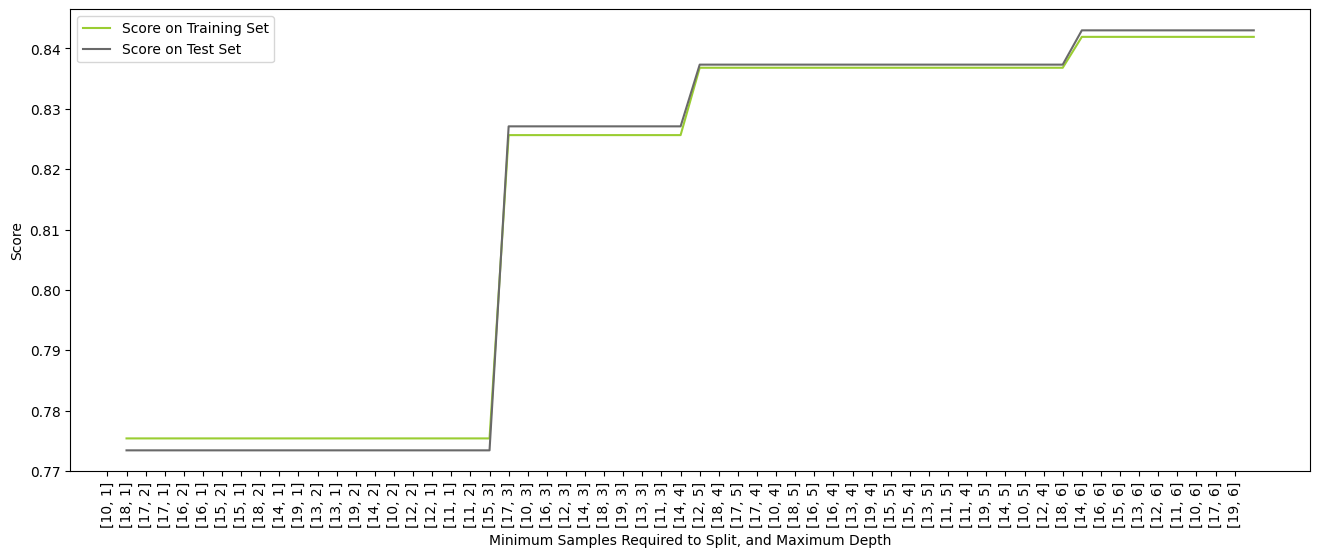

In [ ]:
scores = pd.DataFrame({'Score_Train': scores_train,'Score_Test': scores_test,'Parameters': parameters}).sort_values(by=['Score_Train'])
plt.figure(figsize=(16,6))
plt.plot(list(range(1,61)), scores['Score_Train'], label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,61)), scores['Score_Test'], label="Score on Test Set", color='dimgray')
plt.xlabel("Minimum Samples Required to Split, and Maximum Depth")
plt.ylabel("Score")
plt.xticks(np.arange(len(parameters)), scores['Parameters'])
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gb = GradientBoostingClassifier()

# Fit the classifier to the training data
gb.fit(X_train, y_train)

# Make predictions on the X_train_val dataset
y_pred_dt = gb.predict(X_train_val)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Decision Tree conclusion**

As we can see in the last graph when we tried with different depth and leaf numbers we see that the results are close between the train and validation which indicates that the model is not overfitting. The best depth, and leaf number for the model is [6, 16] which is almost identical 

### **7.3 Ensemble Classifiers**

#### **7.3.1 Bagging**

In [ ]:
#Import library
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier()

In [ ]:
#fit the model to the array of points X_train_val and y_train_val
modelDT.fit(X = X_train_val, y = y_train_val)

DecisionTreeClassifier()

In [ ]:
modelDT.score(X_train_val, y_train_val)

1.0

In [ ]:
#score method to obtain the mean accuracy of X_Train and y_train
modelDT.score(X_train, y_train)

0.8050305527923831

In [ ]:
# predict() method to perform classification for X_train
y_pred_DT = modelDT.predict(X_train)

In [ ]:
#apply bagging using the same base model
from sklearn.ensemble import BaggingClassifier
bagging_DT = BaggingClassifier(base_estimator = modelDT)

In [ ]:
bagging_DT.fit(X = X_train_val, y = y_train_val)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [ ]:
bagging_DT.score(X_train_val, y_train_val)

0.9894946053378763

In [ ]:
bagging_DT.score(X_train, y_train)

0.8448202358959784

In [ ]:
y_pred_bagging = bagging_DT.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
def metrics(y_model1, pred_model1, y_model2, pred_model2):
    print('___________________________________________________________________________________________________________')
    print('                                          Simple Model                                                     ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_model1, pred_model1))


    print('___________________________________________________________________________________________________________')
    print('                                              Bagging                                                      ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_model2, pred_model2))

In [ ]:
y_train_length = len(y_train)
y_pred_DT_length = len(y_pred_DT)
y_pred_bagging_length = len(y_pred_bagging)

print("Length of y_train:", y_train_length)
print("Length of y_pred_DT:", y_pred_DT_length)
print("Length of y_pred_bagging:", y_pred_bagging_length)

In [ ]:
metrics(y_train, y_pred_DT, y_train, y_pred_bagging)

In [ ]:
bagging_DT.estimators_

In [ ]:
bagging_DT.estimators_samples_

In [ ]:
bagging_DT_50 = BaggingClassifier(base_estimator = modelDT, n_estimators = 50, random_state = 5)

In [ ]:
bagging_DT_50.fit(X = X_train_val, y = y_train_val)

In [ ]:
bagging_DT_s = BaggingClassifier(base_estimator = modelDT, max_samples = 0.5, random_state = 5)

In [ ]:
bagging_DT_s.fit(X = X_train_val, y = y_train_val)

In [ ]:
bagging_DT_b = BaggingClassifier(base_estimator = modelDT, bootstrap = False, random_state = 5)

In [ ]:
bagging_DT_b.fit(X = X_train_val, y = y_train_val)

In [ ]:
#Lets see the Accuracy of the models
accuracies = [modelDT.score(X_train, y_train), bagging_DT.score(X_train, y_train), bagging_DT_50.score(X_train, y_train), 
              bagging_DT_s.score(X_train, y_train), bagging_DT_b.score(X_train, y_train)]
models = ['DT', 'B', 'B-E', 'B-S', 'B-B']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1], color='yellowgreen')
plt.xticks(color='dimgray')
plt.yticks(color='dimgray')
plt.ylim(0.7,0.77)
plt.show()

#### **7.3.2 Boosting**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
aboost = AdaBoostClassifier()

In [ ]:
aboost.fit(X_train_val, y_train_val)

In [ ]:
aboost.estimators_

In [ ]:
aboost.score(X_train, y_train)

In [ ]:
accuracies = [modelDT.score(X_train, y_train), bagging_DT.score(X_train, y_train), bagging_DT_50.score(X_train, y_train), 
              bagging_DT_s.score(X_train, y_train), bagging_DT_b.score(X_train, y_train), aboost.score(X_train, y_train)]
models = ['DT', 'B', 'B-E', 'B-S', 'B-B', 'AB']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1], color='yellowgreen')
plt.xticks(color='dimgray')
plt.yticks(color='dimgray')
plt.ylim(0.69,0.8)
plt.show()

#### **7.3.3 Random Forest**

In [ ]:
modelRF.fit(X_train_val, y_train_val)

In [ ]:
modelRF.score(X_train, y_train)

In [ ]:
len(modelRF.estimators_)

In [ ]:
modelRF_6trees = RandomForestClassifier(n_estimators=6)

In [ ]:
modelRF_6trees.fit(X_train_val, y_train_val)

In [ ]:
modelRF_maxdepth10 = RandomForestClassifier(max_depth=10)

In [ ]:
modelRF_maxdepth10.fit(X_train_val, y_train_val)

**visual comparison between Bagging and Random Forests!:**

In [ ]:
accuracies_test = [modelDT.score(X_train, y_train), 
                   bagging_DT.score(X_train, y_train), 
                   bagging_DT_50.score(X_train, y_train), 
                   bagging_DT_s.score(X_train, y_train), 
                   bagging_DT_b.score(X_train, y_train), 
                   modelRF.score(X_train, y_train), 
                   modelRF_6trees.score(X_train, y_train),
                   modelRF_maxdepth10.score(X_train, y_train)]
accuracies_train = [modelDT.score(X_train, y_train), 
                    bagging_DT.score(X_train, y_train), 
                    bagging_DT_50.score(X_train, y_train), 
                    bagging_DT_s.score(X_train, y_train), 
                    bagging_DT_b.score(X_train, y_train), 
                    modelRF.score(X_train, y_train), 
                    modelRF_6trees.score(X_train, y_train), 
                    modelRF_maxdepth10.score(X_train, y_train)]
models = ['DT', 'B', 'B-E', 'B-S', 'B-B', 'RF', 'RF-E', 'RF-D']
data_tuples = list(zip(models,accuracies_test))
data_test = pd.DataFrame(data_tuples)
data_tuples_train = list(zip(models,accuracies_train))
data_train = pd.DataFrame(data_tuples_train)

In [ ]:
plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.bar(data_test.index - 0.4/2, data_test[1], width=0.4, color='yellowgreen', label='Train Accuracy')
ax.bar(data_train.index + 0.4/2, data_train[1],  width=0.4, color='dimgray', label='Train_val Accuracy')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Comparison of Accuracies for TRAIN and Train_val Data', fontsize=12)
plt.xticks(np.arange(len(models)), models)
plt.show()

### **Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC

# Initialize the model
svc = SVC(random_state=42)

# Train the model
svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svc = svc.predict(X_train_val)

# Calculate the accuracy score
accuracy_svc = accuracy_score(y_train_val, y_pred_svc)
accuracy_svc

### **Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb = GradientBoostingClassifier(random_state=42)

# Train the model
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb.predict(X_train_val)

# Calculate the accuracy score
accuracy_gb = accuracy_score(y_train_val, y_pred_gb)
accuracy_gb

## <font color='#81D8D0'>8. Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrices

cm_dt = confusion_matrix(y_train_val, y_pred_dt)
cm_rf = confusion_matrix(y_train_val, y_pred_rf)
cm_svc = confusion_matrix(y_train_val, y_pred_svc)
cm_gb = confusion_matrix(y_train_val, y_pred_gb)

# Plot confusion matrices
plt.figure(figsize=(15, 10))


plt.subplot(233)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest')

plt.subplot(234)
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues')
plt.title('SVM')

plt.subplot(235)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 scores

f1_rf = f1_score(y_train_val, y_pred_rf)
f1_svc = f1_score(y_train_val, y_pred_svc)
f1_gb = f1_score(y_train_val, y_pred_gb)

# Create a DataFrame for visualization
f1_scores = pd.DataFrame({'Model': ['Random Forest', 'SVC', 'Gradient Boosting'],
                          'F1 Score': [f1_rf, f1_svc, f1_gb]})

# Plot F1 scores
plt.figure(figsize=(10, 6))
sns.barplot(x='F1 Score', y='Model', data=f1_scores, palette='Blues_d')
plt.title('F1 Scores of Models')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.show()

f1_scores.sort_values('F1 Score', ascending=False)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model.score(X_train, y_train)

In [ ]:
model.score(X_train_val, y_train_val)

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

In [ ]:
# Step 14
y_pred = log_model.predict(X_train_val)

In [ ]:
confusion_matrix(y_train_val, y_pred)

In [ ]:
accuracy_score(y_train_val, y_pred)

In [ ]:
precision_score(y_train_val, y_pred)

In [ ]:
# Step 18
recall_score(y_train_val, y_pred)

Regession Problems 

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_train_val)

In [ ]:
mean_absolute_error(y_train_val, y_pred)

In [ ]:
mean_squared_error(y_train_val, y_pred, squared = True)

In [ ]:
mean_squared_error(y_train_val, y_pred, squared = False)

In [ ]:
r2_score(y_train_val, y_pred)

## <font color='#81D8D0'>9. Test Dataset

### **9.1 Data Exploration**

In [ ]:
# Initial number of rows and columns
Test.shape

In [ ]:
# Get an overview of the firts 10 rows 
Test.head(10)

In [ ]:
# Check variables data types
Test.info()

**Findings:**


*   16 numerical variables and 13 categorical variables



In [ ]:
# Get descriptive statistics for numerical variables
Test.describe().T

**Findings:**


*   The dataset has 2 ID's variables (Record ID and Athlete ID)
*   Athlete score: has negative values



In [ ]:
# Get descriptive statistics for categorical variables
Test.describe(include = ['O']).T

#### **Test data**

In [ ]:
Test.hist(figsize=(15, 18))

### **9.2 Data Pre-Processing** 

####**9.2.1 Data Preparation**

##### **9.2.1.1 Duplicated Data**

In [ ]:
# Check duplicated data
Test.duplicated().sum

In [ ]:
sorted_duplicates = Test.sort_values('RecordID')
duplicates = sorted_duplicates[sorted_duplicates.duplicated(subset=['RecordID'], keep=False)]
table = duplicates.head(4)

color_peach = '\033[38;5;208m'
color_reset = '\033[0m' 

table_format = 'plain'

table['RecordID'] = color_peach + table['RecordID'].astype(str) + color_reset

print(tabulate(table, headers='keys', tablefmt=table_format))

In [ ]:
sorted_duplicates = Test.sort_values('Athlete Id')
duplicates = sorted_duplicates[sorted_duplicates.duplicated(subset=['Athlete Id'], keep=False)]
table = duplicates.head(4)

color_peach = '\033[38;5;208m'
color_reset = '\033[0m'  

table_format = 'plain'

table['Athlete Id'] = color_peach + table['Athlete Id'].astype(str) + color_reset

print(tabulate(table, headers='keys', tablefmt=table_format))

**Findings:** We've duplicated ID's in Athlete ID - which means that the same athlete participated in more than one competition. 




##### **9.2.1.2 Set to index**

In [ ]:
# Redefine the index of the dataset
Test.set_index('RecordID', drop=True, inplace=True)
Test.head(1)

In [ ]:
Test.info()

#### **9.2.2 Incoherences**

In [ ]:
Test['Competition'].value_counts()

In [ ]:
Test['Competition'].replace(to_replace='Local Match',value='Local',inplace=True)
Test['Competition'].replace(to_replace='Regional Tournament',value='Regional',inplace=True)
Test['Competition'].replace(to_replace='Federation League',value='National',inplace=True)
Test['Competition'].replace(to_replace='National Cup',value='National',inplace=True)
Test['Competition'].replace(to_replace='Continental Championship',value='International',inplace=True)
Test['Competition'].replace(to_replace='World Championship',value='International',inplace=True)
Test['Competition'].replace(to_replace='Olympic Games',value='International',inplace=True)
Test['Competition'].value_counts()

In [ ]:
Test['Edition'].value_counts()

In [ ]:
Test['Sex'].value_counts()

In [ ]:
Test['Region'].value_counts()

In [ ]:
Test['Region'].replace(to_replace='North America',value='America',inplace=True)
Test['Region'].replace(to_replace='Western Europe',value='Europe',inplace=True)
Test['Region'].replace(to_replace='East Asia',value='Asia',inplace=True)
Test['Region'].replace(to_replace='South America',value='America',inplace=True)
Test['Region'].replace(to_replace='Northern Africa',value='Africa',inplace=True)
Test['Region'].replace(to_replace='Eastern Europe',value='Europe',inplace=True)
Test['Region'].replace(to_replace='Middle East',value='Asia',inplace=True)
Test['Region'].replace(to_replace='Central Asia',value='Asia',inplace=True)
Test['Region'].replace(to_replace='Central America',value='America',inplace=True)
Test['Region'].replace(to_replace='Oceania',value='Oceania',inplace=True)
Test['Region'].replace(to_replace='Southern Europe',value='Europe',inplace=True)
Test['Region'].replace(to_replace='South Asia',value='Asia',inplace=True)
Test['Region'].replace(to_replace='Southern Africa',value='Africa',inplace=True)
Test['Region'].value_counts()

In [ ]:
Test['Education'].value_counts()

In [ ]:
Test['Age group'].value_counts()

In [ ]:
Test['Age group'].replace(to_replace='0',value='0-35',inplace=True)
Test['Age group'].value_counts()

In [ ]:
Test['Income'].value_counts()

In [ ]:
Test['Disability'].value_counts()

In [ ]:
Test['Previous attempts'].value_counts()

In [ ]:
Test['Late enrollment'].value_counts()

In [ ]:
Test['Cancelled enrollment'].value_counts()

In [ ]:
Test['Athlete score'].value_counts()

In [ ]:
Test['Athlete score'] = Test['Athlete score'].abs()
Test['Athlete score'].value_counts()

In [ ]:
Test['Mental preparation'].value_counts()

In [ ]:
Test['Mental preparation'].replace(to_replace='FASE',value='FALSE',inplace=True)
Test['Mental preparation'].value_counts()

In [ ]:
Test['Train bf competition'].value_counts()

In [ ]:
Test['Cardiovascular training'].value_counts()

In [ ]:
Test['Strength training'].value_counts()

In [ ]:
Test['Sand training'].value_counts()

In [ ]:
Test['Outdoor Workout'].value_counts()

In [ ]:
Test['Squad training'].value_counts()

In [ ]:
Test['Plyometric training'].value_counts()

In [ ]:
Test['Sport-specific training'].value_counts()

In [ ]:
Test['Other training'].value_counts()

In [ ]:
Test['Recovery'].value_counts()

In [ ]:
Test['Supplements'].value_counts()

In [ ]:
Test['Physiotherapy'].value_counts()

In [ ]:
Test['Physiotherapy'] = Test['Physiotherapy'].abs()
Test['Physiotherapy'].value_counts()

In [ ]:
Test['No coach'].value_counts()

In [ ]:
Test.drop(labels = ['No coach'], axis = 'columns', inplace = True)

In [ ]:
Test['Past injuries'].value_counts()

#### **9.2.3 Missing Values**

In [ ]:
# Check missing values
Test.isna().sum()/len(X_train)*100

In [ ]:
#We perform mode imputation for missing values in categorical variables
#columns_to_replace = ['Competition', 'Sex', 'Region', 'Education', 'Age group', 'Income', 'Disability', 'Late enrollment', 'Cancelled enrollment', 'Mental preparation', 'Outdoor Workout', 'Past injuries']

In [ ]:
#modes = Test[columns_to_replace].mode().iloc[0]

In [ ]:
#Test[columns_to_replace] = Test[columns_to_replace].fillna(modes)

In [ ]:
#Test.isna().sum()

In [ ]:
# we decided to drop the rows with missing values in Athlete Id
#Test = Test.dropna(subset=['Athlete Id'])
#Test.shape

In [ ]:
#Test = Test.reset_index(drop=True)

In [ ]:
#Test__numerical = Test[['Edition', 'Previous attempts','Athlete score', 'Train bf competition', 'Strength training', 'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training','Squad training', 'Physiotherapy', 'Plyometric training', 'Sport-specific training', 'Other training']]
#Test__numerical

In [ ]:
# we decided to perform knn for numerical variables
#knn_imputer = KNNImputer(n_neighbors=5)
#Test_imputed = knn_imputer.fit_transform(Test__numerical)
#Test[['Edition', 'Previous attempts','Athlete score', 'Train bf competition', 'Strength training', 'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training','Squad training', 'Physiotherapy', 'Plyometric training', 'Sport-specific training', 'Other training']] = Test_imputed

#print(Test.isna().sum())

#### **9.2.4 Data Transformations**


##### **9.2.4.1 Categorical variables to Numerical variables: Label Enconding**

In [ ]:
encoder = LabelEncoder()

Test['Age group'] = encoder.fit_transform(Test['Age group'])
Test['Income'] = encoder.fit_transform(Test['Income'])
Test['Education'] = encoder.fit_transform(Test['Education'])
Test['Competition'] = encoder.fit_transform(Test['Competition'])


##### **9.2.4.2 Binary variables to Numerical Variables: Hot Enconding/Dummies**

In [ ]:
Test = pd.get_dummies(Test, columns = ['Sex'])
Test = pd.get_dummies(Test, columns = ['Region'])
Test = pd.get_dummies(Test, columns = ['Mental preparation'])
Test = pd.get_dummies(Test, columns = ['Disability'])
Test = pd.get_dummies(Test, columns = ['Late enrollment'])
Test = pd.get_dummies(Test, columns = ['Cancelled enrollment'])
Test = pd.get_dummies(Test, columns = ['Outdoor Workout'])
Test = pd.get_dummies(Test, columns = ['Past injuries'])
print(Test)

In [ ]:
Test = Test.astype(int)

#### **9.2.6 Feature Engineering**

##### **9.2.6.1 Correlation**

In [ ]:
#Check Correlations between numerical variables 
Test_corr = Test.copy()
corr = Test_corr.corr()
figure = plt.figure(figsize=(30,20))
sns.heatmap(data = corr, annot=True, vmin=-1, vmax=1, center=0, cmap = plt.cm.Pastel1_r, fmt = '.1g') 

##### **9.2.6.2 Create New Variables**

In [ ]:
# we'd created a new variable to check the number of competitions each athlete had participated 
Athlete_Competitions = Test.groupby('Athlete Id').size().reset_index(name='Total Competition Count')
Test = Test.merge(Athlete_Competitions, on='Athlete Id', how='left')
Test.head(5)

In [ ]:
# we'd created a new variable to check the number of training sessions that each athlete performed  
Test['Total Number of Training Sessions'] = Test ['Train bf competition'] + Test ['Strength training'] + Test ['Cardiovascular training'] + Test ['Sport-specific training'] + Test ['Sand training'] + Test ['Squad training'] + Test ['Plyometric training'] + Test ['Other training']
Test.head(3)

#### **9.2.7 Skewness**

In [ ]:
Test.agg(['skew']).transpose()

In [ ]:
columns_to_transform = ['Train bf competition', 'Strength training', 'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training',
                        'Squad training', 'Physiotherapy', 'Plyometric training', 'Sport-specific training', 'Other training', 'Total Competition Count', 'Total Number of Training Sessions']

for column in columns_to_transform:
   Test[column+'_log'] = np.log( Test[column] + 1)


In [ ]:
# Draw
fig, ax = plt.subplots(5, 3, figsize=(25,20))
for var, subplot in zip(Test[columns_to_transform], ax.flatten()):
    g = sns.histplot(data=Test,
                bins=20,
                 x=var,
                 ax=subplot,
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Histograms with 20 bins of all numeric variables", fontsize=plots_Title_fontSize);

#### **9.2.7 Scaling**

In [ ]:
scaler = RobustScaler()

Test_scaled = Test.copy()
columns_to_scale = ['Previous attempts', 'Athlete score', 'Train bf competition_log', 'Strength training_log', 'Sand training_log',
                    'Recovery_log', 'Supplements_log', 'Cardiovascular training_log', 'Squad training_log', 'Physiotherapy_log', 'Plyometric training_log',
                    'Sport-specific training_log', 'Other training_log', 'Total Competition Count_log', 'Total Number of Training Sessions_log']
Test_scaled[columns_to_scale] = scaler.fit_transform(Test_scaled[columns_to_scale])

print(Test_scaled)


In [ ]:
Test_scaled.to_excel(r'/content/drive/MyDrive/Colab Notebooks/Project/Test_prep.xlsx', index = False)

In [ ]:
Test = Test_scaled[list(X_train.columns)]

In [ ]:
y_pred = y_pred.astype(int)

In [ ]:
deploy = bagging_DT.predict(Test)
deploy = deploy.astype(int)
deploy

In [ ]:
print(Test.columns)



In [ ]:
Predict = pd.DataFrame({'RecordID': Test.index, 'Outcome': deploy})
Predict.to_csv("Group12_1.csv", index=None)
